In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd

import scvelo as scv
import torch
import pygot
import celloracle as co

import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:

import mplscience
mplscience.set_style(reset_current=True)
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 16  # 设置为适合的字体大小
pal=sns.color_palette()
paln=pal.copy()
paln[0]=np.array([13,111,178])/255

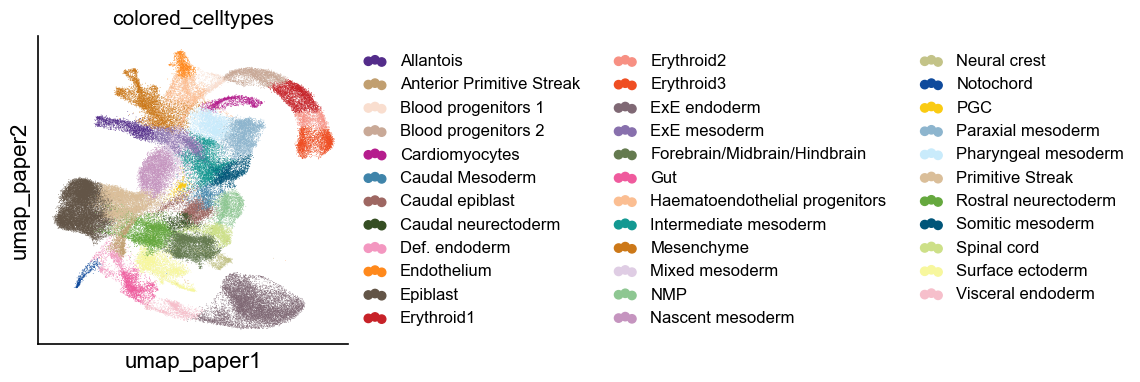

In [3]:
adata = sc.read('../pygot_data/GTL.h5ad')
sc.pl.embedding(adata, basis="umap_paper", color="colored_celltypes")
adata.obs['stage_numeric'] = adata.obs['stage'].apply(lambda x: float(x[1:]))
adata.obs['stage_numeric'] = adata.obs['stage_numeric'].astype(np.float32)

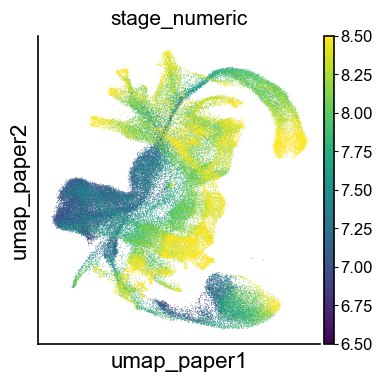

In [4]:

time_key = 'stage_numeric'
embedding_key = 'X_pca'
cell_type_key = 'colored_celltypes'
sc.pl.embedding(adata, color=time_key, basis='umap_paper')

In [5]:
adata = adata[:,adata.var.highly_variable]

In [5]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import pertpy as pt


In [6]:
tal1adata = sc.AnnData(obs=pd.read_csv('../pygot_data/Perturbation/chimera-tal1/meta.csv', index_col=0))
celltypelist = tal1adata.obs['celltype.mapped'].value_counts()[tal1adata.obs['celltype.mapped'].value_counts() >40].index.tolist()
tal1adata = tal1adata[tal1adata.obs['celltype.mapped'].isin(celltypelist)]
tal1adata.obs['sample'] = tal1adata.obs['sample'].astype(str)

In [7]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    tal1adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="celltype.mapped",
    sample_identifier="sample",
    covariate_obs=["tomato"],
)
sccoda_data

MuData object with n_obs × n_vars = 55993 × 27
  2 modalities
    rna:	55989 x 0
      obs:	'barcode', 'sample', 'stage', 'tomato', 'stage.mapped', 'celltype.mapped', 'closest.cell', 'haem_subclust.mapped', 'scCODA_sample_id'
    coda:	4 x 27
      obs:	'tomato', 'sample'
      var:	'n_cells'

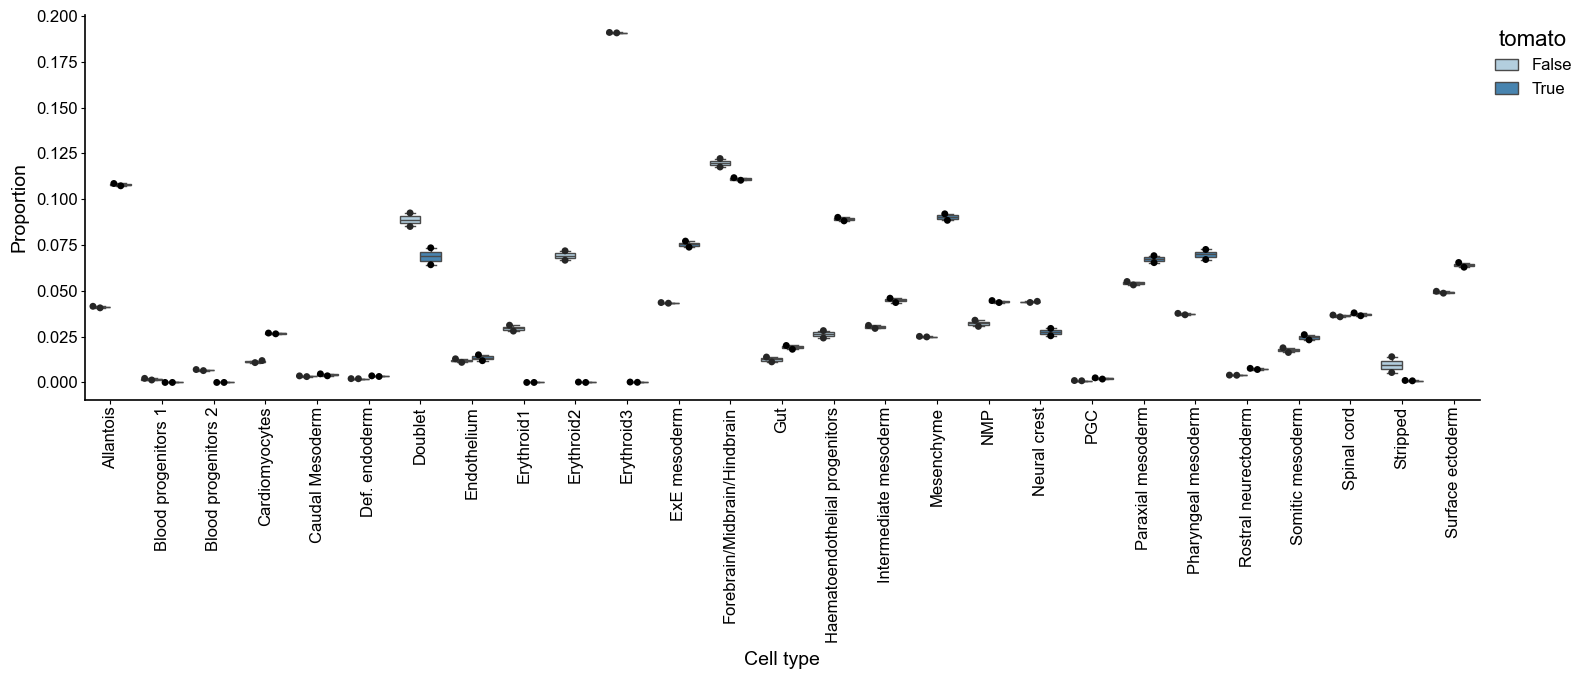

In [8]:
sccoda_model.plot_boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="tomato",
    figsize=(18, 5),
    add_dots=True,
    #args_swarmplot={"palette": ["red"]},
)

plt.show()

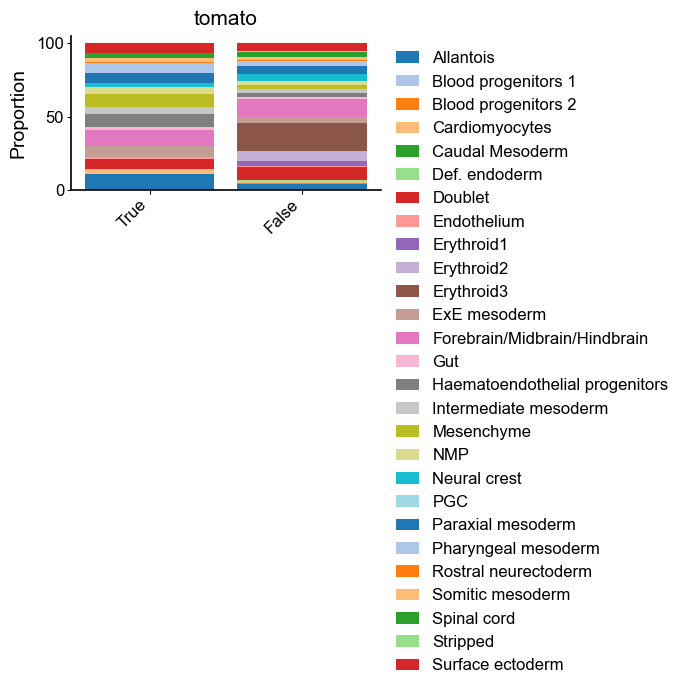

In [9]:
sccoda_model.plot_stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="tomato", figsize=(4, 2)
)
plt.show()

In [10]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="tomato",
    
)
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

• Automatic reference selection! Reference cell type set to Spinal cord
• Zero counts encountered in data! Added a pseudocount of 0.5.


sample: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11000/11000 [08:05<00:00, 22.66it/s, 1023 steps of size 4.70e-03. acc. prob=0.84]


In [11]:
sccoda_data["coda"].varm["effect_df_tomato[T.True]"]

Final Parameter  HDI 3%  HDI 97%     SD  \
Cell Type                                                                 
Allantois                              0.711012   0.469    0.915  0.079   
Blood progenitors 1                   -2.966410  -4.540   -1.340  0.833   
Blood progenitors 2                   -4.260294  -5.742   -2.903  0.761   
Cardiomyocytes                         0.595252   0.041    0.828  0.160   
Caudal Mesoderm                        0.000000  -0.509    0.376  0.095   
Def. endoderm                          0.000000  -0.265    0.849  0.168   
Doublet                               -0.507541  -0.626   -0.042  0.072   
Endothelium                            0.000000  -0.375    0.099  0.063   
Erythroid1                            -5.673060  -7.089   -4.274  0.752   
Erythroid2                            -6.052858  -7.355   -4.813  0.673   
Erythroid3                            -6.888644  -8.131   -5.731  0.644   
ExE mesoderm                           0.297492  -0.000    0.417  0.097   
Forebrain/Midbrain/Hindbrain          -0.328833  -0.428   -0.015  0.063   
Gut                                    0.000000  -0.017    0.419  0.080   
Haematoendothelial progenitors         0.968346   0.715    1.203  0.092   
Intermediate mesoderm                  0.000000  -0.016    0.287  0.065   
Mesenchyme                             1.030785   0.794    1.271  0.093   
NMP                                    0.000000  -0.065    0.201  0.027   
Neural crest                          -0.725063  -0.994   -0.414  0.104   
PGC                                    0.417696  -0.260    1.282  0.323   
Paraxial mesoderm                      0.000000  -0.157    0.041  0.021   
Pharyngeal mesoderm                    0.367844   0.011    0.496  0.087   
Rostral neurectoderm                   0.000000  -0.048    0.769  0.195   
Somitic mesoderm                       0.000000  -0.091    0.247  0.040   
Spinal cord                            0.000000   0.000    0.000  0.000   
Stripped                              -2.416318  -3.258   -1.546  0.417   
Surface ectoderm                       0.000000  -0.118    0.120  0.020   

                                Inclusion probability  Expected Sample  \
Cell Type                                                                
Allantois                                      1.0000      1513.976276   
Blood progenitors 1                            0.9990         1.549718   
Blood progenitors 2                            1.0000         1.695859   
Cardiomyocytes                                 0.9835       375.679086   
Caudal Mesoderm                                0.1763        60.128452   
Def. endoderm                                  0.2281        42.034182   
Doublet                                        1.0000       964.820169   
Endothelium                                    0.1513       202.448017   
Erythroid1                                     1.0000         1.833860   
Erythroid2                                     1.0000         2.934758   
Erythroid3                                     1.0000         3.514295   
ExE mesoderm                                   0.9670      1063.133121   
Forebrain/Midbrain/Hindbrain                   1.0000      1557.209237   
Gut                                            0.1921       243.832898   
Haematoendothelial progenitors                 1.0000      1248.663965   
Intermediate mesoderm                          0.2105       582.007391   
Mesenchyme                                     1.0000      1264.292690   
NMP                                            0.1117       600.932820   
Neural crest                                   1.0000       384.298569   
PGC                                            0.3188        34.198414   
Paraxial mesoderm                              0.1070       962.450992   
Pharyngeal mesoderm                            0.9981       976.844408   
Rostral neurectoderm                           0.2898        83.553166   
Somiti

In [39]:
sccoda_model.set_fdr(sccoda_data, 0.05)
coda_res = pd.DataFrame(sccoda_model.credible_effects(sccoda_data, modality_key="coda")).reset_index()
coda_res = coda_res.loc[coda_res['Final Parameter']]
coda_res['log2fc'] = sccoda_data["coda"].varm["effect_df_tomato[T.True]"].loc[coda_res['Cell Type']]['log2-fold change'].tolist()
coda_res.to_csv('../pygot_data/Perturbation/chimera-tal1/CODA.csv')

In [40]:
benchmark_list = pd.Index(adata.obs['colored_celltypes'].unique()).intersection(coda_res['Cell Type'])

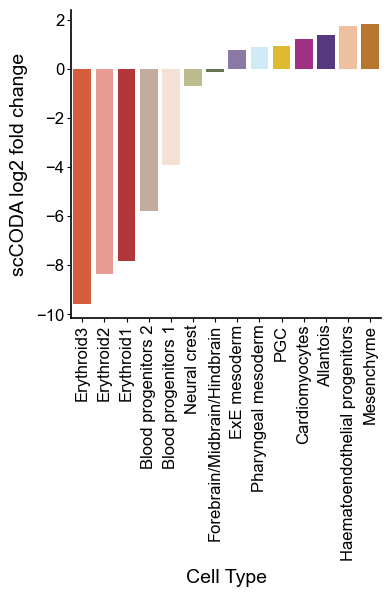

In [41]:
colors = { c:adata.uns['colored_celltypes_colors'][np.where(adata.obs['colored_celltypes'].cat.categories == c)[0][0]] for c in benchmark_list}
sns.barplot(coda_res.loc[coda_res['Cell Type'].isin(benchmark_list)].sort_values('log2fc'), x='Cell Type', y='log2fc', palette=colors)
plt.xticks(rotation=90)
plt.ylabel('scCODA log2 fold change')
plt.show()

In [13]:
coda_res

Covariate                       Cell Type  Final Parameter    log2fc
0   tomato[T.True]                       Allantois             True  1.378651
1   tomato[T.True]             Blood progenitors 1             True -3.926748
2   tomato[T.True]             Blood progenitors 2             True -5.793427
3   tomato[T.True]                  Cardiomyocytes             True  1.211645
5   tomato[T.True]                   Def. endoderm             True  0.621850
6   tomato[T.True]                         Doublet             True -0.379350
8   tomato[T.True]                      Erythroid1             True -7.831618
9   tomato[T.True]                      Erythroid2             True -8.379551
10  tomato[T.True]                      Erythroid3             True -9.585335
11  tomato[T.True]                    ExE mesoderm             True  0.782069
12  tomato[T.True]    Forebrain/Midbrain/Hindbrain             True -0.121527
13  tomato[T.True]                             Gut             True  0.542483
14  tomato[T.True]  Haematoendothelial progenitors             True  1.749906
15  tomato[T.True]           Intermediate mesoderm             True  0.509208
16  tomato[T.True]                      Mesenchyme             True  1.839986
18  tomato[T.True]                    Neural crest             True -0.693168
19  tomato[T.True]                             PGC             True  0.955486
21  tomato[T.True]             Pharyngeal mesoderm             True  0.883565
22  tomato[T.True]            Rostral neurectoderm             True  0.790357
25  tomato[T.True]                        Stripped             True -3.133133

In [358]:
adata

AnnData object with n_obs × n_vars = 98192 × 2500
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'TP_density', 'custom_exclude', 'exclude_mask', 'exclude', 'colored_celltypes', 'palantir_pseudotime', 'palantir_entropy', 'stage_numeric', 'global_grn_fit_godness', 'blood_lineage', 'pseudotime'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'idx'
    uns: 'DM_EigenValues', 'celltype_colors', 'colored_celltypes_colors', 'exclude_colors', 'hvg', 'neighbors', 'palantir_waypoints', 'pca', 'stage_colors', 'umap', 'velocity_graph', 'velocity_graph_neg', 'gene_name', 'tf_name', 'blood_lineage_colors'
    obsm: 'DM_EigenV

In [359]:
[adata.uns['colored_celltypes_colors'][np.where(adata.obs[cell_type_key].cat.categories == c)[0][0]] for c in benchmark_list]

['#532C8A',
 '#F9DECF',
 '#C9A997',
 '#B51D8D',
 '#F397C0',
 '#C72228',
 '#F79083',
 '#EF4E22',
 '#8870AD',
 '#647A4F',
 '#EF5A9D',
 '#FBBE92',
 '#139992',
 '#CC7818',
 '#C3C388',
 '#FACB12',
 '#C9EBFB',
 '#65A83E']

In [346]:
coda_res

Covariate                       Cell Type  Final Parameter    log2fc
0   tomato[T.True]                       Allantois             True  1.378651
1   tomato[T.True]             Blood progenitors 1             True -3.926748
2   tomato[T.True]             Blood progenitors 2             True -5.793427
3   tomato[T.True]                  Cardiomyocytes             True  1.211645
5   tomato[T.True]                   Def. endoderm             True  0.621850
6   tomato[T.True]                         Doublet             True -0.379350
8   tomato[T.True]                      Erythroid1             True -7.831618
9   tomato[T.True]                      Erythroid2             True -8.379551
10  tomato[T.True]                      Erythroid3             True -9.585335
11  tomato[T.True]                    ExE mesoderm             True  0.782069
12  tomato[T.True]    Forebrain/Midbrain/Hindbrain             True -0.121527
13  tomato[T.True]                             Gut             True  0.542483
14  tomato[T.True]  Haematoendothelial progenitors             True  1.749906
15  tomato[T.True]           Intermediate mesoderm             True  0.509208
16  tomato[T.True]                      Mesenchyme             True  1.839986
18  tomato[T.True]                    Neural crest             True -0.693168
19  tomato[T.True]                             PGC             True  0.955486
21  tomato[T.True]             Pharyngeal mesoderm             True  0.883565
22  tomato[T.True]            Rostral neurectoderm             True  0.790357
25  tomato[T.True]                        Stripped             True -3.133133

In [6]:
#model = torch.load('../pygot_data/Perturbation/mouse/model.pkl')
model = torch.load('./benchmark_model/GOT/02_holdout/gastrulation/gas_2.pkl')
velocity_key = 'velocity_pca'
adata.layers['velocity'] = pygot.tl.traj.velocity(adata, model, time_key=time_key, embedding_key=embedding_key)
sc.pp.neighbors(adata, use_rep='X_pca')
pygot.tl.traj.velocity_graph(adata, embedding_key=embedding_key, velocity_key=velocity_key)

Use adata.obsp['connectivities'] as neighbors, please confirm it is computed in embedding space


In [7]:
pm = pygot.tl.analysis.ProbabilityModel()
pm.fit(adata, embedding_key=embedding_key, velocity_key=velocity_key)
adata.obs['pseudotime'] = pm.estimate_pseudotime(adata)

Device: cuda


Density Loss 127.2654, Corr 0.1441 Satisfied 95.703125%:  50%|██████████████████████████████████████████████████████████████████▌                                                                  | 500/1000 [01:08<01:08,  7.34it/s]


In [7]:
grn_fitter = pygot.tl.analysis.GRN()
grn = grn_fitter.fit(adata, species='mm')

TF number: 334, Index(['Klf9', 'Zic5', 'Tfap2a', 'Tfap2b', 'Tfap2c', 'Ascl2', 'Mafb', 'Plagl1',
       'Osr2', 'Zic1',
       ...
       'Nanos1', 'Nuak2', 'Pgam2', 'Phlda2', 'Prnp', 'Rpp25', 'Sft2d1', 'Sim1',
       'Smpx', 'Tff3'],
      dtype='object', length=334)
scale velocity with factor : 12.324565810315601
l1_penalty: 0.005 min_beta: 1.0


Epoch [3953/10000], Train Loss: 76.8688, Val Loss: 84.5797:  40%|██████████████████████████████████████████████████▌                                                                             | 3953/10000 [13:28<20:36,  4.89it/s]

Early stopping at epoch 3954. Best validation loss: 84.57945


In [177]:
torch.save(grn, './benchmark_model/GOT/02_holdout/gastrulation/grn_all.pkl')

In [8]:
grn = torch.load('./benchmark_model/GOT/02_holdout/gastrulation/grn_all.pkl', map_location=torch.device('cpu'))

computing velocity embedding
    finished (0:00:33) --> added
    'velocity_umap_paper', embedded velocity vectors (adata.obsm)


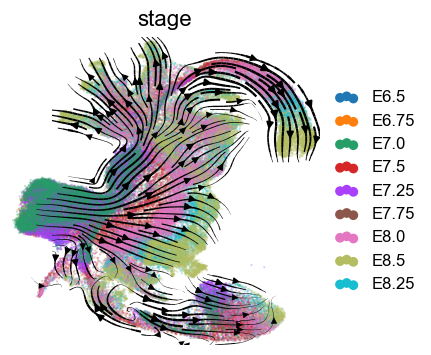

In [9]:

scv.pl.velocity_embedding_stream(adata, color='stage', basis='umap_paper', legend_loc='right')

... storing 'blood_lineage' as categorical


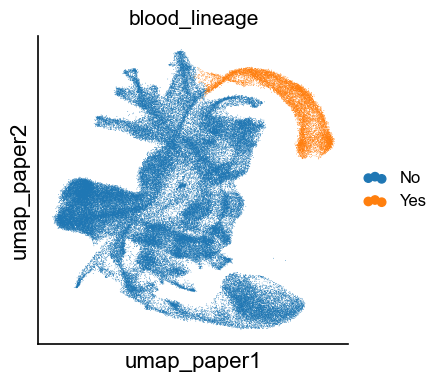

In [10]:
clusters = ['Blood progenitors 1', 'Blood progenitors 2', 'Erythroid2', 'Erythroid1', 'Erythroid3']
adata.obs['blood_lineage'] = 'No'
adata.obs.loc[adata.obs[cell_type_key].isin(clusters), 'blood_lineage'] = 'Yes'
sc.pl.embedding(adata, color='blood_lineage', basis='umap_paper')

In [11]:
import magic
adata.layers['raw_count'] = adata.X
mag = magic.MAGIC()
X_magic = mag.fit_transform(adata)
adata.layers['X_magic'] = adata.X
adata.layers['imputed_count'] = adata.layers['X_magic']

Calculating MAGIC...
  Running MAGIC on 98192 cells and 2500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 29.35 seconds.
    Calculating KNN search...
    Calculated KNN search in 2049.41 seconds.
    Calculating affinities...
    Calculated affinities in 2191.81 seconds.
  Calculated graph and diffusion operator in 4270.85 seconds.
  Calculating imputation...
  Calculated imputation in 48.81 seconds.
Calculated MAGIC in 4320.56 seconds.


In [12]:
import celloracle as co
sub_adata = adata[adata.obs.sample(n=10000).index]
sub_adata.obsm['X_umap_paper'] = sub_adata.obsm['X_umap_paper'].astype(np.float32)
oracle = co.Oracle()
oracle.import_anndata_as_normalized_count(sub_adata, cluster_column_name=cell_type_key, embedding_name='X_umap_paper')

Use adata.obsp['connectivities'] as neighbors, please confirm it is computed in embedding space


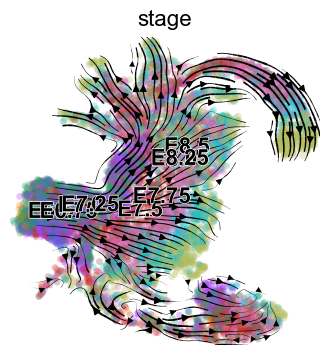

In [13]:
velocity_key = 'velocity_pca'
oracle.adata.layers['velocity'] = pygot.tl.traj.velocity(oracle.adata, model, time_key=time_key, embedding_key=embedding_key)
sc.pp.neighbors(oracle.adata, use_rep='X_pca')
pygot.tl.traj.velocity_graph(oracle.adata, embedding_key=embedding_key, velocity_key=velocity_key)
import scvelo as scv
scv.pl.velocity_embedding_stream(oracle.adata, color='stage', basis='umap_paper')

In [14]:
sc.write('../pygot_data/Perturbation/mouse/sub_adata.h5ad', sub_adata)

In [5]:
#oracle = co.load_hdf5('../pygot_data/Perturbation/got_oracle.celloracle.oracle')

In [188]:
grn.export_grn_into_celloracle(oracle)

Finish!


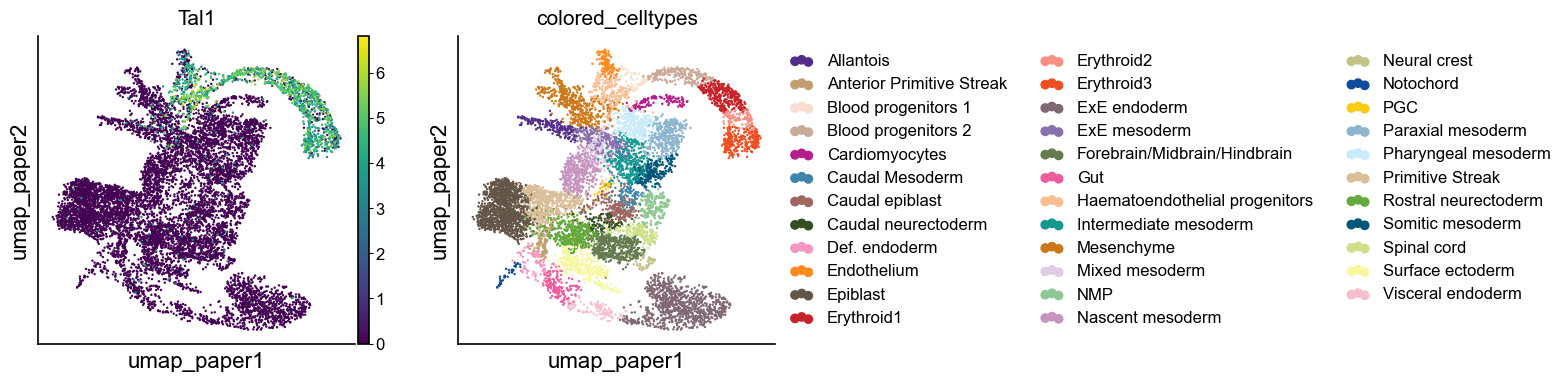

In [189]:
goi = 'Tal1'
sc.pl.embedding(oracle.adata, color=[goi, oracle.cluster_column_name],
                 layer="imputed_count", use_raw=False, cmap="viridis", basis='umap_paper')
oracle.simulate_shift(perturb_condition={goi: 0.0},
                      n_propagation=3)

oracle.adata.layers['delta_X'] = oracle.adata.layers['delta_X'].astype(np.float64)
oracle.adata.layers['imputed_count'] = oracle.adata.layers['imputed_count'].astype(np.float64)

# Get transition probability
oracle.estimate_transition_prob(n_neighbors=200,
                                knn_random=True, 
                                sampled_fraction=1)

# Calculate embedding 
oracle.calculate_embedding_shift(sigma_corr=0.05)

# n_grid = 40 is a good starting value.
n_grid = 50 
oracle.calculate_p_mass(smooth=0.8, n_grid=n_grid, n_neighbors=200)

In [190]:
oracle.suggest_mass_thresholds(n_suggestion=12)

In [191]:
min_mass = 4.2
oracle.calculate_mass_filter(min_mass=min_mass, plot=True)

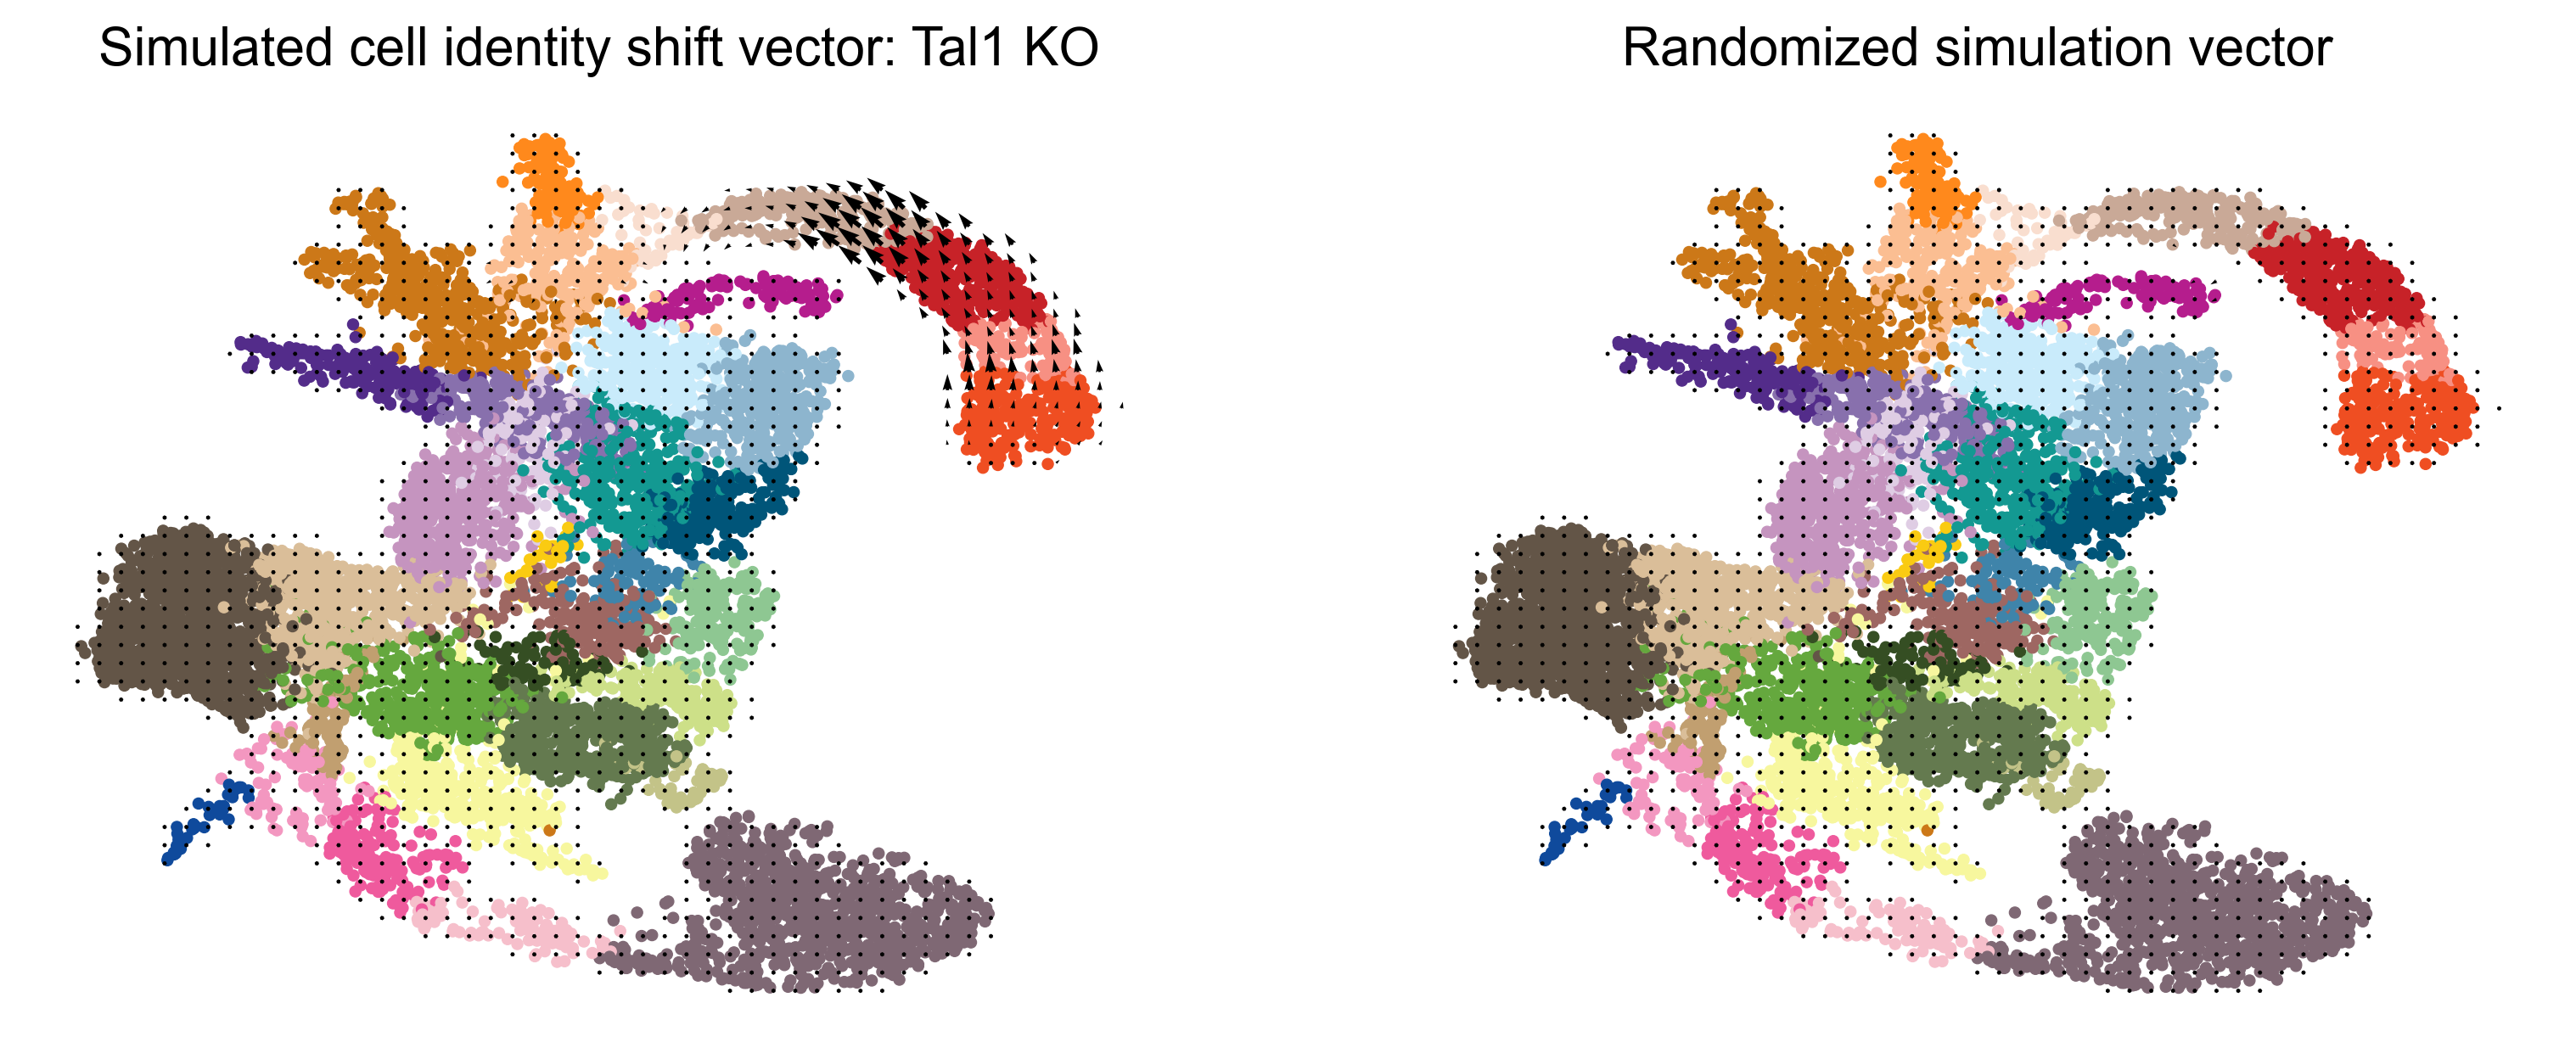

In [229]:
fig, ax = plt.subplots(1, 2,  figsize=[6.4*2, 4.8], dpi=300)

scale_simulation = 20
# Show quiver plot
oracle.plot_cluster_whole(ax=ax[0], s=10)
oracle.plot_simulation_flow_on_grid(scale=scale_simulation, ax=ax[0], show_background=False)
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
oracle.plot_cluster_whole(ax=ax[1], s=10)
oracle.plot_simulation_flow_random_on_grid(scale=scale_simulation, ax=ax[1], show_background=False)
ax[1].set_title(f"Randomized simulation vector")
#plt.savefig('/disk/share/xuruihong/pygot_fig/got_celloracle.pdf', format='pdf')
plt.show()

In [23]:
from tqdm import tqdm
# Our screen pipeline
candidate_TF = grn.tf_names
perturb_df = []
for tf in tqdm(candidate_TF):
    oracle.simulate_shift(perturb_condition={tf: 0.0},
                      n_propagation=3)
    oracle.adata.obs['score'] = np.sum(np.array(oracle.adata.layers['delta_X']) * oracle.adata.layers['velocity'], axis=1)
    perturb_df.append(oracle.adata.obs['score'].copy())


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 334/334 [1:13:51<00:00, 13.27s/it]


In [24]:
perturb_df = pd.DataFrame(perturb_df, index=candidate_TF).T

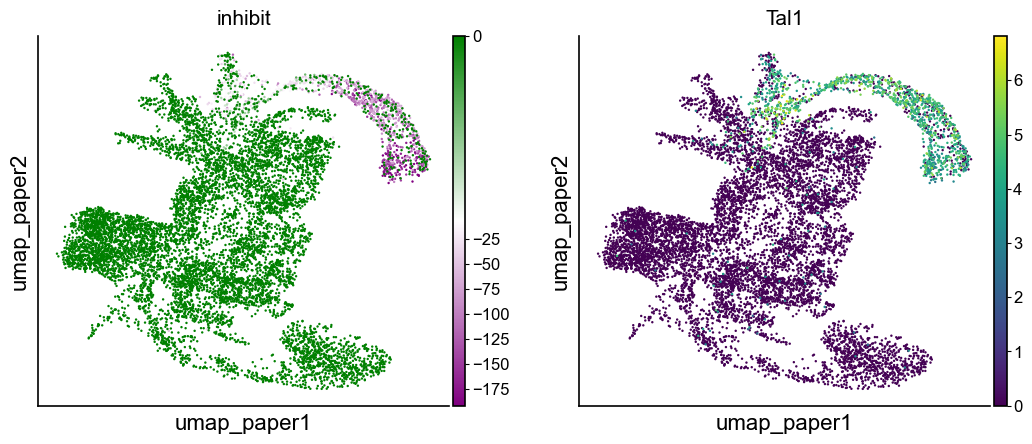

In [234]:
import matplotlib.colors as mcolors
colors = ["purple", "white", "green"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)
oracle.adata.obs['inhibit'] = perturb_df['Tal1']
fig, axes = plt.subplots(1,2, figsize=(6.4*2, 4.8))
# 定义归一化，使得 0 为中间值
norm = mcolors.TwoSlopeNorm(vmin=np.percentile(oracle.adata.obs['inhibit'], 1), vcenter=perturb_df.mean().mean(), vmax=0)
sc.pl.embedding(oracle.adata, color='inhibit',  basis='umap_paper', cmap=custom_cmap, norm=norm, ax=axes[0], show=False)
sc.pl.embedding(oracle.adata, color='Tal1',  basis='umap_paper',layer="imputed_count", ax=axes[1], show=False)
#plt.savefig('/disk/share/xuruihong/pygot_fig/got_celloracle_perturb_tal1.pdf', format='pdf')
plt.show()

In [132]:
b = perturb_df.mean().mean()

In [25]:
cell_idx_list = oracle.adata.obs.groupby(cell_type_key).apply(lambda x: x.index)

In [210]:
#perturb_values = perturb_df.values.copy()
#perturb_values[perturb_values > 0] = np.log(1+perturb_values[perturb_values > 0] )
#perturb_values[perturb_values < 0] = -np.log(1-perturb_values[perturb_values < 0] )
#perturb_df2 = pd.DataFrame(perturb_values, index=perturb_df.index, columns=perturb_df.columns)

In [133]:
perturb_res = []
for idx in cell_idx_list:
    perturb_res.append(perturb_df.loc[idx].mean(axis=0) - b)
perturb_res = pd.DataFrame(perturb_res, index=cell_idx_list.index)

In [152]:

coda_res = pd.read_csv('../pygot_data/Perturbation/chimera-tal1/CODA_fdr_0.05.csv', index_col=0)
benchmark_list = perturb_res.index.intersection(coda_res['Cell Type'])
groundtruth = coda_res.set_index('Cell Type').loc[benchmark_list]['log2fc']

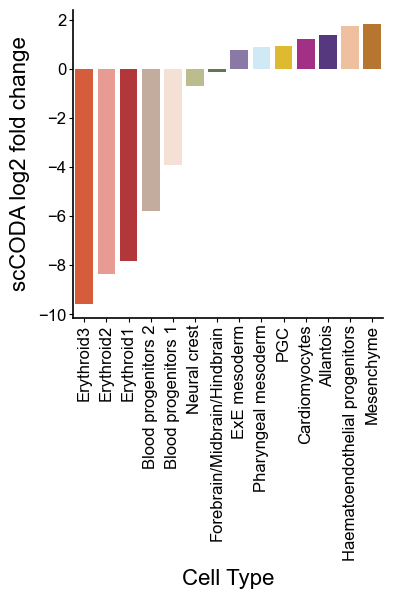

In [187]:
colors = { c:adata.uns['colored_celltypes_colors'][np.where(adata.obs[cell_type_key].cat.categories == c)[0][0]] for c in benchmark_list}
sns.barplot(coda_res.loc[coda_res['Cell Type'].isin(benchmark_list)].sort_values('log2fc'), x='Cell Type', y='log2fc', palette=colors)
plt.xticks(rotation=90)
plt.ylabel('scCODA log2 fold change')
#plt.savefig('/disk/share/xuruihong/pygot_fig/perturb_gt.pdf', format='pdf')
plt.show()

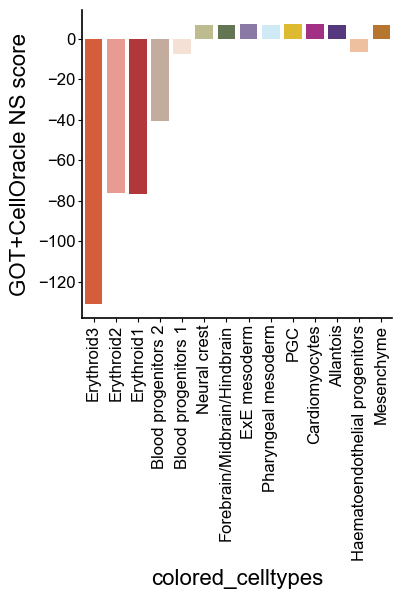

In [184]:
order = coda_res.loc[coda_res['Cell Type'].isin(benchmark_list)].sort_values('log2fc')['Cell Type']
show_df = pd.DataFrame(perturb_res.loc[benchmark_list]['Tal1']).reset_index().sort_values('Tal1').reset_index(drop=True)
show_df['colored_celltypes'] = show_df['colored_celltypes'].astype(str)
sns.barplot(show_df.sort_values('Tal1'), x='colored_celltypes', y='Tal1', palette=colors, order=order)
plt.xticks(rotation=90)
plt.ylabel('GOT+CellOracle NS score')
#plt.savefig('/disk/share/xuruihong/pygot_fig/got_celloracle_rank.pdf', format='pdf')
plt.show()

In [155]:
from scipy.stats import pearsonr
best_match_genes = []
for gene in perturb_res.columns:
    best_match_genes.append([gene, pearsonr(perturb_res.loc[benchmark_list][gene], groundtruth)[0]])
best_match_genes = pd.DataFrame(best_match_genes, columns=['gene', 'R']).sort_values('R', ascending=False)
best_match_genes

gene         R
194    Tal1  0.925615
186   Gfi1b  0.924335
285    Lmo2  0.862992
188   Gata1  0.848066
181   Trp53  0.834334
..      ...       ...
150     Jun -0.794831
235   Tead2 -0.835771
294  Zfp979 -0.874750
174    Irf7       NaN
232    Rfx6       NaN

[334 rows x 2 columns]

In [176]:
selected_gene = best_match_genes.loc[best_match_genes.gene == 'Tal1']
ranked = np.where(best_match_genes.gene == 'Tal1')[0][0]
print(ranked)
selected_gene

0


gene         R
194  Tal1  0.925615

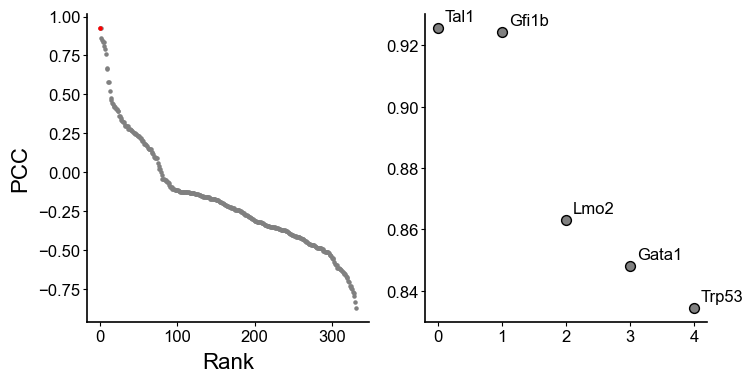

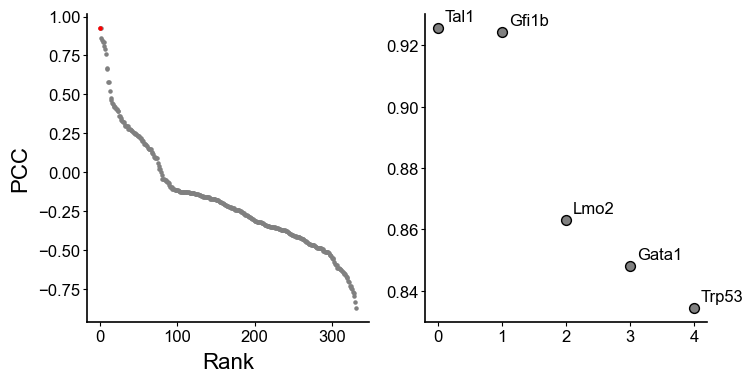

In [182]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
n_top = 5
axes[0].scatter(x=range(len(best_match_genes)), y=best_match_genes['R'].tolist(), s=5, color='grey',)
axes[0].scatter(x=ranked, y=selected_gene['R'].tolist(), s=5, color='red',)
#plt.ylabel('PCC')
#plt.xlabel('Rank')
annotated_genes = best_match_genes.head(n_top)
for i, gene in enumerate(annotated_genes.gene):
    axes[1].annotate(gene, 
                xy=(i, annotated_genes['R'].tolist()[i]), 
                xytext=(5, 5),  # 调整文本偏移量以避免覆盖数据点
                textcoords="offset points",
                ha='left',
                fontsize=12)
axes[1].scatter(x=range(len(best_match_genes))[:n_top], y=best_match_genes['R'].tolist()[:n_top], s=50, color='grey', edgecolors='black')
axes[0].set_ylabel('PCC')
axes[0].set_xlabel('Rank')
#plt.savefig('/disk/share/xuruihong/pygot_fig/got_celloracle_corr.pdf', format='pdf')
plt.show()

## Original CellOracle Pipeline (Include GRN inference and TF screen)

In [32]:

import celloracle as co
base_GRN = co.data.load_mouse_scATAC_atlas_base_GRN()

In [33]:
new_adata = adata.copy()

In [39]:
new_adata.layers['raw_count'] = new_adata.X.copy()

In [40]:
origin_oracle = co.Oracle()
origin_oracle.import_anndata_as_normalized_count(new_adata, cluster_column_name=cell_type_key, embedding_name='X_umap_paper')


In [41]:
origin_oracle.import_TF_data(TF_info_matrix=base_GRN)

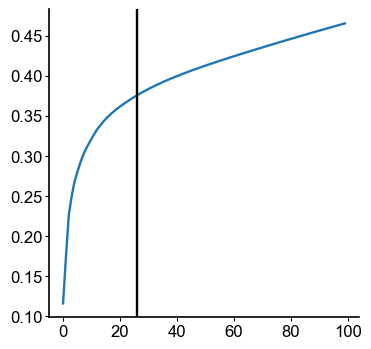

26


In [42]:
# Perform PCA
origin_oracle.perform_PCA()

# Select important PCs
plt.plot(np.cumsum(origin_oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(origin_oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

In [43]:
n_cell = origin_oracle.adata.shape[0]
print(f"cell number is :{n_cell}")
k = 200
print(f"Auto-selected k is :{k}")
origin_oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=4)

cell number is :98192
Auto-selected k is :200


In [44]:
links = origin_oracle.get_links(cluster_name_for_GRN_unit=cell_type_key, 
                         verbose_level=10)

  0%|          | 0/35 [00:00<?, ?it/s]

Inferring GRN for Allantois...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Anterior Primitive Streak...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Blood progenitors 1...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Blood progenitors 2...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Cardiomyocytes...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Caudal Mesoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Caudal epiblast...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Caudal neurectoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Def. endoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Endothelium...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Epiblast...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Erythroid1...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Erythroid2...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Erythroid3...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for ExE endoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for ExE mesoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Forebrain/Midbrain/Hindbrain...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Gut...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Haematoendothelial progenitors...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Intermediate mesoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Mesenchyme...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Mixed mesoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for NMP...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Nascent mesoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Neural crest...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Notochord...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for PGC...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Paraxial mesoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Pharyngeal mesoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Primitive Streak...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Rostral neurectoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Somitic mesoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Spinal cord...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Surface ectoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

Inferring GRN for Visceral endoderm...


  0%|          | 0/2085 [00:00<?, ?it/s]

In [45]:
links.filter_links(p=0.001, weight="coef_abs", threshold_number=2000)

In [46]:
links.get_network_score()
links.merged_score.head()

degree_all  degree_centrality_all  degree_in  degree_centrality_in  \
Foxq1           14               0.026565          0              0.000000   
Rgs5            13               0.024668         13              0.024668   
Foxi2            8               0.015180          0              0.000000   
Ttr             11               0.020873         11              0.020873   
Nkx6-1           4               0.007590          0              0.000000   

        degree_out  degree_centrality_out  betweenness_centrality  \
Foxq1           14               0.026565                     0.0   
Rgs5             0               0.000000                     0.0   
Foxi2            8               0.015180                     0.0   
Ttr              0               0.000000                     0.0   
Nkx6-1           4               0.007590                     0.0   

        eigenvector_centrality    cluster  
Foxq1                 0.142788  Allantois  
Rgs5                  0.167758  Allantois  
Foxi2                 0.051322  Allantois  
Ttr                   0.060025  Allantois  
Nkx6-1                0.141530  Allantois

In [47]:
origin_sub_oracle = co.Oracle()
origin_sub_oracle.import_anndata_as_normalized_count(sub_adata.copy(), cluster_column_name=cell_type_key, embedding_name='X_umap_paper')

In [48]:
origin_sub_oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
origin_sub_oracle.fit_GRN_for_simulation(use_cluster_specific_TFdict=True)


  0%|          | 0/35 [00:00<?, ?it/s]

In [49]:
origin_sub_oracle.import_TF_data(TF_info_matrix=base_GRN)

In [50]:
goi = 'Tal1'
origin_sub_oracle.simulate_shift(perturb_condition={goi: 0.0},
                      n_propagation=3)
origin_sub_oracle.adata.layers['delta_X'] = origin_sub_oracle.adata.layers['delta_X'].astype(np.float64)
origin_sub_oracle.adata.layers['imputed_count'] = origin_sub_oracle.adata.layers['imputed_count'].astype(np.float64)

In [51]:
# Get transition probability
origin_sub_oracle.estimate_transition_prob(n_neighbors=200,
                                knn_random=True, 
                                sampled_fraction=1)

# Calculate embedding 
origin_sub_oracle.calculate_embedding_shift(sigma_corr=0.05)


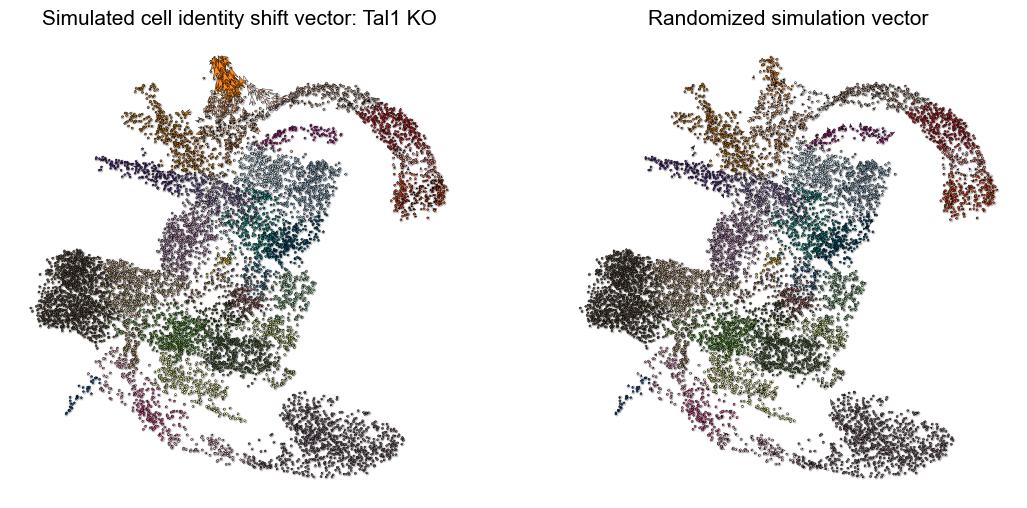

In [52]:
fig, ax = plt.subplots(1, 2,  figsize=[13, 6])

scale = 30
# Show quiver plot
origin_sub_oracle.plot_quiver(scale=scale, ax=ax[0])
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
origin_sub_oracle.plot_quiver_random(scale=scale, ax=ax[1])
ax[1].set_title(f"Randomized simulation vector")

plt.show()

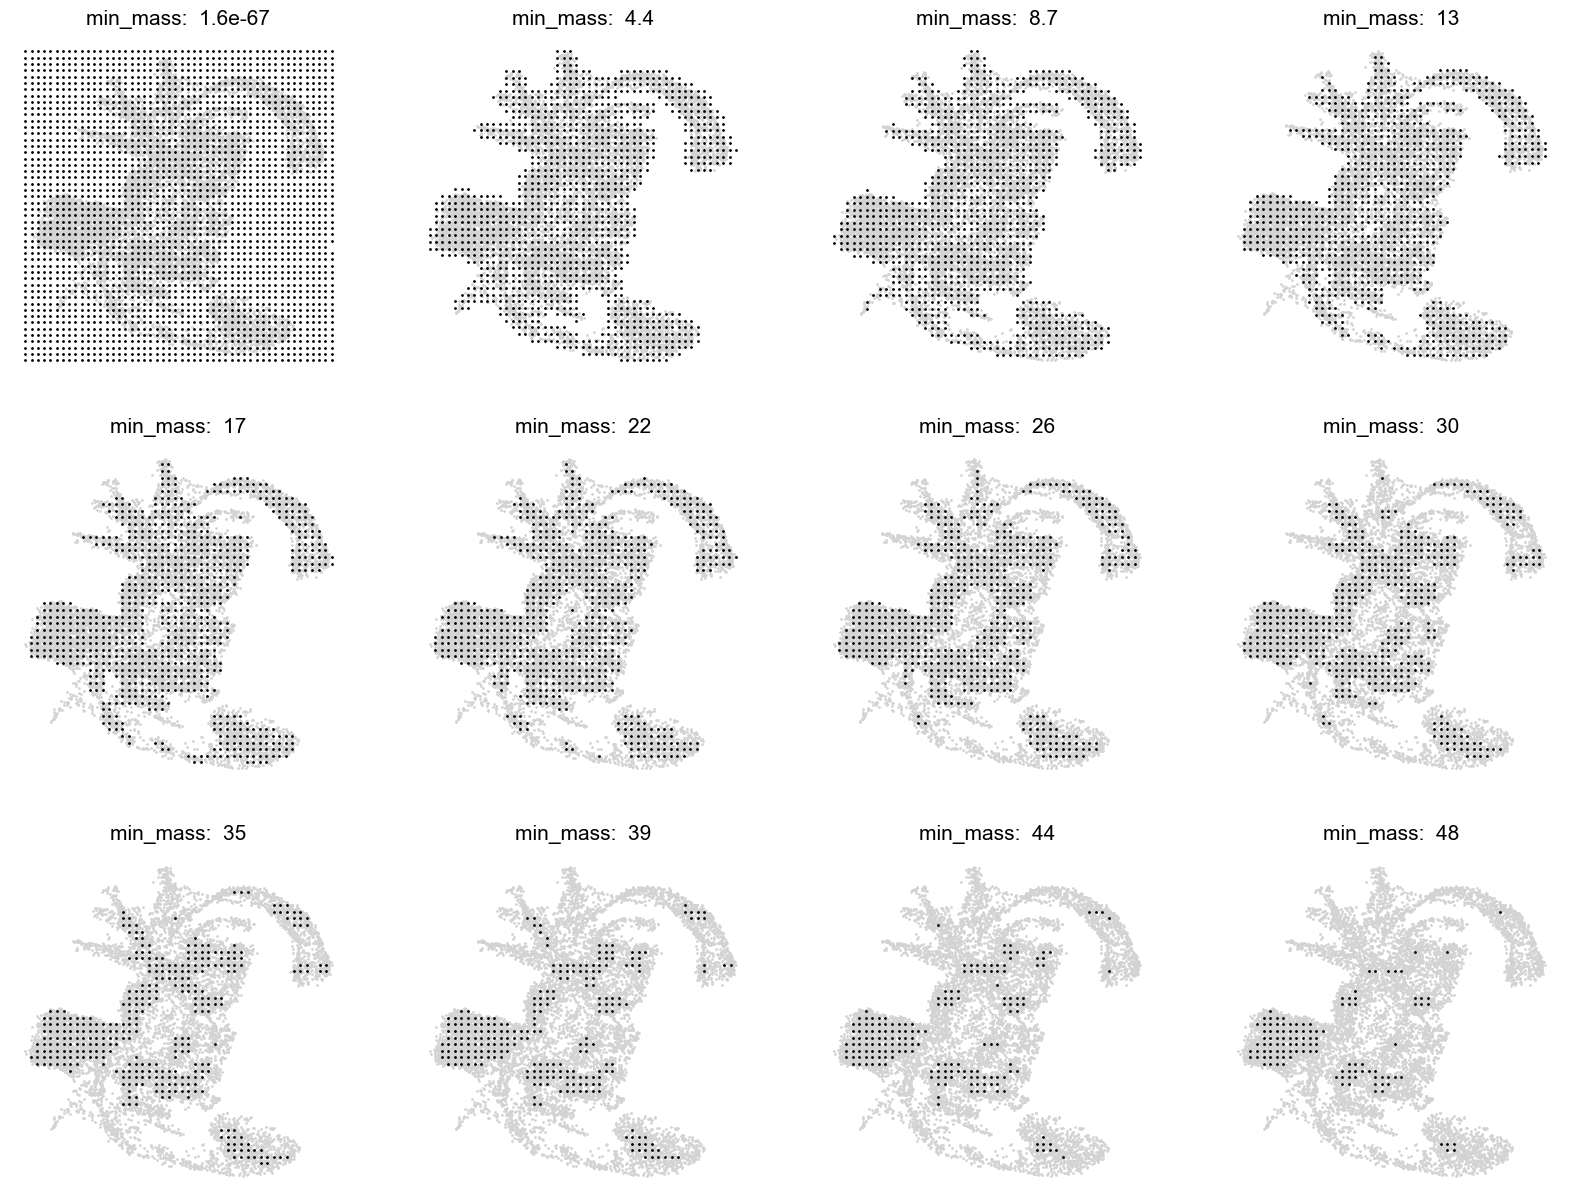

In [53]:
# n_grid = 40 is a good starting value.
n_grid = 50 
origin_sub_oracle.calculate_p_mass(smooth=0.8, n_grid=n_grid, n_neighbors=200)
origin_sub_oracle.suggest_mass_thresholds(n_suggestion=12)
plt.show()

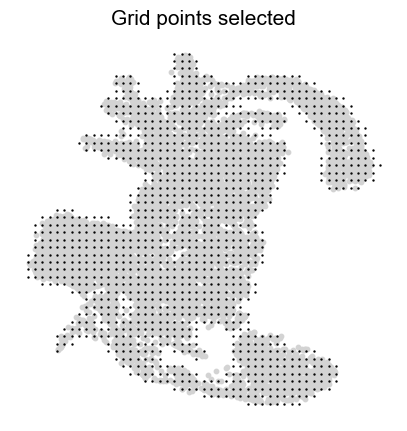

In [54]:
min_mass = 4.2
origin_sub_oracle.calculate_mass_filter(min_mass=min_mass, plot=True)
plt.show()

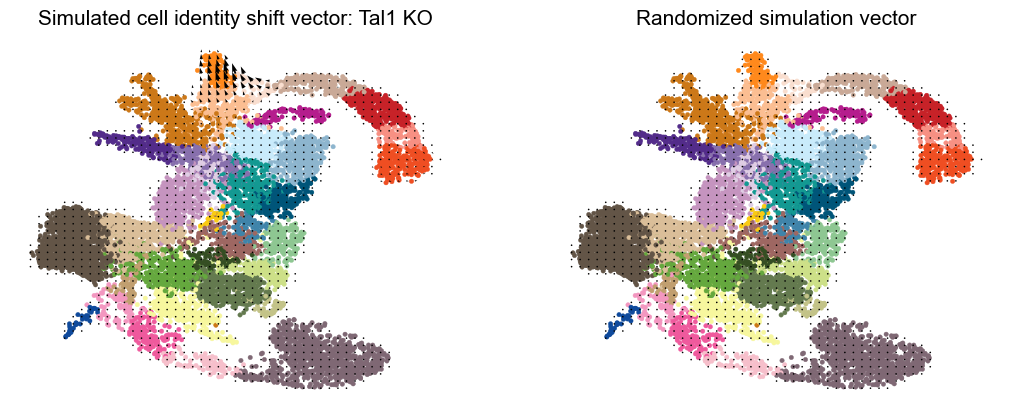

In [55]:
fig, ax = plt.subplots(1, 2,  figsize=[6.4*2, 4.8])

scale_simulation = 20
# Show quiver plot
origin_sub_oracle.plot_cluster_whole(ax=ax[0], s=10)
origin_sub_oracle.plot_simulation_flow_on_grid(scale=scale_simulation, ax=ax[0], show_background=False)
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
origin_sub_oracle.plot_cluster_whole(ax=ax[1], s=10)
origin_sub_oracle.plot_simulation_flow_random_on_grid(scale=scale_simulation, ax=ax[1], show_background=False)
ax[1].set_title(f"Randomized simulation vector")

plt.show()

In [56]:
from celloracle.applications import Gradient_calculator

# Instantiate Gradient calculator object
origin_flow = Gradient_calculator(oracle_object=origin_sub_oracle, pseudotime_key="pseudotime")
origin_flow.calculate_p_mass(smooth=0.8, n_grid=n_grid, n_neighbors=200)
origin_flow.calculate_mass_filter(min_mass=min_mass, plot=True)

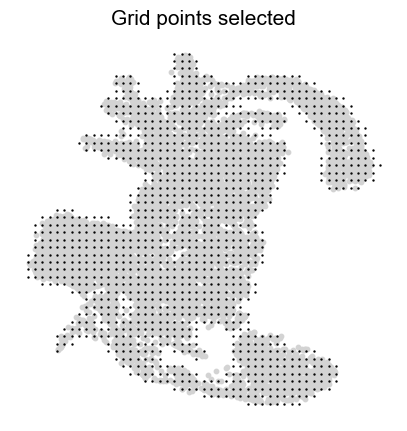

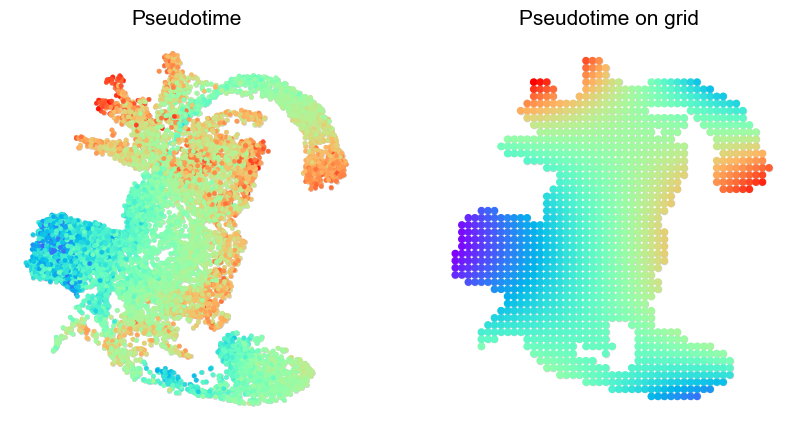

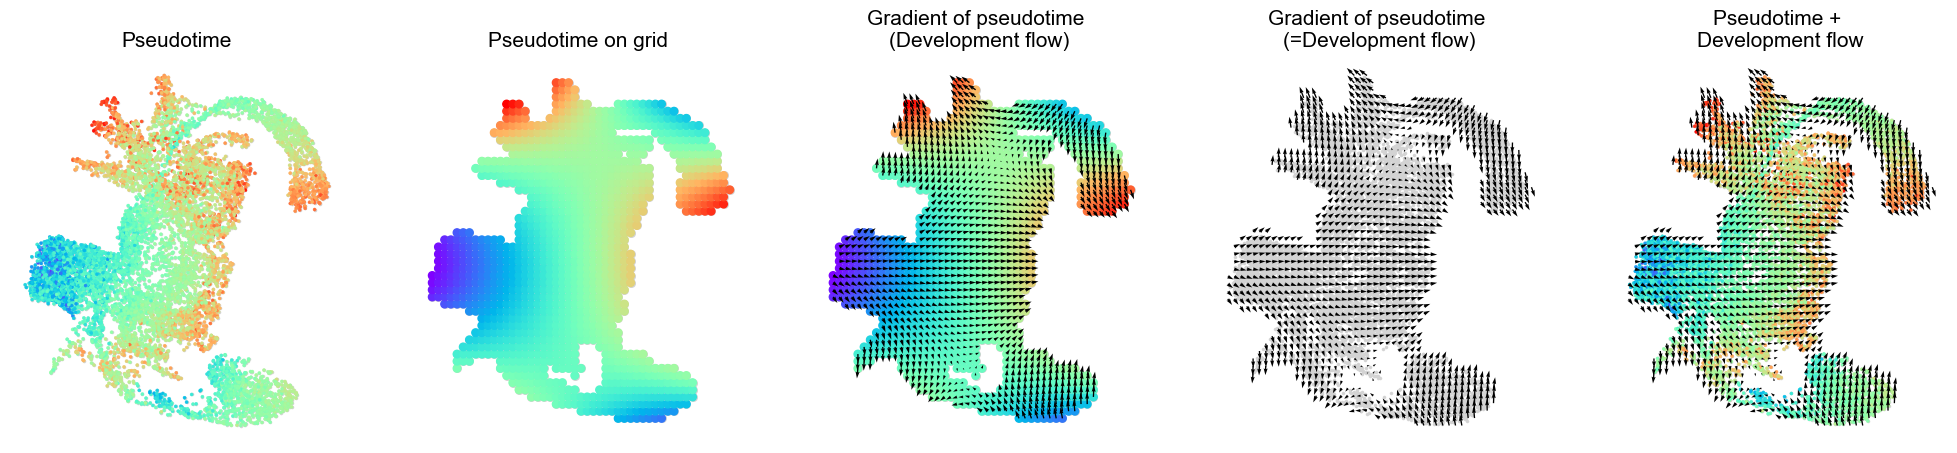

In [57]:
origin_flow.transfer_data_into_grid(args={"method": "polynomial", "n_poly":3}, plot=True)
# Calculate graddient
origin_flow.calculate_gradient()

# Show results
scale_dev = 40
origin_flow.visualize_results(scale=scale_dev, s=5)
plt.show()

In [58]:
from celloracle.applications import Oracle_development_module
# Make Oracle_development_module to compare two vector field
dev = Oracle_development_module()

# Load development flow
dev.load_differentiation_reference_data(gradient_object=origin_flow)

# Load simulation result
dev.load_perturb_simulation_data(oracle_object=origin_sub_oracle,
                                 
                                 ) # Enter cell id list )

    
# Calculate inner produc scores
dev.calculate_inner_product()
dev.calculate_digitized_ip(n_bins=10)


2025-03-07 17:08:12,487 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-07 17:08:12,494 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


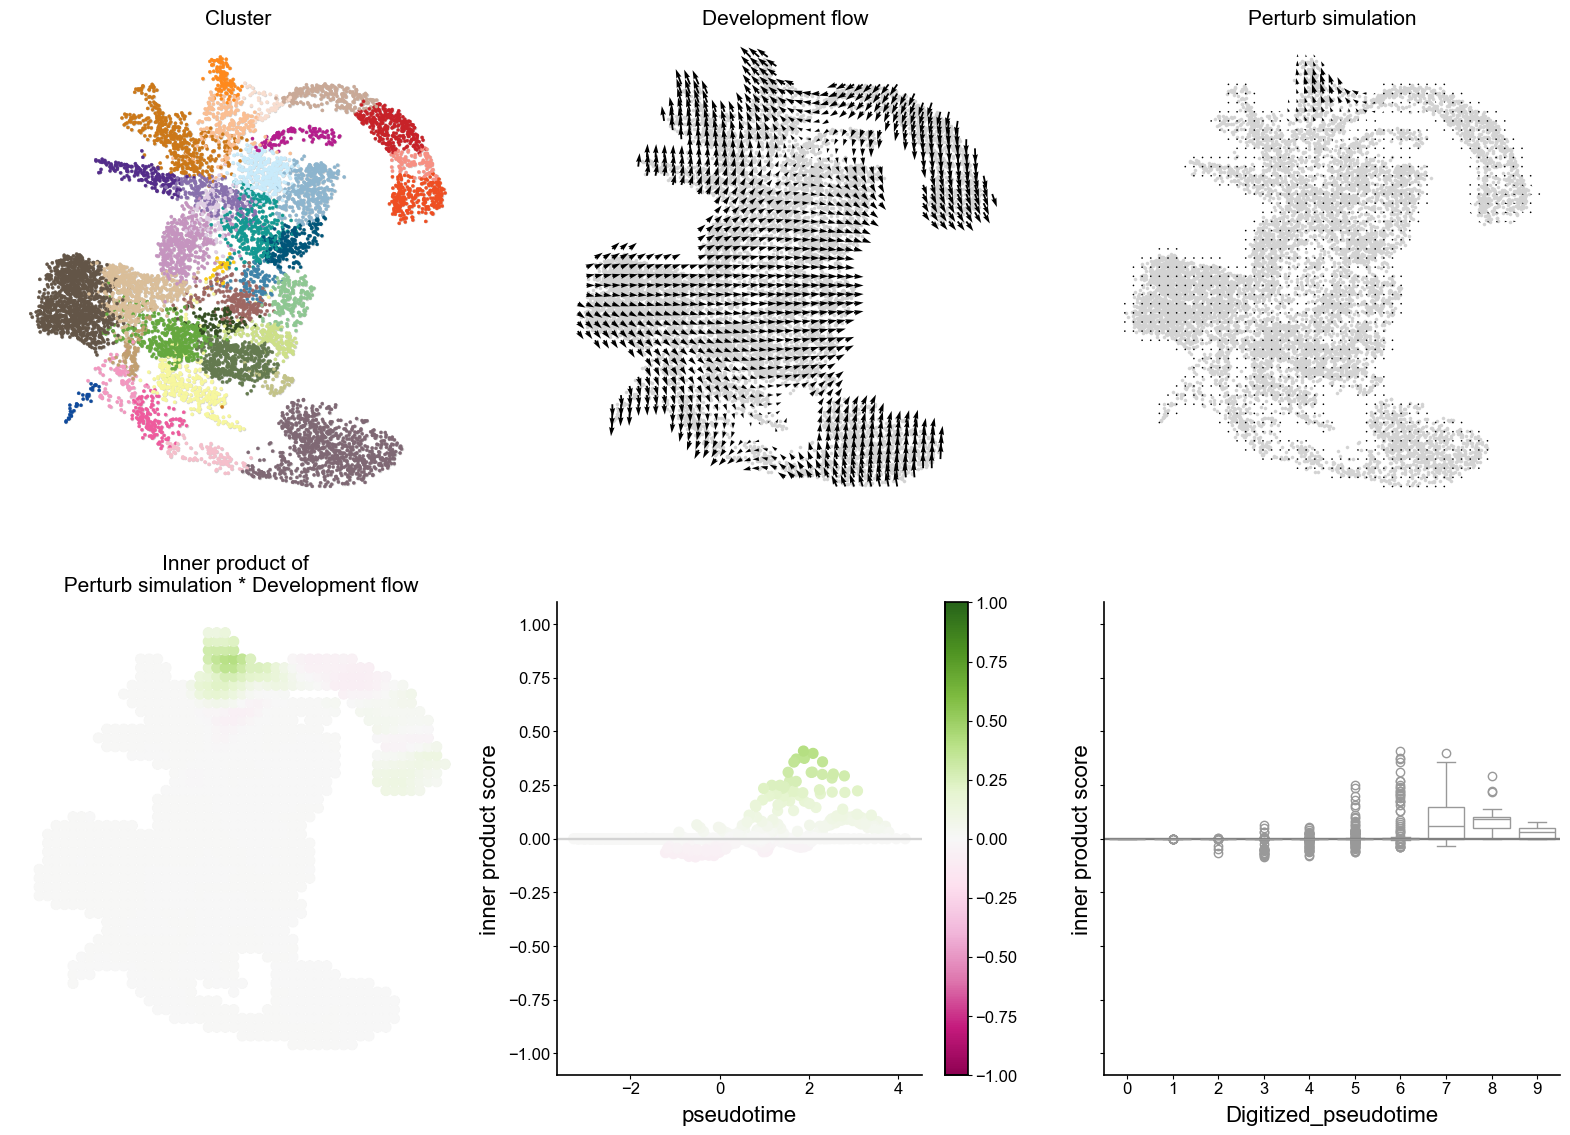

In [59]:
# Let's visualize the results
dev.visualize_development_module_layout_0(s=5,
                                          scale_for_simulation=scale_simulation,
                                          s_grid=50,
                                          scale_for_pseudotime=scale_dev,
                                          vm=1)
plt.show()

In [60]:
origin_sub_oracle.to_hdf5('../pygot_data/Perturbation/origin_sub_oracle.celloracle.oracle')

In [67]:
origin_sub_oracle.adata.layers['delta_X'] = np.array(origin_sub_oracle.adata.layers['velocity'])

In [75]:
#start to screen
import pandas as pd
from tqdm import tqdm
gene_lists = origin_sub_oracle.adata.var.index.intersection(pygot.tl.analysis.TF_list.TF_mm).intersection(pd.Index(origin_sub_oracle.all_regulatory_genes_in_TFdict))
origin_results = {}
perturb_origin_df = []
for gene in tqdm(gene_lists):
    goi = gene
    try:
        origin_sub_oracle.simulate_shift(perturb_condition={goi: 0.0},
                          n_propagation=3)
    except Exception as e:
            continue
    origin_sub_oracle.adata.layers['delta_X'] = np.array(origin_sub_oracle.adata.layers['delta_X'])    
    origin_sub_oracle.adata.obs['score'] = np.sum(origin_sub_oracle.adata.layers['delta_X'] * origin_sub_oracle.adata.layers['velocity'], axis=1)
    perturb_origin_df.append(origin_sub_oracle.adata.obs['score'].copy())
    
    origin_sub_oracle.adata.layers['delta_X'] = origin_sub_oracle.adata.layers['delta_X'].astype(np.float64)
    origin_sub_oracle.adata.layers['imputed_count'] = origin_sub_oracle.adata.layers['imputed_count'].astype(np.float64)
        # Get transition probability
    origin_sub_oracle.estimate_transition_prob(n_neighbors=200,
                                knn_random=True, 
                                sampled_fraction=1)

        # Calculate embedding 
    origin_sub_oracle.calculate_embedding_shift(sigma_corr=0.05)
        # Make Oracle_development_module to compare two vector field
    dev = Oracle_development_module()
    
        # Load development flow
    dev.load_differentiation_reference_data(gradient_object=origin_flow)
    origin_results[gene] = []
    for j, cell_idx in enumerate(cell_idx_list):
            # Load simulation result
        try:
            dev.load_perturb_simulation_data(oracle_object=origin_sub_oracle,
                                         cell_idx_use=np.where(origin_sub_oracle.adata.obs.index.isin(cell_idx))[0], # Enter cell id list
                                         
                                         )
        
            
                # Calculate inner produc scores
            dev.calculate_inner_product()
            dev.calculate_digitized_ip(n_bins=10)
            pvalue = dev.get_negative_PS_p_value()
            sum_df = dev.get_sum_of_negative_ips()
            print(gene, pvalue, cell_idx_list.index[j])
            origin_results[gene].append([sum_df, pvalue, cell_idx_list.index[j]])
        except Exception as e:
            continue
    

  0%|                                                                                                                                                                                                         | 0/274 [00:00<?, ?it/s]

Sox17 0.9981857909085079 Blood progenitors 2
Sox17 0.7635790090449788 Caudal epiblast
Sox17 0.9999962710824575 Epiblast
Sox17 0.9999997305604631 Erythroid1
Sox17 0.9999906983858968 Erythroid3
Sox17 2.7983979701283152e-05 ExE endoderm
Sox17 0.999361219416184 ExE mesoderm
Sox17 0.9999999368559911 Forebrain/Midbrain/Hindbrain
Sox17 1.884198018023647e-10 Haematoendothelial progenitors
Sox17 0.9999999807383078 Intermediate mesoderm
Sox17 0.9997266880404988 Mesenchyme
Sox17 0.9999982299360186 Nascent mesoderm
Sox17 0.9999916958909089 Paraxial mesoderm
Sox17 0.9937818309797276 Pharyngeal mesoderm
Sox17 0.9990350951428416 Primitive Streak
Sox17 0.9887602294751512 Rostral neurectoderm
Sox17 0.9999702151104627 Somitic mesoderm


  0%|▋                                                                                                                                                                                              | 1/274 [00:59<4:30:20, 59.42s/it]

Sox17 0.9999978371202772 Surface ectoderm
Tfap2b 0.9999996204455215 Blood progenitors 2
Tfap2b 0.9824958384364059 Caudal epiblast
Tfap2b 0.9999115199412668 Epiblast
Tfap2b 0.9999999999923439 Erythroid1
Tfap2b 0.9999976353988312 Erythroid3
Tfap2b 0.9999986748051947 ExE endoderm
Tfap2b 0.9999999759071404 ExE mesoderm
Tfap2b 0.9911948495878858 Forebrain/Midbrain/Hindbrain
Tfap2b 0.9999410264344907 Haematoendothelial progenitors
Tfap2b 0.9999992112287178 Intermediate mesoderm
Tfap2b 0.9999994335434162 Mesenchyme
Tfap2b 0.9999988398835689 Nascent mesoderm
Tfap2b 0.9999219448263506 Paraxial mesoderm
Tfap2b 0.9999995249442294 Pharyngeal mesoderm
Tfap2b 0.9999999746848439 Primitive Streak
Tfap2b 0.9999999830464573 Rostral neurectoderm
Tfap2b 0.01462990616638955 Somitic mesoderm


  1%|██                                                                                                                                                                                             | 3/274 [02:00<2:51:18, 37.93s/it]

Tfap2b 0.9996097571614548 Surface ectoderm
Ikzf2 0.0075314716269282616 Blood progenitors 2
Ikzf2 0.9999912507880225 Caudal epiblast
Ikzf2 0.9999999090684568 Epiblast
Ikzf2 0.9962164385733772 Erythroid1
Ikzf2 0.9999992358696665 Erythroid3
Ikzf2 0.9999998678503086 ExE endoderm
Ikzf2 0.9999702151104627 ExE mesoderm
Ikzf2 0.9999935748475081 Forebrain/Midbrain/Hindbrain
Ikzf2 0.9995092301237392 Haematoendothelial progenitors
Ikzf2 0.9781101843688734 Intermediate mesoderm
Ikzf2 0.9876212065068065 Mesenchyme
Ikzf2 0.9999999917603177 Nascent mesoderm
Ikzf2 0.9999999124384606 Paraxial mesoderm
Ikzf2 5.897356550932457e-05 Pharyngeal mesoderm
Ikzf2 0.08992861641126271 Primitive Streak
Ikzf2 0.979140728174879 Rostral neurectoderm
Ikzf2 0.98859571772856 Somitic mesoderm


  1%|██▊                                                                                                                                                                                            | 4/274 [02:59<3:24:24, 45.42s/it]

Ikzf2 0.9999999997785454 Surface ectoderm
Fev 0.9999575230826198 Blood progenitors 2
Fev 0.9999442239118503 Caudal epiblast
Fev 0.9999999995141636 Epiblast
Fev 0.9999999994688142 Erythroid1
Fev 0.9999972381014655 Erythroid3
Fev 1.0 ExE endoderm
Fev 0.3629897888354997 ExE mesoderm
Fev 0.9871893449024951 Forebrain/Midbrain/Hindbrain
Fev 1.2464580794086791e-05 Haematoendothelial progenitors
Fev 0.9999999929427836 Intermediate mesoderm
Fev 0.3227646007509651 Mesenchyme
Fev 0.9999996090204637 Nascent mesoderm
Fev 0.9995321503127181 Paraxial mesoderm
Fev 0.9999996918170727 Pharyngeal mesoderm
Fev 0.9999998635033053 Primitive Streak
Fev 0.9999999835368268 Rostral neurectoderm
Fev 0.9998534737399037 Somitic mesoderm


  2%|███▍                                                                                                                                                                                           | 5/274 [03:52<3:34:21, 47.81s/it]

Fev 0.9990561744795021 Surface ectoderm
Pax3 0.9955732612920307 Blood progenitors 2
Pax3 0.6556118103478497 Caudal epiblast
Pax3 0.9999999801632634 Epiblast
Pax3 0.9999980119889451 Erythroid1
Pax3 0.9999978857955764 Erythroid3
Pax3 0.9999998537395964 ExE endoderm
Pax3 0.9999999159852107 ExE mesoderm
Pax3 4.501919680649382e-08 Forebrain/Midbrain/Hindbrain
Pax3 0.9995092301237392 Haematoendothelial progenitors
Pax3 0.9805680057751057 Intermediate mesoderm
Pax3 0.9999999999677102 Mesenchyme
Pax3 0.9989010449097344 Nascent mesoderm
Pax3 1.6756610606905928e-07 Paraxial mesoderm
Pax3 0.7393811718032627 Pharyngeal mesoderm
Pax3 0.9970783785764624 Primitive Streak
Pax3 0.06923841264819142 Rostral neurectoderm
Pax3 0.9998584605282417 Somitic mesoderm


  2%|████▏                                                                                                                                                                                          | 6/274 [04:46<3:42:24, 49.79s/it]

Pax3 0.9978863517814434 Surface ectoderm
Gbx2 0.8321998544356185 Blood progenitors 2
Gbx2 0.019470165722619472 Caudal epiblast
Gbx2 0.9999998761690929 Epiblast
Gbx2 0.9999971969417363 Erythroid1
Gbx2 0.9999988617388411 Erythroid3
Gbx2 0.9984852304171681 ExE endoderm
Gbx2 0.9999804756094832 ExE mesoderm
Gbx2 0.10625906106777322 Forebrain/Midbrain/Hindbrain
Gbx2 0.20040708469146723 Haematoendothelial progenitors
Gbx2 1.0651396489544859e-06 Intermediate mesoderm
Gbx2 0.9999996473595658 Mesenchyme
Gbx2 0.16521053233696642 Nascent mesoderm
Gbx2 0.9985782505140601 Paraxial mesoderm
Gbx2 0.6059692735970441 Pharyngeal mesoderm
Gbx2 0.5704274903502643 Primitive Streak
Gbx2 9.562281132894526e-08 Rostral neurectoderm
Gbx2 0.960634594401933 Somitic mesoderm


  3%|████▉                                                                                                                                                                                          | 7/274 [05:41<3:48:40, 51.39s/it]

Gbx2 0.9404319524163278 Surface ectoderm
Twist2 0.9999945715408378 Blood progenitors 2
Twist2 0.9999997149848286 Caudal epiblast
Twist2 0.9999998561583395 Epiblast
Twist2 0.9999999613572705 Erythroid1
Twist2 0.9999896471971759 Erythroid3
Twist2 0.9969576941330763 ExE endoderm
Twist2 0.9813223707476634 ExE mesoderm
Twist2 0.924229571235199 Forebrain/Midbrain/Hindbrain
Twist2 0.934881030028052 Haematoendothelial progenitors
Twist2 0.9999998173583405 Intermediate mesoderm
Twist2 0.9999998027507171 Mesenchyme
Twist2 0.9999999835933472 Nascent mesoderm
Twist2 1.1389241999885392e-08 Paraxial mesoderm
Twist2 0.9536913292529919 Pharyngeal mesoderm
Twist2 0.9999999090120735 Primitive Streak
Twist2 0.09696483987648169 Rostral neurectoderm


  3%|█████▌                                                                                                                                                                                         | 8/274 [06:39<3:57:00, 53.46s/it]

Twist2 0.9999906983858968 Somitic mesoderm
Twist2 0.6175758023035123 Surface ectoderm
En1 0.9999949014174745 Blood progenitors 2
En1 0.9999999999999574 Caudal epiblast
En1 0.9999999999965216 Epiblast
En1 0.9999999770804304 Erythroid1
En1 0.9999979782231208 Erythroid3
En1 1.5104878973315838e-14 ExE endoderm
En1 0.9999999991310985 ExE mesoderm
En1 2.676970476939465e-06 Forebrain/Midbrain/Hindbrain
En1 0.9999999667878866 Haematoendothelial progenitors
En1 7.766700885546151e-06 Intermediate mesoderm
En1 0.00015502540430131952 Mesenchyme
En1 0.9999999999646214 Nascent mesoderm
En1 0.9999357572167998 Paraxial mesoderm
En1 0.9937336709473211 Pharyngeal mesoderm
En1 0.9836225523294894 Primitive Streak
En1 2.366063674285728e-05 Rostral neurectoderm
En1 0.9996102033712343 Somitic mesoderm


  3%|██████▎                                                                                                                                                                                        | 9/274 [07:33<3:56:51, 53.63s/it]

En1 0.8338990284688221 Surface ectoderm
Elf3 0.9999997305604631 Blood progenitors 2
Elf3 0.999972917576678 Caudal epiblast
Elf3 0.9999957896070003 Epiblast
Elf3 0.9999988297013012 Erythroid1
Elf3 0.9997867415866892 Erythroid3
Elf3 0.9323735211946764 ExE endoderm
Elf3 0.9999958509503468 ExE mesoderm
Elf3 0.9999999816646442 Forebrain/Midbrain/Hindbrain
Elf3 0.999840165638311 Haematoendothelial progenitors
Elf3 0.9980030253066845 Intermediate mesoderm
Elf3 0.9999994129027301 Mesenchyme
Elf3 0.9987282643769778 Nascent mesoderm
Elf3 0.9999993674824492 Paraxial mesoderm
Elf3 0.0023125241397904334 Pharyngeal mesoderm
Elf3 0.9508352539205649 Primitive Streak
Elf3 0.9999987986524064 Rostral neurectoderm
Elf3 0.9993077583271794 Somitic mesoderm


  4%|██████▉                                                                                                                                                                                       | 10/274 [08:28<3:58:04, 54.11s/it]

Elf3 0.9999993325222394 Surface ectoderm
Prrx1 0.9118754535567941 Blood progenitors 2
Prrx1 0.9999982021270565 Caudal epiblast
Prrx1 0.9999999998445209 Epiblast
Prrx1 0.9999999953675576 Erythroid1
Prrx1 0.9999991328011858 Erythroid3
Prrx1 0.9999966315518303 ExE endoderm
Prrx1 1.359280065730621e-06 ExE mesoderm
Prrx1 0.9999999994221631 Forebrain/Midbrain/Hindbrain
Prrx1 0.9999996444778582 Haematoendothelial progenitors
Prrx1 0.9990127497937107 Intermediate mesoderm
Prrx1 0.9999999863512006 Mesenchyme
Prrx1 0.9962236494680478 Nascent mesoderm
Prrx1 0.023761470101566935 Paraxial mesoderm
Prrx1 0.9749050763756105 Pharyngeal mesoderm
Prrx1 0.9999909024133783 Primitive Streak
Prrx1 1.8047927994673112e-07 Rostral neurectoderm
Prrx1 0.9999569541979754 Somitic mesoderm


  4%|███████▋                                                                                                                                                                                      | 11/274 [09:24<3:59:34, 54.66s/it]

Prrx1 0.6903327463444323 Surface ectoderm
Rxrg 0.9343421709312913 Blood progenitors 2
Rxrg 0.046632725216685905 Caudal epiblast
Rxrg 0.015430514833453252 Epiblast
Rxrg 0.9999999925021605 Erythroid1
Rxrg 0.999999860686073 Erythroid3
Rxrg 0.9999999999999681 ExE endoderm
Rxrg 0.9999997305604631 ExE mesoderm
Rxrg 0.9888649475375387 Forebrain/Midbrain/Hindbrain
Rxrg 0.999999982153059 Haematoendothelial progenitors
Rxrg 0.9999999964884566 Intermediate mesoderm
Rxrg 0.9998476193635474 Mesenchyme
Rxrg 0.9999911199111317 Nascent mesoderm
Rxrg 0.9999998761486181 Paraxial mesoderm
Rxrg 0.9998541072183776 Pharyngeal mesoderm
Rxrg 5.314092754965772e-12 Primitive Streak
Rxrg 0.13519406072418566 Rostral neurectoderm
Rxrg 0.9996725208283072 Somitic mesoderm


  4%|████████▎                                                                                                                                                                                     | 12/274 [10:20<4:00:39, 55.11s/it]

Rxrg 0.987607921505788 Surface ectoderm
Pbx1 1.163284695010365e-06 Blood progenitors 2
Pbx1 0.9942582021818559 Caudal epiblast
Pbx1 0.24534253437151526 Epiblast
Pbx1 9.66506905387845e-07 Erythroid1
Pbx1 0.9913108182766509 Erythroid3
Pbx1 0.9948303537800536 ExE endoderm
Pbx1 1.326569042793084e-07 ExE mesoderm
Pbx1 0.9711782665859815 Forebrain/Midbrain/Hindbrain
Pbx1 0.9999938548388949 Haematoendothelial progenitors
Pbx1 0.000601089725306214 Intermediate mesoderm
Pbx1 2.3003816121697724e-07 Mesenchyme
Pbx1 1.9492940342009678e-06 Nascent mesoderm
Pbx1 0.6462537592368756 Paraxial mesoderm
Pbx1 0.00016160831216367746 Pharyngeal mesoderm
Pbx1 0.012871977553029297 Primitive Streak
Pbx1 0.00013456252833050596 Rostral neurectoderm
Pbx1 6.797383518372469e-05 Somitic mesoderm


  5%|█████████                                                                                                                                                                                     | 13/274 [12:41<5:52:21, 81.00s/it]

Pbx1 0.06420631841062577 Surface ectoderm
Hlx 0.9966094949256217 Blood progenitors 2
Hlx 0.9999956747011203 Caudal epiblast
Hlx 0.9999999999999492 Epiblast
Hlx 0.9999998001669692 Erythroid1
Hlx 0.9999998693354559 Erythroid3
Hlx 0.8877011367762655 ExE endoderm
Hlx 0.5093106211021111 ExE mesoderm
Hlx 0.9999995512706531 Forebrain/Midbrain/Hindbrain
Hlx 0.0003563324941593548 Haematoendothelial progenitors
Hlx 0.9996837895891074 Intermediate mesoderm
Hlx 0.24303274455563584 Mesenchyme
Hlx 0.34686739197131566 Nascent mesoderm
Hlx 0.9999999988015841 Paraxial mesoderm
Hlx 0.9975733845743102 Pharyngeal mesoderm
Hlx 0.9999965041675781 Primitive Streak
Hlx 0.9999999999948826 Rostral neurectoderm
Hlx 0.9999937173056712 Somitic mesoderm


  5%|█████████▋                                                                                                                                                                                    | 14/274 [14:39<6:39:38, 92.22s/it]

Hlx 0.9938100570424899 Surface ectoderm
Batf3 0.4063853388025791 Blood progenitors 2
Batf3 0.9999941346610143 Caudal epiblast
Batf3 0.9851784014721211 Epiblast
Batf3 0.9999976353988312 Erythroid1
Batf3 0.9609899192953201 Erythroid3
Batf3 0.9942269438295833 ExE endoderm
Batf3 0.9999999336180517 ExE mesoderm
Batf3 0.9788964232327957 Forebrain/Midbrain/Hindbrain
Batf3 0.5621000652326245 Haematoendothelial progenitors
Batf3 0.9999999926404634 Intermediate mesoderm
Batf3 0.9999999691448384 Mesenchyme
Batf3 0.9999999994221631 Nascent mesoderm
Batf3 0.9791951672266442 Paraxial mesoderm
Batf3 0.9656797605363235 Pharyngeal mesoderm
Batf3 0.9999999988223262 Primitive Streak
Batf3 0.9963278065725267 Rostral neurectoderm
Batf3 0.7370600603825976 Somitic mesoderm
Batf3 4.186606141775156e-08 Surface ectoderm


  5%|██████████▎                                                                                                                                                                                  | 15/274 [16:48<7:25:42, 103.25s/it]

Atf3 0.8582933719756056 Blood progenitors 2
Atf3 0.9999930509929531 Caudal epiblast
Atf3 0.999999999999618 Epiblast
Atf3 0.9999999943992017 Erythroid1
Atf3 0.9996676309903338 Erythroid3
Atf3 0.9999999997915227 ExE endoderm
Atf3 0.9964087218660144 ExE mesoderm
Atf3 0.9990766846146273 Forebrain/Midbrain/Hindbrain
Atf3 1.193242376273033e-10 Haematoendothelial progenitors
Atf3 0.9999996636469481 Intermediate mesoderm
Atf3 2.6297072617541257e-15 Mesenchyme
Atf3 0.999747148597632 Nascent mesoderm
Atf3 0.9999999998727302 Paraxial mesoderm
Atf3 0.007772457368150513 Pharyngeal mesoderm
Atf3 0.9794636356567368 Primitive Streak
Atf3 0.9999815515875149 Rostral neurectoderm
Atf3 0.999978633455612 Somitic mesoderm


  6%|███████████                                                                                                                                                                                   | 16/274 [18:10<6:55:41, 96.67s/it]

Atf3 0.9848995752643241 Surface ectoderm
Gata3 0.9999996600686116 Blood progenitors 2
Gata3 0.9998814589262 Caudal epiblast
Gata3 0.999459016292677 Epiblast
Gata3 0.9999997759865777 Erythroid1
Gata3 0.9935688157493985 Erythroid3
Gata3 0.999999999920541 ExE endoderm
Gata3 0.0012403701546495728 ExE mesoderm
Gata3 0.9999961162862638 Forebrain/Midbrain/Hindbrain
Gata3 0.9999998391698821 Haematoendothelial progenitors
Gata3 0.8849473521700553 Intermediate mesoderm
Gata3 0.9999999631085773 Mesenchyme
Gata3 0.13541858617248814 Nascent mesoderm
Gata3 0.9999702151104627 Paraxial mesoderm
Gata3 0.999895373086291 Pharyngeal mesoderm
Gata3 0.44176958681372586 Primitive Streak
Gata3 0.9893900794761553 Rostral neurectoderm
Gata3 0.9999993791498127 Somitic mesoderm


  6%|███████████▊                                                                                                                                                                                  | 17/274 [19:23<6:23:50, 89.61s/it]

Gata3 0.05193413741454388 Surface ectoderm
Ptf1a 0.999995118763981 Blood progenitors 2
Ptf1a 7.646934955027302e-05 Caudal epiblast
Ptf1a 0.99997449383759 Epiblast
Ptf1a 0.9998191587111855 Erythroid1
Ptf1a 0.9999996023557929 Erythroid3
Ptf1a 0.9999999999999999 ExE endoderm
Ptf1a 0.9999999997427362 ExE mesoderm
Ptf1a 0.9999999748122477 Forebrain/Midbrain/Hindbrain
Ptf1a nan Haematoendothelial progenitors
Ptf1a 0.9999999999742812 Intermediate mesoderm
Ptf1a 0.999999999995484 Mesenchyme
Ptf1a 0.9999999999794909 Nascent mesoderm
Ptf1a 0.9999999794624749 Paraxial mesoderm
Ptf1a 0.9999999667878866 Pharyngeal mesoderm
Ptf1a 0.9999693750018408 Primitive Streak
Ptf1a 0.9002804290930232 Rostral neurectoderm
Ptf1a 0.9998164413759136 Somitic mesoderm


  7%|████████████▍                                                                                                                                                                                 | 18/274 [21:17<6:53:18, 96.87s/it]

Ptf1a 0.9681946766361718 Surface ectoderm
Pax8 0.9999997305604631 Blood progenitors 2
Pax8 0.897055888471963 Caudal epiblast
Pax8 0.9999922762209333 Epiblast
Pax8 0.9993916086345113 Erythroid1
Pax8 0.9994373011064748 Erythroid3
Pax8 0.9999999999969655 ExE endoderm
Pax8 0.9913993628165964 ExE mesoderm
Pax8 7.705499384131197e-07 Forebrain/Midbrain/Hindbrain
Pax8 0.9994759531827766 Haematoendothelial progenitors
Pax8 0.3796729842244222 Intermediate mesoderm
Pax8 0.9234906010701122 Mesenchyme
Pax8 0.9999830066837595 Nascent mesoderm
Pax8 0.9999999848503488 Paraxial mesoderm
Pax8 0.9884109441728623 Pharyngeal mesoderm
Pax8 0.9999757452023891 Primitive Streak
Pax8 0.9999999965389259 Rostral neurectoderm
Pax8 0.9999969751600432 Somitic mesoderm


  7%|█████████████▏                                                                                                                                                                                | 19/274 [22:41<6:35:26, 93.04s/it]

Pax8 0.6286233461134538 Surface ectoderm
Gfi1b 3.637978807091713e-11 Blood progenitors 2
Gfi1b 0.9798762609222393 Caudal epiblast
Gfi1b 0.9996710197547615 Epiblast
Gfi1b 0.05685749922224449 Erythroid1
Gfi1b 0.5166968385721336 Erythroid3
Gfi1b 0.9999999991883884 ExE endoderm
Gfi1b 0.9999999159852107 ExE mesoderm
Gfi1b 0.9984597565219582 Forebrain/Midbrain/Hindbrain
Gfi1b 0.9999826649414304 Haematoendothelial progenitors
Gfi1b 0.9999999999187151 Intermediate mesoderm
Gfi1b 0.9999990223987476 Mesenchyme
Gfi1b 0.9999999999376012 Nascent mesoderm
Gfi1b 0.999974671829636 Paraxial mesoderm
Gfi1b 0.9999975588280409 Pharyngeal mesoderm
Gfi1b 0.9999998003954943 Primitive Streak
Gfi1b 0.9978638129437255 Rostral neurectoderm
Gfi1b 0.9999993791498127 Somitic mesoderm


  7%|█████████████▊                                                                                                                                                                                | 20/274 [24:02<6:19:08, 89.56s/it]

Gfi1b 0.9999999785188304 Surface ectoderm
Prrx2 0.9524649986178806 Blood progenitors 2
Prrx2 0.8895505546661007 Caudal epiblast
Prrx2 0.012024051839559066 Epiblast
Prrx2 0.9999999613572705 Erythroid1
Prrx2 0.9997811114027126 Erythroid3
Prrx2 0.6799690229747813 ExE endoderm
Prrx2 1.6799539566284775e-05 ExE mesoderm
Prrx2 2.862166401478206e-07 Forebrain/Midbrain/Hindbrain
Prrx2 0.999643470429885 Haematoendothelial progenitors
Prrx2 1.870175857042157e-07 Intermediate mesoderm
Prrx2 0.42122396016375974 Mesenchyme
Prrx2 1.140970743531834e-06 Nascent mesoderm
Prrx2 2.612957580968673e-07 Paraxial mesoderm
Prrx2 9.631072718202597e-06 Pharyngeal mesoderm
Prrx2 0.9999992134408918 Primitive Streak
Prrx2 0.000964959203299981 Rostral neurectoderm
Prrx2 9.985249926103279e-05 Somitic mesoderm


  8%|██████████████▌                                                                                                                                                                               | 21/274 [25:03<5:41:53, 81.08s/it]

Prrx2 0.020352341510490275 Surface ectoderm
Lhx2 0.9999999999998295 Blood progenitors 2
Lhx2 0.00025959281292387004 Caudal epiblast
Lhx2 0.9999999980409068 Epiblast
Lhx2 0.9999937501325712 Erythroid1
Lhx2 0.9999720159668006 Erythroid3
Lhx2 0.9999999984771843 ExE endoderm
Lhx2 0.9912932547110734 ExE mesoderm
Lhx2 0.9995962600340866 Forebrain/Midbrain/Hindbrain
Lhx2 0.9997811114027126 Haematoendothelial progenitors
Lhx2 0.999999865831862 Intermediate mesoderm
Lhx2 0.9999995513214716 Mesenchyme
Lhx2 0.9893644463281385 Nascent mesoderm
Lhx2 0.999999041445796 Paraxial mesoderm
Lhx2 0.8310556081455477 Pharyngeal mesoderm
Lhx2 0.9999738679148678 Primitive Streak
Lhx2 0.0001679767735256996 Rostral neurectoderm
Lhx2 0.7585083151036509 Somitic mesoderm


  8%|███████████████▎                                                                                                                                                                              | 22/274 [26:04<5:14:55, 74.98s/it]

Lhx2 0.1004380653420599 Surface ectoderm
Sp5 1.2815416253625037e-06 Blood progenitors 2
Sp5 3.094235313194667e-05 Caudal epiblast
Sp5 2.133559020500291e-08 Epiblast
Sp5 0.9999999961920285 Erythroid1
Sp5 0.9999995249442294 Erythroid3
Sp5 0.013087687112383554 ExE endoderm
Sp5 1.0713038487124934e-08 ExE mesoderm
Sp5 0.5379376734939592 Forebrain/Midbrain/Hindbrain
Sp5 0.9999908923514255 Haematoendothelial progenitors
Sp5 1.2435180448237919e-11 Intermediate mesoderm
Sp5 0.9952190762712181 Mesenchyme
Sp5 0.9999999737235232 Nascent mesoderm
Sp5 0.9999017816368938 Paraxial mesoderm
Sp5 0.2923562779251787 Pharyngeal mesoderm
Sp5 1.5448432464460265e-14 Primitive Streak
Sp5 0.0016364570654136355 Rostral neurectoderm
Sp5 0.9998534737399037 Somitic mesoderm


  8%|███████████████▉                                                                                                                                                                              | 23/274 [27:26<5:22:43, 77.15s/it]

Sp5 9.755629538147842e-05 Surface ectoderm
Dlx2 0.9999864920257564 Blood progenitors 2
Dlx2 nan Caudal epiblast
Dlx2 0.9999999999979441 Epiblast
Dlx2 0.9999996433419096 Erythroid1
Dlx2 0.9999999143558449 Erythroid3
Dlx2 0.9926951190165799 ExE endoderm
Dlx2 nan ExE mesoderm
Dlx2 2.284914173402577e-06 Forebrain/Midbrain/Hindbrain
Dlx2 0.994061809056242 Haematoendothelial progenitors
Dlx2 0.22852947643503557 Intermediate mesoderm
Dlx2 0.9999999999998967 Mesenchyme
Dlx2 9.344539314735185e-06 Nascent mesoderm
Dlx2 0.9999626167191696 Paraxial mesoderm
Dlx2 7.871521432176161e-05 Pharyngeal mesoderm
Dlx2 0.9999999998713595 Primitive Streak
Dlx2 0.958041874968365 Rostral neurectoderm
Dlx2 0.9999994129027301 Somitic mesoderm


  9%|████████████████▋                                                                                                                                                                             | 24/274 [28:32<5:06:28, 73.55s/it]

Dlx2 2.58419740681613e-12 Surface ectoderm
Sp9 0.3198257287963884 Blood progenitors 2
Sp9 0.9998359708652254 Caudal epiblast
Sp9 0.9996821018094917 Epiblast
Sp9 0.9999959497560138 Erythroid1
Sp9 0.3563357099291317 Erythroid3
Sp9 0.9999999999938771 ExE endoderm
Sp9 0.9999999893865521 ExE mesoderm
Sp9 0.8392339700898409 Forebrain/Midbrain/Hindbrain
Sp9 0.9999864920257564 Haematoendothelial progenitors
Sp9 0.9997740700467947 Intermediate mesoderm
Sp9 0.9999999996835915 Mesenchyme
Sp9 0.9999688316323742 Nascent mesoderm
Sp9 0.9999994987636092 Paraxial mesoderm
Sp9 0.9999976353988312 Pharyngeal mesoderm
Sp9 0.9997827530432644 Primitive Streak
Sp9 0.9992800540036357 Rostral neurectoderm
Sp9 0.9999864920257564 Somitic mesoderm


  9%|█████████████████▏                                                                                                                                                                           | 25/274 [31:41<7:29:13, 108.25s/it]

Sp9 0.0337815453966504 Surface ectoderm
Hoxd13 1.3507974243552756e-05 Blood progenitors 2
Hoxd13 1.0 Caudal epiblast
Hoxd13 0.6082855471444552 Epiblast
Hoxd13 9.107648574484005e-06 Erythroid1
Hoxd13 0.00014652626009624466 Erythroid3
Hoxd13 0.9986351550248185 ExE endoderm
Hoxd13 nan ExE mesoderm
Hoxd13 nan Forebrain/Midbrain/Hindbrain
Hoxd13 0.999999942989276 Haematoendothelial progenitors
Hoxd13 5.870972699499267e-07 Intermediate mesoderm
Hoxd13 0.03811751709856779 Mesenchyme
Hoxd13 9.163044845792526e-05 Nascent mesoderm
Hoxd13 0.8335601227158056 Paraxial mesoderm
Hoxd13 0.40534849842988596 Pharyngeal mesoderm
Hoxd13 0.9872586652948421 Primitive Streak
Hoxd13 0.9999696250934504 Rostral neurectoderm
Hoxd13 0.048686499627542845 Somitic mesoderm


  9%|█████████████████▉                                                                                                                                                                           | 26/274 [34:32<8:45:03, 127.03s/it]

Hoxd13 0.9999999961198252 Surface ectoderm
Hoxd10 0.00544330591136553 Blood progenitors 2
Hoxd10 0.9941406572001157 Caudal epiblast
Hoxd10 0.9999999999828585 Epiblast
Hoxd10 0.0007368904219375711 Erythroid1
Hoxd10 0.9999979624100336 Erythroid3
Hoxd10 0.999999999997307 ExE endoderm
Hoxd10 0.998646146140987 ExE mesoderm
Hoxd10 0.9999999968689819 Forebrain/Midbrain/Hindbrain
Hoxd10 0.9999799501759177 Haematoendothelial progenitors
Hoxd10 0.9999999998118009 Intermediate mesoderm
Hoxd10 0.9999999895136229 Mesenchyme
Hoxd10 0.9999357572167998 Nascent mesoderm
Hoxd10 0.021557223391537678 Paraxial mesoderm
Hoxd10 0.9999984647058776 Pharyngeal mesoderm
Hoxd10 0.9999999989372448 Primitive Streak
Hoxd10 0.04468536907303868 Rostral neurectoderm
Hoxd10 0.46004231096594594 Somitic mesoderm


 10%|███████████████████▎                                                                                                                                                                         | 28/274 [38:14<8:10:29, 119.63s/it]

Hoxd10 0.008307483777409965 Surface ectoderm
Hoxd9 0.24229243299901898 Blood progenitors 2
Hoxd9 0.9996742292595258 Caudal epiblast
Hoxd9 0.9999583649189412 Epiblast
Hoxd9 0.9996836694993952 Erythroid1
Hoxd9 0.9999983882221172 Erythroid3
Hoxd9 0.9999999993680473 ExE endoderm
Hoxd9 0.0012041489704309953 ExE mesoderm
Hoxd9 0.9999892132283021 Forebrain/Midbrain/Hindbrain
Hoxd9 0.6754948431404959 Haematoendothelial progenitors
Hoxd9 0.9941412388750904 Intermediate mesoderm
Hoxd9 0.9999999999742812 Mesenchyme
Hoxd9 0.0005333587393120225 Nascent mesoderm
Hoxd9 0.9994799048243403 Paraxial mesoderm
Hoxd9 0.9999999472117032 Pharyngeal mesoderm
Hoxd9 0.10990517371230574 Primitive Streak
Hoxd9 0.9999273579812358 Rostral neurectoderm
Hoxd9 0.9999944584221758 Somitic mesoderm


 11%|████████████████████                                                                                                                                                                         | 29/274 [42:03<9:59:27, 146.81s/it]

Hoxd9 0.0005461782370942397 Surface ectoderm
Hoxd3 0.033944577430914495 Blood progenitors 2
Hoxd3 0.9752449163133284 Caudal epiblast
Hoxd3 0.999999998083512 Epiblast
Hoxd3 nan Erythroid1
Hoxd3 0.9999836977058035 Erythroid3
Hoxd3 0.08422950432535059 ExE endoderm
Hoxd3 1.9781800124421438e-07 ExE mesoderm
Hoxd3 0.819527082778486 Forebrain/Midbrain/Hindbrain
Hoxd3 0.9999999767434979 Haematoendothelial progenitors
Hoxd3 0.9999996812716062 Intermediate mesoderm
Hoxd3 0.9999999905360567 Mesenchyme
Hoxd3 0.9423237550132929 Nascent mesoderm
Hoxd3 2.6853083225480268e-05 Paraxial mesoderm
Hoxd3 0.18390931485947454 Pharyngeal mesoderm
Hoxd3 0.997880774169215 Primitive Streak
Hoxd3 nan Rostral neurectoderm
Hoxd3 5.870972699499267e-07 Somitic mesoderm


 11%|████████████████████▌                                                                                                                                                                       | 30/274 [45:24<10:54:25, 160.92s/it]

Hoxd3 0.844779234919661 Surface ectoderm
Hoxd4 0.9906327158156321 Blood progenitors 2
Hoxd4 0.9431262501928614 Caudal epiblast
Hoxd4 0.9999999427289165 Epiblast
Hoxd4 0.9999176700202419 Erythroid1
Hoxd4 0.9999999848503488 Erythroid3
Hoxd4 0.9999999999945509 ExE endoderm
Hoxd4 0.9079049723300765 ExE mesoderm
Hoxd4 0.08355575744897864 Forebrain/Midbrain/Hindbrain
Hoxd4 0.9999276406190367 Haematoendothelial progenitors
Hoxd4 0.00034477721193351484 Intermediate mesoderm
Hoxd4 0.999999839925871 Mesenchyme
Hoxd4 0.9999897133902589 Nascent mesoderm
Hoxd4 0.0015281618383314254 Paraxial mesoderm
Hoxd4 0.9950789287991534 Pharyngeal mesoderm
Hoxd4 0.10517156741128664 Primitive Streak
Hoxd4 0.9921391897544349 Rostral neurectoderm
Hoxd4 9.394279913976789e-07 Somitic mesoderm


 11%|█████████████████████▎                                                                                                                                                                      | 31/274 [48:25<11:14:05, 166.44s/it]

Hoxd4 0.0012107564896459532 Surface ectoderm
Hoxd1 2.286477147982373e-06 Blood progenitors 2
Hoxd1 6.993110123687529e-05 Caudal epiblast
Hoxd1 0.9999982043286372 Epiblast
Hoxd1 0.6716790328689717 Erythroid1
Hoxd1 0.9999267703966488 Erythroid3
Hoxd1 0.9999999994489054 ExE endoderm
Hoxd1 0.0006105961703307541 ExE mesoderm
Hoxd1 0.9999993345940982 Forebrain/Midbrain/Hindbrain
Hoxd1 0.8299070787418446 Haematoendothelial progenitors
Hoxd1 0.07115729896219229 Intermediate mesoderm
Hoxd1 0.9999999994542041 Mesenchyme
Hoxd1 3.2590456374660323e-05 Nascent mesoderm
Hoxd1 0.9999995184761852 Paraxial mesoderm
Hoxd1 0.999781492977699 Pharyngeal mesoderm
Hoxd1 0.4126678221185658 Primitive Streak
Hoxd1 5.073186838991436e-11 Rostral neurectoderm
Hoxd1 0.9999284730760449 Somitic mesoderm


 12%|█████████████████████▉                                                                                                                                                                      | 32/274 [51:25<11:26:24, 170.18s/it]

Hoxd1 0.14705024988749643 Surface ectoderm
Spi1 0.00015207526615768074 Blood progenitors 2
Spi1 0.003919110826260391 Caudal epiblast
Spi1 0.9999998981012146 Epiblast
Spi1 0.9999017816368938 Erythroid1
Spi1 0.9713401426632711 Erythroid3
Spi1 0.9994018516775388 ExE endoderm
Spi1 0.306946256718888 ExE mesoderm
Spi1 0.9999885001030069 Forebrain/Midbrain/Hindbrain
Spi1 0.001971231253938106 Haematoendothelial progenitors
Spi1 0.9999999966435844 Intermediate mesoderm
Spi1 0.9999995944521566 Mesenchyme
Spi1 0.9999999979955386 Nascent mesoderm
Spi1 0.9999999587612445 Paraxial mesoderm
Spi1 0.9999998139849223 Pharyngeal mesoderm
Spi1 0.9999864241130122 Primitive Streak
Spi1 0.9999293731562109 Rostral neurectoderm
Spi1 0.9998058020610188 Somitic mesoderm


 12%|███████████████████████▍                                                                                                                                                                     | 34/274 [54:20<8:54:25, 133.61s/it]

Spi1 0.982547239699655 Surface ectoderm
Creb3l1 0.0015404271050556417 Blood progenitors 2
Creb3l1 0.9999938548388949 Caudal epiblast
Creb3l1 0.9994431296729386 Epiblast
Creb3l1 0.9999908923514255 Erythroid1
Creb3l1 0.9999451397548765 Erythroid3
Creb3l1 5.815095336378052e-09 ExE endoderm
Creb3l1 0.00010708421242830939 ExE mesoderm
Creb3l1 0.9999998921418501 Forebrain/Midbrain/Hindbrain
Creb3l1 0.32741464970532164 Haematoendothelial progenitors
Creb3l1 0.7353994462454128 Intermediate mesoderm
Creb3l1 1.0240015508152331e-15 Mesenchyme
Creb3l1 0.011241591832340709 Nascent mesoderm
Creb3l1 0.9548907676725676 Paraxial mesoderm
Creb3l1 0.805582180438686 Pharyngeal mesoderm
Creb3l1 0.9995073929567242 Primitive Streak
Creb3l1 0.9999998001669692 Rostral neurectoderm
Creb3l1 0.9983517544533242 Somitic mesoderm


 13%|████████████████████████▏                                                                                                                                                                    | 35/274 [56:51<9:08:51, 137.79s/it]

Creb3l1 0.9999999951133055 Surface ectoderm
Elf5 0.9981952833253079 Blood progenitors 2
Elf5 0.9999981051902792 Caudal epiblast
Elf5 0.6731518936023078 Epiblast
Elf5 0.9999702151104627 Erythroid1
Elf5 0.9999999737235232 Erythroid3
Elf5 0.03820840736894176 ExE endoderm
Elf5 0.999999993987717 ExE mesoderm
Elf5 0.999999999956295 Forebrain/Midbrain/Hindbrain
Elf5 1.2815416253625037e-06 Haematoendothelial progenitors
Elf5 0.9184463058853513 Intermediate mesoderm
Elf5 0.5658027806609093 Mesenchyme
Elf5 0.9985342467348033 Nascent mesoderm
Elf5 0.9936276155928407 Paraxial mesoderm
Elf5 0.9999998588414982 Pharyngeal mesoderm
Elf5 0.9999999997574579 Primitive Streak
Elf5 0.7300562745236794 Rostral neurectoderm
Elf5 0.0003904674000124965 Somitic mesoderm


 13%|████████████████████████▊                                                                                                                                                                    | 36/274 [59:33<9:31:16, 144.02s/it]

Elf5 0.017265812566956792 Surface ectoderm
Lmo2 0.8710948032787412 Blood progenitors 2
Lmo2 0.24025828154833084 Caudal epiblast
Lmo2 0.8485439374225314 Epiblast
Lmo2 0.9999999613013377 Erythroid1
Lmo2 0.9999799501759177 Erythroid3
Lmo2 0.9999999999655081 ExE endoderm
Lmo2 0.623137534491316 ExE mesoderm
Lmo2 0.9999999995346822 Forebrain/Midbrain/Hindbrain
Lmo2 6.361285146834846e-08 Haematoendothelial progenitors
Lmo2 0.0001443649806658768 Intermediate mesoderm
Lmo2 0.5866326394076466 Mesenchyme
Lmo2 9.557053602485479e-11 Nascent mesoderm
Lmo2 0.9999198061530068 Paraxial mesoderm
Lmo2 0.9885369730086467 Pharyngeal mesoderm
Lmo2 0.6433078443544675 Primitive Streak
Lmo2 0.9152918721809642 Rostral neurectoderm
Lmo2 0.013332808456108953 Somitic mesoderm


 14%|█████████████████████████                                                                                                                                                                 | 37/274 [1:03:02<10:37:27, 161.38s/it]

Lmo2 0.629780531434598 Surface ectoderm
Pax6 0.9999999999999432 Blood progenitors 2
Pax6 0.9884904940611939 Caudal epiblast
Pax6 0.9999999999384885 Epiblast
Pax6 0.9999999801454211 Erythroid1
Pax6 0.9999999999999147 Erythroid3
Pax6 0.9999999999845269 ExE endoderm
Pax6 0.9999986198609544 ExE mesoderm
Pax6 0.2030190062567841 Forebrain/Midbrain/Hindbrain
Pax6 0.9997343786086234 Haematoendothelial progenitors
Pax6 0.9999981654709384 Intermediate mesoderm
Pax6 0.9497630575742344 Mesenchyme
Pax6 0.999987679342104 Nascent mesoderm
Pax6 0.9999917308500346 Paraxial mesoderm
Pax6 0.9999738506145913 Pharyngeal mesoderm
Pax6 0.9999998934401303 Primitive Streak
Pax6 4.712561730732435e-09 Rostral neurectoderm
Pax6 0.9826987685809828 Somitic mesoderm


 14%|█████████████████████████▊                                                                                                                                                                | 38/274 [1:05:49<10:40:54, 162.94s/it]

Pax6 0.9999813121617057 Surface ectoderm
Meis2 0.9101145069537675 Blood progenitors 2
Meis2 0.20176419455797878 Caudal epiblast
Meis2 0.875278838379639 Epiblast
Meis2 0.9999971969417363 Erythroid1
Meis2 0.9999999613013377 Erythroid3
Meis2 0.5890740820070777 ExE endoderm
Meis2 2.572638025858828e-10 ExE mesoderm
Meis2 1.2794890508224176e-06 Forebrain/Midbrain/Hindbrain
Meis2 0.03771922581428107 Haematoendothelial progenitors
Meis2 8.245360632355567e-12 Intermediate mesoderm
Meis2 0.08467943956345114 Mesenchyme
Meis2 1.2849597068677062e-07 Nascent mesoderm
Meis2 1.222014209594763e-08 Paraxial mesoderm
Meis2 0.032655493716427515 Pharyngeal mesoderm
Meis2 1.4036171194848471e-14 Primitive Streak
Meis2 3.0149865449778787e-13 Rostral neurectoderm
Meis2 5.969515575688028e-06 Somitic mesoderm


 14%|██████████████████████████▍                                                                                                                                                               | 39/274 [1:08:13<10:16:25, 157.38s/it]

Meis2 5.688052093934816e-07 Surface ectoderm
Ovol2 0.9206692750882156 Blood progenitors 2
Ovol2 0.9973105413670776 Caudal epiblast
Ovol2 0.0029277128996652753 Epiblast
Ovol2 0.9999999978521953 Erythroid1
Ovol2 0.999039965573583 Erythroid3
Ovol2 0.9622158175227169 ExE endoderm
Ovol2 0.9999885001030069 ExE mesoderm
Ovol2 0.9999998901435887 Forebrain/Midbrain/Hindbrain
Ovol2 0.9999999159852107 Haematoendothelial progenitors
Ovol2 0.9999999916123472 Intermediate mesoderm
Ovol2 0.9999999999990328 Mesenchyme
Ovol2 0.9999981051902792 Nascent mesoderm
Ovol2 0.9999996363181246 Paraxial mesoderm
Ovol2 0.9995905887904076 Pharyngeal mesoderm
Ovol2 0.9787190162987522 Primitive Streak
Ovol2 0.9999911322181037 Rostral neurectoderm
Ovol2 0.9999557127115607 Somitic mesoderm


 15%|███████████████████████████▎                                                                                                                                                               | 40/274 [1:10:17<9:37:09, 147.99s/it]

Ovol2 0.7994045549820294 Surface ectoderm
Pax1 0.9999998406783013 Blood progenitors 2
Pax1 0.8985486211635438 Caudal epiblast
Pax1 0.9999999999627421 Epiblast
Pax1 0.999999860686073 Erythroid1
Pax1 0.998626100041425 Erythroid3
Pax1 1.0 ExE endoderm
Pax1 0.9999999985178333 ExE mesoderm
Pax1 0.999984834567429 Forebrain/Midbrain/Hindbrain
Pax1 0.9999999746716522 Haematoendothelial progenitors
Pax1 0.9999997043822313 Intermediate mesoderm
Pax1 0.9999999998582505 Mesenchyme
Pax1 0.9999998648438224 Nascent mesoderm
Pax1 0.22637984425440588 Paraxial mesoderm
Pax1 0.999998494869076 Pharyngeal mesoderm
Pax1 0.7044725895230495 Primitive Streak
Pax1 0.9999881515943184 Rostral neurectoderm
Pax1 0.9985144430938817 Somitic mesoderm


 15%|████████████████████████████▋                                                                                                                                                              | 42/274 [1:12:10<6:52:17, 106.63s/it]

Pax1 0.999999999020732 Surface ectoderm
Foxa2 0.999888998148549 Blood progenitors 2
Foxa2 0.9999996879949384 Caudal epiblast
Foxa2 5.6941749340013965e-08 Epiblast
Foxa2 0.9999999691016185 Erythroid1
Foxa2 0.9999515000304543 Erythroid3
Foxa2 0.9912642258417346 ExE endoderm
Foxa2 0.9998159403930099 ExE mesoderm
Foxa2 0.9999970437539714 Forebrain/Midbrain/Hindbrain
Foxa2 0.9999999441089642 Haematoendothelial progenitors
Foxa2 0.9288427010378077 Intermediate mesoderm
Foxa2 0.9999999472043863 Mesenchyme
Foxa2 0.9999646539347885 Nascent mesoderm
Foxa2 0.9846927182856295 Paraxial mesoderm
Foxa2 0.9956489336948368 Pharyngeal mesoderm
Foxa2 0.00729420757896061 Primitive Streak
Foxa2 0.9443775968985676 Rostral neurectoderm
Foxa2 0.9999538969336067 Somitic mesoderm


 16%|█████████████████████████████▎                                                                                                                                                             | 43/274 [1:13:53<6:46:52, 105.68s/it]

Foxa2 0.998910382456225 Surface ectoderm
Tcf15 0.00025562243699216413 Blood progenitors 2
Tcf15 0.004662537376646014 Caudal epiblast
Tcf15 0.9754248462626488 Epiblast
Tcf15 0.9999994129027301 Erythroid1
Tcf15 0.9999963851972461 Erythroid3
Tcf15 0.9999999999902813 ExE endoderm
Tcf15 0.9879031920998321 ExE mesoderm
Tcf15 0.12950640464187485 Forebrain/Midbrain/Hindbrain
Tcf15 0.9999999492810987 Haematoendothelial progenitors
Tcf15 0.0018517125586425323 Intermediate mesoderm
Tcf15 0.9999998867166551 Mesenchyme
Tcf15 0.9999999935373305 Nascent mesoderm
Tcf15 2.5718768756165796e-11 Paraxial mesoderm
Tcf15 6.597320121974599e-06 Pharyngeal mesoderm
Tcf15 0.4975058961883731 Primitive Streak
Tcf15 0.9999992382159536 Rostral neurectoderm
Tcf15 2.606019228597698e-06 Somitic mesoderm


 16%|██████████████████████████████                                                                                                                                                             | 44/274 [1:15:41<6:47:19, 106.26s/it]

Tcf15 0.9974451610904684 Surface ectoderm
Id1 1.1368683772161603e-13 Blood progenitors 2
Id1 2.1102241561165722e-05 Caudal epiblast
Id1 4.443069784015195e-17 Epiblast
Id1 0.9997795308660253 Erythroid1
Id1 0.9999999737235232 Erythroid3
Id1 5.0126433594083687e-20 ExE endoderm
Id1 0.9883842547218565 ExE mesoderm
Id1 2.1887121978714507e-08 Forebrain/Midbrain/Hindbrain
Id1 4.1544789696652994e-05 Haematoendothelial progenitors
Id1 0.9904981048110817 Intermediate mesoderm
Id1 0.9999999613013377 Mesenchyme
Id1 1.5180384771137914e-12 Nascent mesoderm
Id1 0.9999340830555086 Paraxial mesoderm
Id1 0.002569607443982034 Pharyngeal mesoderm
Id1 2.4692032986738067e-11 Primitive Streak
Id1 0.0023039583167960152 Rostral neurectoderm
Id1 0.9992631095780624 Somitic mesoderm


 16%|██████████████████████████████▋                                                                                                                                                            | 45/274 [1:17:42<7:00:46, 110.24s/it]

Id1 0.03782290210951535 Surface ectoderm
Mafb 0.9513135003724571 Blood progenitors 2
Mafb 0.7192801680440415 Caudal epiblast
Mafb 0.9999999999907164 Epiblast
Mafb 0.9999883305256372 Erythroid1
Mafb 0.9999999878750473 Erythroid3
Mafb 0.6628472763816226 ExE endoderm
Mafb 0.9999996668394447 ExE mesoderm
Mafb 0.020228306944308765 Forebrain/Midbrain/Hindbrain
Mafb 0.997790562402586 Haematoendothelial progenitors
Mafb 0.8247521843407635 Intermediate mesoderm
Mafb 0.008418415262928814 Mesenchyme
Mafb 0.18470820769558338 Nascent mesoderm
Mafb 0.9996752679170486 Paraxial mesoderm
Mafb 0.3396879731557057 Pharyngeal mesoderm
Mafb 0.9999999999892374 Primitive Streak
Mafb 0.13222926697819432 Rostral neurectoderm
Mafb 0.9999969751600432 Somitic mesoderm


 17%|███████████████████████████████▍                                                                                                                                                           | 46/274 [1:21:15<8:47:33, 138.83s/it]

Mafb 0.9737772134564444 Surface ectoderm
Hnf4a 0.9999970983091352 Blood progenitors 2
Hnf4a 0.9999788977584388 Caudal epiblast
Hnf4a 0.9999984062809063 Epiblast
Hnf4a 0.9999999974103726 Erythroid1
Hnf4a 0.9999991328011858 Erythroid3
Hnf4a 6.806761357976119e-17 ExE endoderm
Hnf4a 0.9941406572001157 ExE mesoderm
Hnf4a 0.9999999746716522 Forebrain/Midbrain/Hindbrain
Hnf4a 0.9999955763394452 Haematoendothelial progenitors
Hnf4a 0.9999956924411822 Intermediate mesoderm
Hnf4a 0.9999995532304412 Mesenchyme
Hnf4a 0.9999999972090075 Nascent mesoderm
Hnf4a 0.9999969751600432 Paraxial mesoderm
Hnf4a 0.46264296143175415 Pharyngeal mesoderm
Hnf4a 0.9999846202208605 Primitive Streak
Hnf4a 0.8545887424531688 Rostral neurectoderm
Hnf4a 0.9997343786086234 Somitic mesoderm


 17%|████████████████████████████████                                                                                                                                                           | 47/274 [1:22:41<7:48:25, 123.81s/it]

Hnf4a 0.7127248571967962 Surface ectoderm
Snai1 0.699910256429723 Blood progenitors 2
Snai1 0.9999727663780992 Caudal epiblast
Snai1 1.3423860672605666e-06 Epiblast
Snai1 0.9999284730760449 Erythroid1
Snai1 0.9999871107600856 Erythroid3
Snai1 0.1599121868891819 ExE endoderm
Snai1 0.9999997678250465 ExE mesoderm
Snai1 0.9978051908554801 Forebrain/Midbrain/Hindbrain
Snai1 0.019049135488441216 Haematoendothelial progenitors
Snai1 0.9999997246032657 Intermediate mesoderm
Snai1 0.9999999986050739 Mesenchyme
Snai1 0.9998717354613078 Nascent mesoderm
Snai1 0.9999978869285545 Paraxial mesoderm
Snai1 0.9976876849588728 Pharyngeal mesoderm
Snai1 5.902540814967165e-14 Primitive Streak
Snai1 0.9984035512230345 Rostral neurectoderm
Snai1 0.9999838856133227 Somitic mesoderm


 18%|████████████████████████████████▊                                                                                                                                                          | 48/274 [1:23:58<6:55:24, 110.28s/it]

Snai1 0.028528276386319735 Surface ectoderm
Cebpb 2.745696685986831e-06 Blood progenitors 2
Cebpb 0.9999938548388949 Caudal epiblast
Cebpb 0.002683528120665279 Epiblast
Cebpb 0.9999999737235232 Erythroid1
Cebpb 3.416525609623022e-05 Erythroid3
Cebpb 0.7633753527565169 ExE endoderm
Cebpb 0.9992383621293137 ExE mesoderm
Cebpb 0.9999998761486181 Forebrain/Midbrain/Hindbrain
Cebpb 0.9999999989496482 Haematoendothelial progenitors
Cebpb 0.9999999973973505 Intermediate mesoderm
Cebpb 0.9999989213335575 Mesenchyme
Cebpb 0.9999781623284234 Nascent mesoderm
Cebpb 0.9999960090900393 Paraxial mesoderm
Cebpb 0.07424902728846283 Pharyngeal mesoderm
Cebpb 0.31349925344255236 Primitive Streak
Cebpb 0.9999999993487395 Rostral neurectoderm
Cebpb 0.9999340830555086 Somitic mesoderm


 18%|█████████████████████████████████▌                                                                                                                                                          | 49/274 [1:25:10<6:11:24, 99.04s/it]

Cebpb 0.6489512136420543 Surface ectoderm
Tfap2c 0.9873895155057966 Blood progenitors 2
Tfap2c 0.5629315569789324 Caudal epiblast
Tfap2c 0.25809188911635966 Epiblast
Tfap2c 0.9999987184583746 Erythroid1
Tfap2c 0.9999968594576109 Erythroid3
Tfap2c 0.9999999999999296 ExE endoderm
Tfap2c 0.9999999917603177 ExE mesoderm
Tfap2c 0.44658723218765023 Forebrain/Midbrain/Hindbrain
Tfap2c 0.9997083887115144 Haematoendothelial progenitors
Tfap2c 0.861498097818689 Intermediate mesoderm
Tfap2c 0.9999999892869615 Mesenchyme
Tfap2c 0.9999998787150141 Nascent mesoderm
Tfap2c 0.9999998711155077 Paraxial mesoderm
Tfap2c 0.9999017816368938 Pharyngeal mesoderm
Tfap2c 5.909773000598076e-07 Primitive Streak
Tfap2c 0.9850598274429716 Rostral neurectoderm
Tfap2c 0.999177996835087 Somitic mesoderm


 18%|██████████████████████████████████▎                                                                                                                                                         | 50/274 [1:26:18<5:35:50, 89.96s/it]

Tfap2c 0.0001744108691281397 Surface ectoderm
Gata5 0.9999968135946347 Blood progenitors 2
Gata5 0.9999998406783013 Caudal epiblast
Gata5 0.9964685049558712 Epiblast
Gata5 0.6245602142330205 Erythroid1
Gata5 0.9999868512127557 Erythroid3
Gata5 0.6663164466399736 ExE endoderm
Gata5 0.9999702151104627 ExE mesoderm
Gata5 0.9999943774003145 Forebrain/Midbrain/Hindbrain
Gata5 0.999999982153059 Haematoendothelial progenitors
Gata5 0.9923014238807092 Intermediate mesoderm
Gata5 0.4593364983038535 Mesenchyme
Gata5 0.7295279834732965 Nascent mesoderm
Gata5 0.9999999998806758 Paraxial mesoderm
Gata5 0.0015629658706254957 Pharyngeal mesoderm
Gata5 0.9999999999071589 Primitive Streak
Gata5 0.9999975328949119 Rostral neurectoderm
Gata5 0.6979274732318745 Somitic mesoderm


 19%|██████████████████████████████████▉                                                                                                                                                         | 51/274 [1:27:26<5:09:51, 83.37s/it]

Gata5 0.24128096605385096 Surface ectoderm
Sox18 0.9955732612920307 Blood progenitors 2
Sox18 0.9956351661231988 Caudal epiblast
Sox18 0.9999999999892374 Epiblast
Sox18 0.9997474176786612 Erythroid1
Sox18 0.9999996918170727 Erythroid3
Sox18 1.0 ExE endoderm
Sox18 0.9999999872909427 ExE mesoderm
Sox18 0.9999999998836578 Forebrain/Midbrain/Hindbrain
Sox18 3.5840195535424986e-08 Haematoendothelial progenitors
Sox18 0.32933842579836015 Intermediate mesoderm
Sox18 0.9999956455304744 Mesenchyme
Sox18 0.9995905887904076 Nascent mesoderm
Sox18 0.9999999999446192 Paraxial mesoderm
Sox18 0.998705831323926 Pharyngeal mesoderm
Sox18 0.9999919376236005 Primitive Streak
Sox18 0.9994889847032707 Rostral neurectoderm
Sox18 0.9999996023557929 Somitic mesoderm


 19%|███████████████████████████████████▋                                                                                                                                                        | 52/274 [1:28:35<4:52:53, 79.16s/it]

Sox18 0.9861819186433238 Surface ectoderm
Gata1 0.026162241375591012 Blood progenitors 2
Gata1 0.9999995577360231 Caudal epiblast
Gata1 0.9999999999998669 Epiblast
Gata1 0.048300483497972634 Erythroid1
Gata1 0.9999984091602945 Erythroid3
Gata1 0.9999999995763702 ExE endoderm
Gata1 0.9999999084572966 ExE mesoderm
Gata1 0.9999977881647968 Forebrain/Midbrain/Hindbrain
Gata1 0.9999017816368938 Haematoendothelial progenitors
Gata1 0.9999432126222739 Intermediate mesoderm
Gata1 0.9999999989875921 Mesenchyme
Gata1 0.9999999999895133 Nascent mesoderm
Gata1 0.9999991328011858 Paraxial mesoderm
Gata1 9.827643033032799e-05 Pharyngeal mesoderm
Gata1 0.9999999955787553 Primitive Streak
Gata1 0.999999105983711 Rostral neurectoderm
Gata1 0.9962948011416622 Somitic mesoderm


 19%|████████████████████████████████████▎                                                                                                                                                       | 53/274 [1:29:44<4:40:59, 76.29s/it]

Gata1 0.9999890700283347 Surface ectoderm
Zic3 0.9362363721866794 Blood progenitors 2
Zic3 0.9994383104982815 Caudal epiblast
Zic3 2.5278719767640887e-10 Epiblast
Zic3 0.9999999210357454 Erythroid1
Zic3 0.9999999576030264 Erythroid3
Zic3 0.48399155537251176 ExE endoderm
Zic3 0.04062622561416702 ExE mesoderm
Zic3 0.9999999878750473 Forebrain/Midbrain/Hindbrain
Zic3 0.9880004251683314 Haematoendothelial progenitors
Zic3 5.0918236721569826e-05 Intermediate mesoderm
Zic3 0.9999999999059058 Mesenchyme
Zic3 0.9999994649274337 Nascent mesoderm
Zic3 0.9022806732289379 Paraxial mesoderm
Zic3 4.703707247548347e-06 Pharyngeal mesoderm
Zic3 5.872074565488362e-11 Primitive Streak
Zic3 7.038820945117455e-12 Rostral neurectoderm
Zic3 3.4493755348079335e-05 Somitic mesoderm


 20%|█████████████████████████████████████                                                                                                                                                       | 54/274 [1:30:56<4:34:06, 74.76s/it]

Zic3 0.9999908923514255 Surface ectoderm
Sox3 0.9999996600686116 Blood progenitors 2
Sox3 0.9139220020249677 Caudal epiblast
Sox3 0.9281884872824211 Epiblast
Sox3 0.9999975359026158 Erythroid1
Sox3 0.9999988749130188 Erythroid3
Sox3 0.9999999929148462 ExE endoderm
Sox3 0.9916549471367679 ExE mesoderm
Sox3 0.5934915743477472 Forebrain/Midbrain/Hindbrain
Sox3 0.11020430977275752 Haematoendothelial progenitors
Sox3 0.9961003370248509 Intermediate mesoderm
Sox3 0.9999999998248068 Mesenchyme
Sox3 0.9999589695421055 Nascent mesoderm
Sox3 0.9999999613013377 Paraxial mesoderm
Sox3 0.9999993283828646 Pharyngeal mesoderm
Sox3 0.9993989102746937 Primitive Streak
Sox3 4.577267562555679e-12 Rostral neurectoderm
Sox3 0.7852860542698181 Somitic mesoderm


 20%|█████████████████████████████████████▋                                                                                                                                                      | 55/274 [1:32:06<4:28:10, 73.47s/it]

Sox3 0.9999999998253771 Surface ectoderm
Nr0b1 0.9999931994460161 Blood progenitors 2
Nr0b1 1.8264165951516497e-07 Caudal epiblast
Nr0b1 0.9999999890625575 Epiblast
Nr0b1 0.5035640688416247 Erythroid1
Nr0b1 0.9999997043822313 Erythroid3
Nr0b1 0.9999999989397582 ExE endoderm
Nr0b1 0.9955732612920307 ExE mesoderm
Nr0b1 0.9999999980461722 Forebrain/Midbrain/Hindbrain
Nr0b1 0.9999999159852107 Haematoendothelial progenitors
Nr0b1 0.9988794571832338 Intermediate mesoderm
Nr0b1 0.9939015323993428 Mesenchyme
Nr0b1 0.9999999542619373 Nascent mesoderm
Nr0b1 0.9999769373099103 Paraxial mesoderm
Nr0b1 0.43056423680811456 Pharyngeal mesoderm
Nr0b1 0.9999999999640866 Primitive Streak
Nr0b1 0.9986619739425446 Rostral neurectoderm
Nr0b1 0.9999971969417363 Somitic mesoderm


 20%|██████████████████████████████████████▏                                                                                                                                                    | 56/274 [1:34:55<6:10:34, 101.99s/it]

Nr0b1 0.9797538120358333 Surface ectoderm
Foxo4 0.9999983161309135 Blood progenitors 2
Foxo4 0.9956120501167536 Caudal epiblast
Foxo4 0.6852280901541763 Epiblast
Foxo4 0.9547861021125483 Erythroid1
Foxo4 0.9885676415130187 Erythroid3
Foxo4 6.491617242374184e-11 ExE endoderm
Foxo4 0.13703106565616585 ExE mesoderm
Foxo4 0.9997526065604164 Forebrain/Midbrain/Hindbrain
Foxo4 0.9999999978714097 Haematoendothelial progenitors
Foxo4 0.9999999996568641 Intermediate mesoderm
Foxo4 0.7820763271957805 Mesenchyme
Foxo4 0.5029368281628362 Nascent mesoderm
Foxo4 0.019137409803763543 Paraxial mesoderm
Foxo4 0.9683545838833274 Pharyngeal mesoderm
Foxo4 0.9965054693189366 Primitive Streak
Foxo4 0.9999999268176566 Rostral neurectoderm
Foxo4 0.9942058791963814 Somitic mesoderm


 21%|███████████████████████████████████████▌                                                                                                                                                   | 58/274 [1:39:22<6:59:38, 116.57s/it]

Foxo4 7.964434928159112e-07 Surface ectoderm
Cdx4 0.9997477785115052 Blood progenitors 2
Cdx4 1.4210854715202004e-14 Caudal epiblast
Cdx4 0.9999114732004538 Epiblast
Cdx4 0.9999958509503468 Erythroid1
Cdx4 0.9999992814512474 Erythroid3
Cdx4 0.9999999999998305 ExE endoderm
Cdx4 0.22420633784205368 ExE mesoderm
Cdx4 0.9999885001030069 Forebrain/Midbrain/Hindbrain
Cdx4 0.9999999806474809 Haematoendothelial progenitors
Cdx4 0.2500425621361567 Intermediate mesoderm
Cdx4 0.9999999996221536 Mesenchyme
Cdx4 1.2390123351528121e-09 Nascent mesoderm
Cdx4 0.9999994129027301 Paraxial mesoderm
Cdx4 0.9999993165303864 Pharyngeal mesoderm
Cdx4 0.9995380350907167 Primitive Streak
Cdx4 0.9999694498947866 Rostral neurectoderm
Cdx4 0.10216512366953312 Somitic mesoderm


 22%|████████████████████████████████████████▎                                                                                                                                                  | 59/274 [1:42:36<8:06:28, 135.76s/it]

Cdx4 0.0002764621366114006 Surface ectoderm
Pou3f4 9.821836310615567e-05 Blood progenitors 2
Pou3f4 nan Caudal epiblast
Pou3f4 0.9909984530040812 Epiblast
Pou3f4 0.9999998761486181 Erythroid1
Pou3f4 0.9999999807383078 Erythroid3
Pou3f4 0.9999999999989776 ExE endoderm
Pou3f4 0.03304038568124529 ExE mesoderm
Pou3f4 0.010629620671010191 Forebrain/Midbrain/Hindbrain
Pou3f4 3.807971446212264e-09 Haematoendothelial progenitors
Pou3f4 0.027187058206533412 Intermediate mesoderm
Pou3f4 0.9999143161764753 Mesenchyme
Pou3f4 4.921836544046538e-08 Nascent mesoderm
Pou3f4 0.9843637494799342 Paraxial mesoderm
Pou3f4 0.431132245461023 Pharyngeal mesoderm
Pou3f4 0.00016779425678055022 Primitive Streak
Pou3f4 0.9999713387819298 Rostral neurectoderm
Pou3f4 0.9999994129027301 Somitic mesoderm


 22%|████████████████████████████████████████▋                                                                                                                                                 | 60/274 [1:47:23<10:24:56, 175.22s/it]

Pou3f4 nan Surface ectoderm
Esx1 0.41880840351225607 Blood progenitors 2
Esx1 0.9999340830555086 Caudal epiblast
Esx1 0.9999928042104022 Epiblast
Esx1 0.9999993858319974 Erythroid1
Esx1 0.9999958509503468 Erythroid3
Esx1 0.06155583916817245 ExE endoderm
Esx1 0.9999958509503468 ExE mesoderm
Esx1 0.9611162788572032 Forebrain/Midbrain/Hindbrain
Esx1 0.9951934600269307 Haematoendothelial progenitors
Esx1 0.999908369551542 Intermediate mesoderm
Esx1 0.9999999998806758 Mesenchyme
Esx1 0.999985037130743 Nascent mesoderm
Esx1 0.999929933189692 Paraxial mesoderm
Esx1 0.40110589749580494 Pharyngeal mesoderm
Esx1 0.9999999999389173 Primitive Streak
Esx1 0.7827395832652568 Rostral neurectoderm
Esx1 0.7461878278452381 Somitic mesoderm


 22%|█████████████████████████████████████████▍                                                                                                                                                | 61/274 [1:51:30<11:31:40, 194.84s/it]

Esx1 0.0020387418714381076 Surface ectoderm
Hey1 0.1081133665485936 Blood progenitors 2
Hey1 0.9999340830555086 Caudal epiblast
Hey1 0.9702929102394265 Epiblast
Hey1 0.9999999613013377 Erythroid1
Hey1 0.9720489067020139 Erythroid3
Hey1 0.9999999983222669 ExE endoderm
Hey1 0.7529476556153339 ExE mesoderm
Hey1 0.0003053398745266599 Forebrain/Midbrain/Hindbrain
Hey1 4.838304219691074e-06 Haematoendothelial progenitors
Hey1 0.7428561035456358 Intermediate mesoderm
Hey1 0.9999999994221631 Mesenchyme
Hey1 1.2036078384998968e-07 Nascent mesoderm
Hey1 0.9999999988015841 Paraxial mesoderm
Hey1 0.07072073528915668 Pharyngeal mesoderm
Hey1 1.6449931705863158e-07 Primitive Streak
Hey1 0.9710818917157317 Rostral neurectoderm
Hey1 0.8199805852705752 Somitic mesoderm


 23%|██████████████████████████████████████████                                                                                                                                                | 62/274 [1:54:33<11:16:46, 191.54s/it]

Hey1 0.9991703137058578 Surface ectoderm
Mecom 0.9998693284538667 Blood progenitors 2
Mecom 0.9999858355143688 Caudal epiblast
Mecom 0.9996772393856798 Epiblast
Mecom 0.9737946385150092 Erythroid1
Mecom 0.9774588235224481 Erythroid3
Mecom 0.9999999999943076 ExE endoderm
Mecom 0.8677460688389835 ExE mesoderm
Mecom 0.9999991237484255 Forebrain/Midbrain/Hindbrain
Mecom 0.11558360643057242 Haematoendothelial progenitors
Mecom 0.6367121446860836 Intermediate mesoderm
Mecom 0.9999995668486915 Mesenchyme
Mecom 0.9999994470546176 Nascent mesoderm
Mecom 0.976917453447826 Paraxial mesoderm
Mecom 0.45673030554203375 Pharyngeal mesoderm
Mecom 0.9996545877992449 Primitive Streak
Mecom 0.9084666064990778 Rostral neurectoderm
Mecom 0.9998599326302113 Somitic mesoderm


 23%|██████████████████████████████████████████▉                                                                                                                                                | 63/274 [1:55:49<9:17:07, 158.42s/it]

Mecom 0.9999999999983342 Surface ectoderm
Sox2 0.9999994129027301 Blood progenitors 2
Sox2 3.127511428212393e-07 Caudal epiblast
Sox2 0.969705236449711 Epiblast
Sox2 0.9999999961920285 Erythroid1
Sox2 0.806453151370452 Erythroid3
Sox2 0.9999995076367371 ExE endoderm
Sox2 0.9999209036663345 ExE mesoderm
Sox2 0.03343877110251338 Forebrain/Midbrain/Hindbrain
Sox2 0.9999985755483439 Haematoendothelial progenitors
Sox2 0.9998866830181484 Intermediate mesoderm
Sox2 0.9999999180933845 Mesenchyme
Sox2 0.969147963255487 Nascent mesoderm
Sox2 0.9999981051902792 Paraxial mesoderm
Sox2 0.9305823919859008 Pharyngeal mesoderm
Sox2 0.9999999994126838 Primitive Streak
Sox2 1.9063134606558705e-08 Rostral neurectoderm
Sox2 0.9999557127115607 Somitic mesoderm


 23%|███████████████████████████████████████████▋                                                                                                                                               | 64/274 [1:56:54<7:39:43, 131.35s/it]

Sox2 0.9727914464810552 Surface ectoderm
Alx3 0.9999998750006398 Blood progenitors 2
Alx3 0.005828052788176744 Caudal epiblast
Alx3 0.9999810863222565 Epiblast
Alx3 0.9999992069218379 Erythroid1
Alx3 0.9540745780190658 Erythroid3
Alx3 0.9998782552142269 ExE endoderm
Alx3 0.9999017816368938 ExE mesoderm
Alx3 0.900728603156669 Forebrain/Midbrain/Hindbrain
Alx3 0.9999860526420632 Haematoendothelial progenitors
Alx3 0.9999999612112882 Intermediate mesoderm
Alx3 0.8026967618811294 Mesenchyme
Alx3 0.9999605293136686 Nascent mesoderm
Alx3 0.9933260142830441 Paraxial mesoderm
Alx3 0.9999967212969008 Pharyngeal mesoderm
Alx3 0.9999999934547299 Primitive Streak
Alx3 0.9999997349583624 Rostral neurectoderm
Alx3 0.9998526529439378 Somitic mesoderm


 24%|████████████████████████████████████████████▎                                                                                                                                              | 65/274 [1:58:02<6:32:49, 112.77s/it]

Alx3 0.9825104412761393 Surface ectoderm
Neurog2 0.2213554063831158 Blood progenitors 2
Neurog2 0.9999600208587576 Caudal epiblast
Neurog2 0.3563741622232024 Epiblast
Neurog2 0.7314040778265739 Erythroid1
Neurog2 0.9999940304844243 Erythroid3
Neurog2 0.9999999999997068 ExE endoderm
Neurog2 0.9999999884739394 ExE mesoderm
Neurog2 0.014475935143385396 Forebrain/Midbrain/Hindbrain
Neurog2 0.6979274732318745 Haematoendothelial progenitors
Neurog2 0.9999999986050739 Intermediate mesoderm
Neurog2 0.9999933669114999 Mesenchyme
Neurog2 0.9999730983946703 Nascent mesoderm
Neurog2 0.9991954302143874 Paraxial mesoderm
Neurog2 0.999999983085433 Pharyngeal mesoderm
Neurog2 0.999730206791326 Primitive Streak
Neurog2 1.3108913964618944e-07 Rostral neurectoderm
Neurog2 0.9999297618158354 Somitic mesoderm


 24%|█████████████████████████████████████████████▎                                                                                                                                              | 66/274 [1:59:06<5:41:39, 98.55s/it]

Neurog2 0.29587508116165984 Surface ectoderm
Pitx2 0.3797205334068394 Blood progenitors 2
Pitx2 0.9804193153266283 Caudal epiblast
Pitx2 0.21376931547551986 Epiblast
Pitx2 0.9999999943992017 Erythroid1
Pitx2 0.9999999829642832 Erythroid3
Pitx2 1.1620557053808149e-13 ExE endoderm
Pitx2 0.22141126828326713 ExE mesoderm
Pitx2 0.9777913253791842 Forebrain/Midbrain/Hindbrain
Pitx2 0.9997514092626898 Haematoendothelial progenitors
Pitx2 0.9999230421643999 Intermediate mesoderm
Pitx2 6.95363768898529e-12 Mesenchyme
Pitx2 0.999999982153059 Nascent mesoderm
Pitx2 0.9942291384623954 Paraxial mesoderm
Pitx2 0.9064382624497163 Pharyngeal mesoderm
Pitx2 0.9970748066393651 Primitive Streak
Pitx2 0.025417540213696015 Rostral neurectoderm
Pitx2 0.9928654041625065 Somitic mesoderm


 24%|█████████████████████████████████████████████▉                                                                                                                                              | 67/274 [2:00:14<5:08:46, 89.50s/it]

Pitx2 0.999997189716995 Surface ectoderm
Lef1 0.04267046325786237 Blood progenitors 2
Lef1 0.00012040574081241172 Caudal epiblast
Lef1 0.08312136813044357 Epiblast
Lef1 0.9999908923514255 Erythroid1
Lef1 0.9999998001669692 Erythroid3
Lef1 0.9999999999988701 ExE endoderm
Lef1 7.978393812534437e-05 ExE mesoderm
Lef1 0.9999993682261131 Forebrain/Midbrain/Hindbrain
Lef1 0.9999927269488006 Haematoendothelial progenitors
Lef1 2.291956962786208e-08 Intermediate mesoderm
Lef1 0.999999999998705 Mesenchyme
Lef1 1.899226181153265e-06 Nascent mesoderm
Lef1 0.014090160508556344 Paraxial mesoderm
Lef1 0.9999989366819947 Pharyngeal mesoderm
Lef1 1.1189667075393377e-06 Primitive Streak
Lef1 0.9417626383926159 Rostral neurectoderm
Lef1 1.8189894035458565e-11 Somitic mesoderm


 25%|██████████████████████████████████████████████▋                                                                                                                                             | 68/274 [2:01:28<4:51:08, 84.80s/it]

Lef1 1.18526069808483e-06 Surface ectoderm
Pou3f2 0.9964556396030053 Blood progenitors 2
Pou3f2 0.9513135003724571 Caudal epiblast
Pou3f2 0.9999999999999858 Epiblast
Pou3f2 0.9987346017311317 Erythroid1
Pou3f2 0.9999999423556858 Erythroid3
Pou3f2 0.9999999999910586 ExE endoderm
Pou3f2 0.9999975995710298 ExE mesoderm
Pou3f2 2.6022390659350646e-06 Forebrain/Midbrain/Hindbrain
Pou3f2 0.9867513530545855 Haematoendothelial progenitors
Pou3f2 0.8450678619809122 Intermediate mesoderm
Pou3f2 0.9999999999864977 Mesenchyme
Pou3f2 0.9999991255624688 Nascent mesoderm
Pou3f2 0.1150666061105185 Paraxial mesoderm
Pou3f2 0.9999874644352986 Pharyngeal mesoderm
Pou3f2 0.999999999998458 Primitive Streak
Pou3f2 0.9955678238063497 Rostral neurectoderm
Pou3f2 0.998626100041425 Somitic mesoderm


 25%|███████████████████████████████████████████████▎                                                                                                                                            | 69/274 [2:02:38<4:35:14, 80.56s/it]

Pou3f2 0.999871177002652 Surface ectoderm
Arid3c 0.9522462347728927 Blood progenitors 2
Arid3c 0.9579502544507833 Caudal epiblast
Arid3c 0.18299596419801012 Epiblast
Arid3c 0.9998782151836726 Erythroid1
Arid3c 0.9999999999997158 Erythroid3
Arid3c 3.0603309166392884e-05 ExE endoderm
Arid3c 0.6168799810186629 ExE mesoderm
Arid3c 8.155050215481112e-10 Forebrain/Midbrain/Hindbrain
Arid3c 0.9999985296896775 Haematoendothelial progenitors
Arid3c 0.9999983882221172 Intermediate mesoderm
Arid3c 0.029950487948222235 Mesenchyme
Arid3c 0.37300288503291523 Nascent mesoderm
Arid3c 0.9999999822460311 Paraxial mesoderm
Arid3c 0.9999702151104627 Pharyngeal mesoderm
Arid3c 0.9766983246673039 Primitive Streak
Arid3c 0.9996362179088687 Rostral neurectoderm
Arid3c 0.9999978857955764 Somitic mesoderm


 26%|████████████████████████████████████████████████                                                                                                                                            | 70/274 [2:03:50<4:24:56, 77.92s/it]

Arid3c 0.9987886161793761 Surface ectoderm
Pax5 0.12654895447355774 Blood progenitors 2
Pax5 0.5123064179118318 Caudal epiblast
Pax5 0.9999999739026038 Epiblast
Pax5 0.9996453431505642 Erythroid1
Pax5 7.181254829902173e-06 Erythroid3
Pax5 1.0 ExE endoderm
Pax5 0.9999769373099103 ExE mesoderm
Pax5 0.42559004007363677 Forebrain/Midbrain/Hindbrain
Pax5 0.9999949014174745 Haematoendothelial progenitors
Pax5 0.9441805556290386 Intermediate mesoderm
Pax5 0.9999323759294194 Mesenchyme
Pax5 0.9999999997445156 Nascent mesoderm
Pax5 0.9999999246027204 Paraxial mesoderm
Pax5 0.306946256718888 Pharyngeal mesoderm
Pax5 0.9999999999892374 Primitive Streak
Pax5 0.9889440347180654 Rostral neurectoderm
Pax5 0.9994496940707904 Somitic mesoderm


 26%|████████████████████████████████████████████████▋                                                                                                                                           | 71/274 [2:04:57<4:12:08, 74.52s/it]

Pax5 0.9999999614929062 Surface ectoderm
Foxe1 0.9999995624359828 Blood progenitors 2
Foxe1 2.9784889537281794e-05 Caudal epiblast
Foxe1 0.0006177966498152064 Epiblast
Foxe1 nan Erythroid1
Foxe1 1.0 Erythroid3
Foxe1 1.7846941022330166e-08 ExE endoderm
Foxe1 0.9999999997427362 ExE mesoderm
Foxe1 1.8948097207904354e-06 Forebrain/Midbrain/Hindbrain
Foxe1 nan Haematoendothelial progenitors
Foxe1 nan Intermediate mesoderm
Foxe1 nan Mesenchyme
Foxe1 0.0008565088191097521 Nascent mesoderm
Foxe1 nan Paraxial mesoderm
Foxe1 nan Pharyngeal mesoderm
Foxe1 6.453082767537334e-09 Primitive Streak
Foxe1 0.006431446033706863 Rostral neurectoderm
Foxe1 nan Somitic mesoderm


 26%|█████████████████████████████████████████████████▍                                                                                                                                          | 72/274 [2:06:08<4:07:48, 73.61s/it]

Foxe1 5.308081704701846e-05 Surface ectoderm
Nr4a3 nan Blood progenitors 2
Nr4a3 0.9971384067499649 Caudal epiblast
Nr4a3 0.9995092301237392 Epiblast
Nr4a3 nan Erythroid1
Nr4a3 nan Erythroid3
Nr4a3 nan ExE endoderm
Nr4a3 4.428728843931774e-05 ExE mesoderm
Nr4a3 0.08511930247374438 Forebrain/Midbrain/Hindbrain
Nr4a3 nan Haematoendothelial progenitors
Nr4a3 nan Intermediate mesoderm
Nr4a3 0.9999999941637417 Mesenchyme
Nr4a3 nan Nascent mesoderm
Nr4a3 0.0003274791716928477 Paraxial mesoderm
Nr4a3 0.9910197612369607 Pharyngeal mesoderm
Nr4a3 9.107648574484005e-06 Primitive Streak
Nr4a3 3.790122382565194e-12 Rostral neurectoderm
Nr4a3 8.401478936385735e-08 Somitic mesoderm


 27%|██████████████████████████████████████████████████                                                                                                                                          | 73/274 [2:07:18<4:03:15, 72.62s/it]

Nr4a3 0.07269988753254279 Surface ectoderm
Tal2 0.9999788977584388 Blood progenitors 2
Tal2 0.9999932850857105 Caudal epiblast
Tal2 0.9999990177089446 Epiblast
Tal2 0.9999999929427836 Erythroid1
Tal2 0.9999993165303864 Erythroid3
Tal2 0.9999999974581348 ExE endoderm
Tal2 0.9999621852199662 ExE mesoderm
Tal2 0.7087957709472392 Forebrain/Midbrain/Hindbrain
Tal2 0.9999991872546675 Haematoendothelial progenitors
Tal2 0.9728425246052469 Intermediate mesoderm
Tal2 0.999999999795942 Mesenchyme
Tal2 0.9999997995662593 Nascent mesoderm
Tal2 0.999997360733478 Paraxial mesoderm
Tal2 0.9969512834479002 Pharyngeal mesoderm
Tal2 0.9999999251445902 Primitive Streak
Tal2 3.143416623580715e-07 Rostral neurectoderm
Tal2 3.144518268527463e-05 Somitic mesoderm


 27%|██████████████████████████████████████████████████▊                                                                                                                                         | 74/274 [2:08:28<3:59:08, 71.74s/it]

Tal2 0.9999991021565267 Surface ectoderm
Klf4 0.2463946827534768 Blood progenitors 2
Klf4 0.9999981174656185 Caudal epiblast
Klf4 0.9999999980054518 Epiblast
Klf4 0.9999986751283085 Erythroid1
Klf4 0.31901841520251145 Erythroid3
Klf4 0.9873511998270252 ExE endoderm
Klf4 0.9998859689520607 ExE mesoderm
Klf4 0.25096937494337296 Forebrain/Midbrain/Hindbrain
Klf4 0.9998534737399037 Haematoendothelial progenitors
Klf4 0.9999999989496482 Intermediate mesoderm
Klf4 0.5734583801179839 Mesenchyme
Klf4 6.490367598371814e-05 Nascent mesoderm
Klf4 0.9515320469138199 Paraxial mesoderm
Klf4 0.927650995524241 Pharyngeal mesoderm
Klf4 0.998883827277191 Primitive Streak
Klf4 0.9175460513780214 Rostral neurectoderm
Klf4 0.9998534737399037 Somitic mesoderm


 27%|███████████████████████████████████████████████████▍                                                                                                                                        | 75/274 [2:09:39<3:57:23, 71.57s/it]

Klf4 0.004387077488216809 Surface ectoderm
Jun 1.6810986380733084e-08 Blood progenitors 2
Jun 0.9966876326471035 Caudal epiblast
Jun 0.1008962441757632 Epiblast
Jun 0.9999999988015841 Erythroid1
Jun 1.0 Erythroid3
Jun 0.25121020584600234 ExE endoderm
Jun 0.9784305100334452 ExE mesoderm
Jun 1.119864488539869e-05 Forebrain/Midbrain/Hindbrain
Jun 1.193242376273033e-10 Haematoendothelial progenitors
Jun 0.8195347470641223 Intermediate mesoderm
Jun 3.55435784813117e-05 Mesenchyme
Jun 3.814581866794368e-12 Nascent mesoderm
Jun 0.9999981051902792 Paraxial mesoderm
Jun 3.696771578942951e-07 Pharyngeal mesoderm
Jun 0.9997416269260757 Primitive Streak
Jun 0.999999694066023 Rostral neurectoderm
Jun 1.2497347820894643e-06 Somitic mesoderm


 28%|███████████████████████████████████████████████████▊                                                                                                                                       | 76/274 [2:14:22<7:25:17, 134.94s/it]

Jun 2.8441730510081346e-07 Surface ectoderm
Foxd3 0.9999988236183577 Blood progenitors 2
Foxd3 0.9999897133902589 Caudal epiblast
Foxd3 0.99999996582249 Epiblast
Foxd3 0.9999998139849223 Erythroid1
Foxd3 0.998795851029569 Erythroid3
Foxd3 0.9999994065800197 ExE endoderm
Foxd3 0.9999999878750473 ExE mesoderm
Foxd3 0.9999999886923925 Forebrain/Midbrain/Hindbrain
Foxd3 0.9210273686341366 Haematoendothelial progenitors
Foxd3 0.9998473941997663 Intermediate mesoderm
Foxd3 0.9999999995074912 Mesenchyme
Foxd3 0.9999999934355581 Nascent mesoderm
Foxd3 0.9999997825213605 Paraxial mesoderm
Foxd3 0.9896644432165439 Pharyngeal mesoderm
Foxd3 0.6520857804683029 Primitive Streak
Foxd3 0.9999999843061788 Rostral neurectoderm
Foxd3 0.9999999998799467 Somitic mesoderm


 28%|████████████████████████████████████████████████████▌                                                                                                                                      | 77/274 [2:16:30<7:16:13, 132.86s/it]

Foxd3 0.9999999897597819 Surface ectoderm
Dmrtb1 0.9955732612920307 Blood progenitors 2
Dmrtb1 nan Caudal epiblast
Dmrtb1 0.10702942515854774 Epiblast
Dmrtb1 0.9983490677580595 Erythroid1
Dmrtb1 0.9999991328011858 Erythroid3
Dmrtb1 0.9999995624359828 ExE endoderm
Dmrtb1 nan ExE mesoderm
Dmrtb1 1.8264165951516497e-07 Forebrain/Midbrain/Hindbrain
Dmrtb1 nan Haematoendothelial progenitors
Dmrtb1 3.850709383567444e-08 Intermediate mesoderm
Dmrtb1 8.155050215481112e-10 Mesenchyme
Dmrtb1 0.9999999878750473 Nascent mesoderm
Dmrtb1 0.0030175032369060203 Paraxial mesoderm
Dmrtb1 0.9364558798511569 Pharyngeal mesoderm
Dmrtb1 0.9999995475273838 Primitive Streak
Dmrtb1 0.0001757662842537316 Rostral neurectoderm
Dmrtb1 0.976956582380808 Somitic mesoderm


 28%|█████████████████████████████████████████████████████▏                                                                                                                                     | 78/274 [2:20:21<8:49:53, 162.21s/it]

Dmrtb1 0.08985624743949988 Surface ectoderm
Foxd2 0.9999791269032828 Blood progenitors 2
Foxd2 0.974798464640588 Caudal epiblast
Foxd2 0.9999999934055851 Epiblast
Foxd2 0.9999982425184594 Erythroid1
Foxd2 0.9998033725722992 Erythroid3
Foxd2 0.999943889237644 ExE endoderm
Foxd2 0.9995764904835174 ExE mesoderm
Foxd2 0.9998671518698206 Forebrain/Midbrain/Hindbrain
Foxd2 0.9999999526794203 Haematoendothelial progenitors
Foxd2 0.9999999924332639 Intermediate mesoderm
Foxd2 0.9403263857691502 Mesenchyme
Foxd2 0.9999999840343307 Nascent mesoderm
Foxd2 3.2176649881659133e-07 Paraxial mesoderm
Foxd2 0.04565239441225099 Pharyngeal mesoderm
Foxd2 0.7277638860997562 Primitive Streak
Foxd2 0.659193977381662 Rostral neurectoderm
Foxd2 0.9522338712526136 Somitic mesoderm


 29%|█████████████████████████████████████████████████████▉                                                                                                                                     | 79/274 [2:23:06<8:49:33, 162.94s/it]

Foxd2 0.9852619956702172 Surface ectoderm
Tal1 2.2306408027361613e-06 Blood progenitors 2
Tal1 0.9998050031736937 Caudal epiblast
Tal1 0.999999999999996 Epiblast
Tal1 0.26798079105107436 Erythroid1
Tal1 0.7426651382751323 Erythroid3
Tal1 0.9984417498652239 ExE endoderm
Tal1 0.9999995003606144 ExE mesoderm
Tal1 0.44039198427060977 Forebrain/Midbrain/Hindbrain
Tal1 0.00020744209914939934 Haematoendothelial progenitors
Tal1 0.9999999995898669 Intermediate mesoderm
Tal1 0.9999999888953287 Mesenchyme
Tal1 0.9999939650723799 Nascent mesoderm
Tal1 0.9002804290930232 Paraxial mesoderm
Tal1 0.9999699890407775 Pharyngeal mesoderm
Tal1 0.996927392534202 Primitive Streak
Tal1 0.9999926299964381 Rostral neurectoderm
Tal1 0.948839063706212 Somitic mesoderm


 29%|██████████████████████████████████████████████████████▌                                                                                                                                    | 80/274 [2:24:15<7:15:59, 134.84s/it]

Tal1 0.9999912926931317 Surface ectoderm
Heyl 0.9733449671511768 Blood progenitors 2
Heyl 0.7315311864994385 Caudal epiblast
Heyl 0.9996703397736583 Epiblast
Heyl 0.7385191088683303 Erythroid1
Heyl 0.9999999999999147 Erythroid3
Heyl 0.9999999790668995 ExE endoderm
Heyl 0.9925835854738474 ExE mesoderm
Heyl 0.9999755540170296 Forebrain/Midbrain/Hindbrain
Heyl 0.9925047840114853 Haematoendothelial progenitors
Heyl 5.870972699499267e-07 Intermediate mesoderm
Heyl 0.9999998349461752 Mesenchyme
Heyl 0.4095476467752114 Nascent mesoderm
Heyl 0.003953683247888916 Paraxial mesoderm
Heyl 0.9991703137058578 Pharyngeal mesoderm
Heyl 0.9999999947958679 Primitive Streak
Heyl 0.974798464640588 Rostral neurectoderm
Heyl 0.9999997686682036 Somitic mesoderm


 30%|███████████████████████████████████████████████████████▎                                                                                                                                   | 81/274 [2:25:24<6:10:02, 115.04s/it]

Heyl 0.9933045167523963 Surface ectoderm
Pou3f1 0.9999898193349736 Blood progenitors 2
Pou3f1 0.9999996023557929 Caudal epiblast
Pou3f1 0.9999907518614763 Epiblast
Pou3f1 0.9822600257522379 Erythroid1
Pou3f1 0.9999799501759177 Erythroid3
Pou3f1 0.00018607144094443808 ExE endoderm
Pou3f1 0.9999999904037223 ExE mesoderm
Pou3f1 0.9999993014774157 Forebrain/Midbrain/Hindbrain
Pou3f1 0.9999702151104627 Haematoendothelial progenitors
Pou3f1 0.997751828550631 Intermediate mesoderm
Pou3f1 0.9999999998096765 Mesenchyme
Pou3f1 0.9999983916259644 Nascent mesoderm
Pou3f1 0.9999017816368938 Paraxial mesoderm
Pou3f1 0.5387113285613422 Pharyngeal mesoderm
Pou3f1 0.9999999999187151 Primitive Streak
Pou3f1 0.03716061350794132 Rostral neurectoderm
Pou3f1 0.999999942989276 Somitic mesoderm


 30%|████████████████████████████████████████████████████████▎                                                                                                                                   | 82/274 [2:26:28<5:19:50, 99.95s/it]

Pou3f1 0.9999999998016534 Surface ectoderm
Hes5 0.9999940304844243 Blood progenitors 2
Hes5 0.7243238509473429 Caudal epiblast
Hes5 0.8233467721740115 Epiblast
Hes5 0.9999988398835689 Erythroid1
Hes5 0.9998534737399037 Erythroid3
Hes5 0.9555179868887111 ExE endoderm
Hes5 0.9999971969417363 ExE mesoderm
Hes5 1.1131811273987883e-10 Forebrain/Midbrain/Hindbrain
Hes5 0.8667430839479294 Haematoendothelial progenitors
Hes5 0.9917182572070022 Intermediate mesoderm
Hes5 0.7089369396763612 Mesenchyme
Hes5 0.9991333451809092 Nascent mesoderm
Hes5 0.9999998586092748 Paraxial mesoderm
Hes5 0.9966153794414625 Pharyngeal mesoderm
Hes5 0.9999997884653515 Primitive Streak
Hes5 0.3081683238756331 Rostral neurectoderm
Hes5 0.9735218130246759 Somitic mesoderm


 30%|████████████████████████████████████████████████████████▉                                                                                                                                   | 83/274 [2:27:39<4:50:07, 91.14s/it]

Hes5 0.9200339832946781 Surface ectoderm
Msx1 0.05722123567846893 Blood progenitors 2
Msx1 2.5896273886476888e-09 Caudal epiblast
Msx1 1.1693521066580978e-14 Epiblast
Msx1 0.9999805809924935 Erythroid1
Msx1 0.9981831217512123 Erythroid3
Msx1 0.0015979145785409731 ExE endoderm
Msx1 0.0008271027955862421 ExE mesoderm
Msx1 0.002821029893653728 Forebrain/Midbrain/Hindbrain
Msx1 0.9999969375058725 Haematoendothelial progenitors
Msx1 0.9417626383926159 Intermediate mesoderm
Msx1 1.1237462709842417e-05 Mesenchyme
Msx1 1.2025525149230378e-12 Nascent mesoderm
Msx1 0.9999999996221536 Paraxial mesoderm
Msx1 0.9989299180802512 Pharyngeal mesoderm
Msx1 1.1777137941397415e-08 Primitive Streak
Msx1 0.8488590420155603 Rostral neurectoderm
Msx1 0.954502438526638 Somitic mesoderm


 31%|█████████████████████████████████████████████████████████▋                                                                                                                                  | 84/274 [2:28:46<4:26:02, 84.01s/it]

Msx1 9.92313058106652e-11 Surface ectoderm
Phox2b nan Blood progenitors 2
Phox2b nan Caudal epiblast
Phox2b 0.9988911392678814 Epiblast
Phox2b nan Erythroid1
Phox2b nan Erythroid3
Phox2b nan ExE endoderm
Phox2b nan ExE mesoderm
Phox2b 0.8725589705725502 Forebrain/Midbrain/Hindbrain
Phox2b nan Haematoendothelial progenitors
Phox2b nan Intermediate mesoderm
Phox2b 0.9999999668820522 Mesenchyme
Phox2b nan Nascent mesoderm
Phox2b nan Paraxial mesoderm
Phox2b nan Pharyngeal mesoderm
Phox2b nan Primitive Streak
Phox2b 0.9999987184583746 Rostral neurectoderm


 31%|██████████████████████████████████████████████████████████▎                                                                                                                                 | 85/274 [2:29:54<4:09:22, 79.17s/it]

Phox2b 6.591694449141665e-05 Somitic mesoderm
Phox2b 9.204543929077654e-07 Surface ectoderm
Nkx6-1 0.9999871107600856 Blood progenitors 2
Nkx6-1 0.9885676415130187 Caudal epiblast
Nkx6-1 0.9999999999997545 Epiblast
Nkx6-1 0.9999995549661822 Erythroid1
Nkx6-1 0.9998772610142812 Erythroid3
Nkx6-1 0.998079525798935 ExE endoderm
Nkx6-1 0.99999998954324 ExE mesoderm
Nkx6-1 0.0894848399628348 Forebrain/Midbrain/Hindbrain
Nkx6-1 0.5786313101634075 Haematoendothelial progenitors
Nkx6-1 3.3227675580195064e-06 Intermediate mesoderm
Nkx6-1 0.9987159781289013 Mesenchyme
Nkx6-1 0.8348944850256249 Nascent mesoderm
Nkx6-1 5.752022898183955e-05 Paraxial mesoderm
Nkx6-1 0.018887203462586724 Pharyngeal mesoderm
Nkx6-1 0.9999999998781944 Primitive Streak
Nkx6-1 0.874095631398792 Rostral neurectoderm
Nkx6-1 4.149049653178655e-06 Somitic mesoderm


 31%|███████████████████████████████████████████████████████████                                                                                                                                 | 86/274 [2:30:58<3:53:36, 74.56s/it]

Nkx6-1 0.9999999869385364 Surface ectoderm
Tbx3 0.13155345294571325 Blood progenitors 2
Tbx3 0.9999340830555086 Caudal epiblast
Tbx3 0.9999999999045955 Epiblast
Tbx3 0.9999999810989061 Erythroid1
Tbx3 0.9999998761486181 Erythroid3
Tbx3 3.463152276765596e-05 ExE endoderm
Tbx3 0.9999809355351661 ExE mesoderm
Tbx3 0.9997791025739317 Forebrain/Midbrain/Hindbrain
Tbx3 0.9999994129027301 Haematoendothelial progenitors
Tbx3 0.999999942989276 Intermediate mesoderm
Tbx3 0.9999999974110505 Mesenchyme
Tbx3 1.916488017638557e-09 Nascent mesoderm
Tbx3 0.9999999869385364 Paraxial mesoderm
Tbx3 0.9984337765926315 Pharyngeal mesoderm
Tbx3 0.5774924921549971 Primitive Streak
Tbx3 0.9999999271018003 Rostral neurectoderm
Tbx3 0.9999799501759177 Somitic mesoderm


 32%|█████████████████████████████████████████████████████████████                                                                                                                               | 89/274 [2:31:59<2:15:54, 44.08s/it]

Tbx3 0.9996678154555669 Surface ectoderm
Tbx5 0.7239572739986038 Blood progenitors 2
Tbx5 0.9999999633375449 Caudal epiblast
Tbx5 0.9020958478636708 Epiblast
Tbx5 0.999999535411456 Erythroid1
Tbx5 0.994620021693262 Erythroid3
Tbx5 0.9999999999945428 ExE endoderm
Tbx5 0.0016976577747002124 ExE mesoderm
Tbx5 0.9999999742331955 Forebrain/Midbrain/Hindbrain
Tbx5 0.9597132940773411 Haematoendothelial progenitors
Tbx5 0.9267019319066191 Intermediate mesoderm
Tbx5 0.4204704999528912 Mesenchyme
Tbx5 0.9999985274929813 Nascent mesoderm
Tbx5 0.6811521903376745 Paraxial mesoderm
Tbx5 0.0010153192225001702 Pharyngeal mesoderm
Tbx5 0.9999999998494016 Primitive Streak
Tbx5 0.9999999981658723 Rostral neurectoderm
Tbx5 0.17871548621769762 Somitic mesoderm


 33%|█████████████████████████████████████████████████████████████▊                                                                                                                              | 90/274 [2:33:01<2:26:37, 47.81s/it]

Tbx5 0.9999938959240968 Surface ectoderm
Lhx5 0.9999222549397937 Blood progenitors 2
Lhx5 0.9809501277720472 Caudal epiblast
Lhx5 0.9999646939424196 Epiblast
Lhx5 0.9998395922353118 Erythroid1
Lhx5 0.9251110123832973 Erythroid3
Lhx5 0.9999998704788761 ExE endoderm
Lhx5 0.9999999613013377 ExE mesoderm
Lhx5 0.991874363533418 Forebrain/Midbrain/Hindbrain
Lhx5 0.9772513795041494 Haematoendothelial progenitors
Lhx5 0.9997811114027126 Intermediate mesoderm
Lhx5 0.9913146417511147 Mesenchyme
Lhx5 0.9934263412322961 Nascent mesoderm
Lhx5 0.9999991732342296 Paraxial mesoderm
Lhx5 0.9822600257522379 Pharyngeal mesoderm
Lhx5 0.9997477072211566 Primitive Streak
Lhx5 1.1368407641590284e-09 Rostral neurectoderm
Lhx5 0.9920452907269568 Somitic mesoderm


 33%|██████████████████████████████████████████████████████████████▍                                                                                                                             | 91/274 [2:34:08<2:39:10, 52.19s/it]

Lhx5 0.999999996400603 Surface ectoderm
Cdx2 0.9998772610142812 Blood progenitors 2
Cdx2 1.190933751519977e-08 Caudal epiblast
Cdx2 0.028710758611491034 Epiblast
Cdx2 0.9999999737235232 Erythroid1
Cdx2 0.9999971969417363 Erythroid3
Cdx2 0.0075463771734443005 ExE endoderm
Cdx2 0.0024450683815735994 ExE mesoderm
Cdx2 0.9999731469167745 Forebrain/Midbrain/Hindbrain
Cdx2 0.0010896175437749818 Haematoendothelial progenitors
Cdx2 0.14375879088114257 Intermediate mesoderm
Cdx2 0.9999999998042287 Mesenchyme
Cdx2 5.893072988301036e-06 Nascent mesoderm
Cdx2 0.9999999737235232 Paraxial mesoderm
Cdx2 0.9999997983241375 Pharyngeal mesoderm
Cdx2 5.901962939109021e-07 Primitive Streak
Cdx2 0.15384774767769116 Rostral neurectoderm
Cdx2 0.9983271909420746 Somitic mesoderm


 34%|███████████████████████████████████████████████████████████████▊                                                                                                                            | 93/274 [2:35:11<2:12:43, 44.00s/it]

Cdx2 2.7162484276585975e-07 Surface ectoderm
Dlx5 0.9999994302099117 Blood progenitors 2
Dlx5 0.012403092776230947 Caudal epiblast
Dlx5 0.16162148382346514 Epiblast
Dlx5 0.5320425167414691 Erythroid1
Dlx5 0.9999999917603177 Erythroid3
Dlx5 0.7578070306337676 ExE endoderm
Dlx5 0.9819402158285023 ExE mesoderm
Dlx5 0.9999999429281348 Forebrain/Midbrain/Hindbrain
Dlx5 0.9941406572001157 Haematoendothelial progenitors
Dlx5 0.9999999989705644 Intermediate mesoderm
Dlx5 6.284471162469224e-06 Mesenchyme
Dlx5 0.9586259596960585 Nascent mesoderm
Dlx5 0.898628492023712 Paraxial mesoderm
Dlx5 0.9999996444778582 Pharyngeal mesoderm
Dlx5 0.01975503672655762 Primitive Streak
Dlx5 1.972048503559102e-05 Rostral neurectoderm
Dlx5 0.9999908923514255 Somitic mesoderm


 34%|████████████████████████████████████████████████████████████████▍                                                                                                                           | 94/274 [2:36:14<2:24:25, 48.14s/it]

Dlx5 0.5042215917349246 Surface ectoderm
Foxp2 0.9999892616904988 Blood progenitors 2
Foxp2 0.9997811114027126 Caudal epiblast
Foxp2 0.999481262340862 Epiblast
Foxp2 0.9998516907273581 Erythroid1
Foxp2 0.9999999943992017 Erythroid3
Foxp2 0.9999137469003375 ExE endoderm
Foxp2 0.999999911030342 ExE mesoderm
Foxp2 0.9999999889913479 Forebrain/Midbrain/Hindbrain
Foxp2 0.9999981051902792 Haematoendothelial progenitors
Foxp2 0.9945685527514602 Intermediate mesoderm
Foxp2 0.985823880526642 Mesenchyme
Foxp2 2.9784889537281794e-05 Nascent mesoderm
Foxp2 1.8769319556907444e-08 Paraxial mesoderm
Foxp2 0.11685884861115475 Pharyngeal mesoderm
Foxp2 0.9999999998499646 Primitive Streak
Foxp2 0.9980723280638107 Rostral neurectoderm
Foxp2 0.9993077583271794 Somitic mesoderm


 35%|█████████████████████████████████████████████████████████████████▏                                                                                                                          | 95/274 [2:37:20<2:36:31, 52.47s/it]

Foxp2 0.9999999037417623 Surface ectoderm
Tfec 0.031324684412335935 Blood progenitors 2
Tfec 0.9999908923514255 Caudal epiblast
Tfec 0.9999846202208605 Epiblast
Tfec 0.9998598297382525 Erythroid1
Tfec 0.9782095718036954 Erythroid3
Tfec 0.999927927069368 ExE endoderm
Tfec 0.9999999848503488 ExE mesoderm
Tfec 0.9999999918857638 Forebrain/Midbrain/Hindbrain
Tfec 0.3053642081716529 Haematoendothelial progenitors
Tfec 0.9999994117593308 Intermediate mesoderm
Tfec 0.9999999999950266 Mesenchyme
Tfec 0.9139382861623503 Nascent mesoderm
Tfec 0.9999999405899267 Paraxial mesoderm
Tfec 0.6163958433720447 Pharyngeal mesoderm
Tfec 0.999983064971241 Primitive Streak
Tfec 0.9986113600391819 Rostral neurectoderm
Tfec 0.9149046851234743 Somitic mesoderm


 35%|█████████████████████████████████████████████████████████████████▊                                                                                                                          | 96/274 [2:38:23<2:43:36, 55.15s/it]

Tfec 0.9824223041687792 Surface ectoderm
Fezf1 0.9932527736677899 Blood progenitors 2
Fezf1 0.9999963849861426 Caudal epiblast
Fezf1 0.9926288337083755 Epiblast
Fezf1 0.9999988398835689 Erythroid1
Fezf1 0.999540859060043 Erythroid3
Fezf1 0.9999999999863989 ExE endoderm
Fezf1 0.025201535359412015 ExE mesoderm
Fezf1 0.9297721144650071 Forebrain/Midbrain/Hindbrain
Fezf1 0.5152513604125087 Haematoendothelial progenitors
Fezf1 0.9999992827928461 Intermediate mesoderm
Fezf1 0.9999998363324575 Mesenchyme
Fezf1 0.9995009315557309 Nascent mesoderm
Fezf1 0.9891591481186449 Paraxial mesoderm
Fezf1 0.5274137108485717 Pharyngeal mesoderm
Fezf1 0.9999999999932309 Primitive Streak
Fezf1 7.260641570246453e-05 Rostral neurectoderm
Fezf1 0.9876675895781392 Somitic mesoderm


 35%|██████████████████████████████████████████████████████████████████▌                                                                                                                         | 97/274 [2:39:24<2:47:55, 56.93s/it]

Fezf1 0.9999999998150079 Surface ectoderm
Irf5 1.3507974243552756e-05 Blood progenitors 2
Irf5 1.4244516560381606e-06 Caudal epiblast
Irf5 0.999619966734752 Epiblast
Irf5 0.9991954302143874 Erythroid1
Irf5 0.9999720159668006 Erythroid3
Irf5 0.000994831642485292 ExE endoderm
Irf5 4.428728843931774e-05 ExE mesoderm
Irf5 0.9999999898577424 Forebrain/Midbrain/Hindbrain
Irf5 0.9999998761486181 Haematoendothelial progenitors
Irf5 7.062684378916176e-05 Intermediate mesoderm
Irf5 0.006160491322756953 Mesenchyme
Irf5 nan Nascent mesoderm
Irf5 0.9834765281736993 Paraxial mesoderm
Irf5 2.728584067453037e-06 Pharyngeal mesoderm
Irf5 0.1043733161676002 Primitive Streak
Irf5 0.7200003912480919 Rostral neurectoderm
Irf5 nan Somitic mesoderm


 36%|███████████████████████████████████████████████████████████████████▏                                                                                                                        | 98/274 [2:40:25<2:50:14, 58.03s/it]

Irf5 0.0018224892514515961 Surface ectoderm
Creb3l2 0.9571199082510368 Blood progenitors 2
Creb3l2 0.4510122101072993 Caudal epiblast
Creb3l2 0.9999999984292796 Epiblast
Creb3l2 0.9999999999999236 Erythroid1
Creb3l2 0.9999890537119183 Erythroid3
Creb3l2 7.02277443053584e-05 ExE endoderm
Creb3l2 0.999781492977699 ExE mesoderm
Creb3l2 0.9998847091787613 Forebrain/Midbrain/Hindbrain
Creb3l2 0.005059616192597438 Haematoendothelial progenitors
Creb3l2 0.9999999978714097 Intermediate mesoderm
Creb3l2 1.525137327580763e-05 Mesenchyme
Creb3l2 0.7653295719027787 Nascent mesoderm
Creb3l2 0.6981524919513351 Paraxial mesoderm
Creb3l2 0.9920709100567945 Pharyngeal mesoderm
Creb3l2 0.2869190307343189 Primitive Streak
Creb3l2 0.9994409076398262 Rostral neurectoderm
Creb3l2 0.9998697955935791 Somitic mesoderm


 36%|███████████████████████████████████████████████████████████████████▉                                                                                                                        | 99/274 [2:41:20<2:46:15, 57.00s/it]

Creb3l2 0.9826902014992872 Surface ectoderm
Hoxa1 0.998712048320899 Blood progenitors 2
Hoxa1 1.2807597368153862e-06 Caudal epiblast
Hoxa1 0.9999999995990932 Epiblast
Hoxa1 0.999999942989276 Erythroid1
Hoxa1 0.9997811114027126 Erythroid3
Hoxa1 0.996450487578855 ExE endoderm
Hoxa1 8.344363292209614e-10 ExE mesoderm
Hoxa1 0.003325201407733758 Forebrain/Midbrain/Hindbrain
Hoxa1 0.9999914783732184 Haematoendothelial progenitors
Hoxa1 2.4066970152510036e-10 Intermediate mesoderm
Hoxa1 0.99775360005927 Mesenchyme
Hoxa1 0.05081508603645331 Nascent mesoderm
Hoxa1 2.3994324701253793e-07 Paraxial mesoderm
Hoxa1 0.37493557797536564 Pharyngeal mesoderm
Hoxa1 0.48537720571048626 Primitive Streak
Hoxa1 2.1850147890184137e-10 Rostral neurectoderm
Hoxa1 0.5320739840593909 Somitic mesoderm


 36%|████████████████████████████████████████████████████████████████████▏                                                                                                                      | 100/274 [2:42:14<2:42:39, 56.09s/it]

Hoxa1 0.0005356566834592478 Surface ectoderm
Hoxa2 0.1494914743769742 Blood progenitors 2
Hoxa2 0.8853423047710551 Caudal epiblast
Hoxa2 0.9999999998606274 Epiblast
Hoxa2 0.9999997305604631 Erythroid1
Hoxa2 0.9999999685078202 Erythroid3
Hoxa2 1.0 ExE endoderm
Hoxa2 0.7357149898677976 ExE mesoderm
Hoxa2 8.395676616297081e-07 Forebrain/Midbrain/Hindbrain
Hoxa2 0.999895373086291 Haematoendothelial progenitors
Hoxa2 1.7036051207196478e-12 Intermediate mesoderm
Hoxa2 0.9997624854942084 Mesenchyme
Hoxa2 3.150375745176527e-06 Nascent mesoderm
Hoxa2 6.149076095402872e-07 Paraxial mesoderm
Hoxa2 0.9646016596401583 Pharyngeal mesoderm
Hoxa2 0.9999269544691818 Primitive Streak
Hoxa2 0.9171400273037544 Rostral neurectoderm
Hoxa2 0.023746543544188696 Somitic mesoderm


 37%|████████████████████████████████████████████████████████████████████▉                                                                                                                      | 101/274 [2:43:17<2:47:24, 58.06s/it]

Hoxa2 0.9685248718561968 Surface ectoderm
Hoxa4 0.9999920871374697 Blood progenitors 2
Hoxa4 1.4210854715202004e-14 Caudal epiblast
Hoxa4 0.9999999999999992 Epiblast
Hoxa4 0.8743340848391212 Erythroid1
Hoxa4 0.9980890115924667 Erythroid3
Hoxa4 1.0 ExE endoderm
Hoxa4 0.553461988159487 ExE mesoderm
Hoxa4 0.8454782635369765 Forebrain/Midbrain/Hindbrain
Hoxa4 0.9999987184583746 Haematoendothelial progenitors
Hoxa4 0.0008357658990017679 Intermediate mesoderm
Hoxa4 0.9988549987733081 Mesenchyme
Hoxa4 0.999999904599674 Nascent mesoderm
Hoxa4 1.7614752381994088e-09 Paraxial mesoderm
Hoxa4 0.937926768474873 Pharyngeal mesoderm
Hoxa4 0.9999998561583395 Primitive Streak
Hoxa4 0.9999999900741979 Rostral neurectoderm
Hoxa4 0.20121511034622952 Somitic mesoderm


 37%|█████████████████████████████████████████████████████████████████████▌                                                                                                                     | 102/274 [2:44:20<2:50:59, 59.65s/it]

Hoxa4 0.005529487564528152 Surface ectoderm
Hoxa5 0.9589827417911874 Blood progenitors 2
Hoxa5 0.9297721144650071 Caudal epiblast
Hoxa5 0.9999999986344614 Epiblast
Hoxa5 0.999999942989276 Erythroid1
Hoxa5 0.9999968706910545 Erythroid3
Hoxa5 0.9999999999822763 ExE endoderm
Hoxa5 0.0019513962181199678 ExE mesoderm
Hoxa5 0.2717619277592985 Forebrain/Midbrain/Hindbrain
Hoxa5 0.9505009315498925 Haematoendothelial progenitors
Hoxa5 7.295604085954747e-11 Intermediate mesoderm
Hoxa5 0.9999999999986169 Mesenchyme
Hoxa5 0.9789084622149502 Nascent mesoderm
Hoxa5 0.6412402745273647 Paraxial mesoderm
Hoxa5 0.99998410866943 Pharyngeal mesoderm
Hoxa5 0.9999999999928862 Primitive Streak
Hoxa5 0.9917184399341455 Rostral neurectoderm
Hoxa5 0.7097227597918023 Somitic mesoderm


 38%|██████████████████████████████████████████████████████████████████████▎                                                                                                                    | 103/274 [2:45:19<2:49:28, 59.46s/it]

Hoxa5 0.39454203468679583 Surface ectoderm
Hoxa7 0.9993506907552501 Blood progenitors 2
Hoxa7 8.551609198548249e-09 Caudal epiblast
Hoxa7 0.999989549926301 Epiblast
Hoxa7 0.9999992976141969 Erythroid1
Hoxa7 0.9998772610142812 Erythroid3
Hoxa7 1.069898662380717e-12 ExE endoderm
Hoxa7 0.31488250705347004 ExE mesoderm
Hoxa7 0.9999999914481115 Forebrain/Midbrain/Hindbrain
Hoxa7 0.0004991696722976903 Haematoendothelial progenitors
Hoxa7 0.04936514228017256 Intermediate mesoderm
Hoxa7 0.9999999999944442 Mesenchyme
Hoxa7 0.8693049059316063 Nascent mesoderm
Hoxa7 0.9999998597135217 Paraxial mesoderm
Hoxa7 0.999347965089553 Pharyngeal mesoderm
Hoxa7 0.3620952180015471 Primitive Streak
Hoxa7 0.9999720198067497 Rostral neurectoderm
Hoxa7 0.0012788236441923422 Somitic mesoderm


 38%|██████████████████████████████████████████████████████████████████████▉                                                                                                                    | 104/274 [2:46:23<2:52:17, 60.81s/it]

Hoxa7 2.2330500027845054e-10 Surface ectoderm
Hoxa9 0.7580449478011246 Blood progenitors 2
Hoxa9 0.0021852275504575286 Caudal epiblast
Hoxa9 0.9999770043082522 Epiblast
Hoxa9 0.9999999999092601 Erythroid1
Hoxa9 0.9999999085419431 Erythroid3
Hoxa9 0.9999991401641529 ExE endoderm
Hoxa9 0.5090836985319653 ExE mesoderm
Hoxa9 0.9999185519969601 Forebrain/Midbrain/Hindbrain
Hoxa9 0.011055965281934588 Haematoendothelial progenitors
Hoxa9 0.10456708335028825 Intermediate mesoderm
Hoxa9 0.9999998758918155 Mesenchyme
Hoxa9 0.999974318606637 Nascent mesoderm
Hoxa9 0.9999999667878866 Paraxial mesoderm
Hoxa9 0.9996243917863303 Pharyngeal mesoderm
Hoxa9 0.3450732898805549 Primitive Streak
Hoxa9 0.9999978540040791 Rostral neurectoderm
Hoxa9 0.9999979624100336 Somitic mesoderm


 38%|███████████████████████████████████████████████████████████████████████▋                                                                                                                   | 105/274 [2:47:26<2:52:45, 61.34s/it]

Hoxa9 0.04324532378090397 Surface ectoderm
Hoxa10 0.9976623270983559 Blood progenitors 2
Hoxa10 0.9974689839368661 Caudal epiblast
Hoxa10 0.9995883392077038 Epiblast
Hoxa10 0.9933624528050679 Erythroid1
Hoxa10 0.9992153733160424 Erythroid3
Hoxa10 0.0022609231751757842 ExE endoderm
Hoxa10 0.9999654749996305 ExE mesoderm
Hoxa10 0.999998689465902 Forebrain/Midbrain/Hindbrain
Hoxa10 0.3656500929451719 Haematoendothelial progenitors
Hoxa10 0.9999991284425751 Intermediate mesoderm
Hoxa10 0.9999926622375723 Mesenchyme
Hoxa10 0.9537226961745182 Nascent mesoderm
Hoxa10 0.9998033725722992 Paraxial mesoderm
Hoxa10 0.01896629911019119 Pharyngeal mesoderm
Hoxa10 0.0026506305894171793 Primitive Streak
Hoxa10 0.9999999999623699 Rostral neurectoderm
Hoxa10 0.9999955977309682 Somitic mesoderm


 39%|████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 106/274 [2:48:26<2:51:05, 61.10s/it]

Hoxa10 1.6993316240492328e-05 Surface ectoderm
Atoh8 0.6290512765251606 Blood progenitors 2
Atoh8 0.6623454277805245 Caudal epiblast
Atoh8 0.9999999999950511 Epiblast
Atoh8 0.9999999981179413 Erythroid1
Atoh8 0.9999995249442294 Erythroid3
Atoh8 0.9999999999991404 ExE endoderm
Atoh8 0.8762798190753154 ExE mesoderm
Atoh8 0.9998536890305675 Forebrain/Midbrain/Hindbrain
Atoh8 0.9958011023133269 Haematoendothelial progenitors
Atoh8 0.9992624269299251 Intermediate mesoderm
Atoh8 0.999999998568474 Mesenchyme
Atoh8 0.002124663355715299 Nascent mesoderm
Atoh8 0.9488524051212931 Paraxial mesoderm
Atoh8 0.9333203482078174 Pharyngeal mesoderm
Atoh8 0.9087944394935807 Primitive Streak
Atoh8 0.8942480879513748 Rostral neurectoderm
Atoh8 0.9999991328011858 Somitic mesoderm


 39%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                 | 108/274 [2:49:26<2:09:22, 46.76s/it]

Atoh8 0.09731964921182767 Surface ectoderm
Tlx2 0.998795851029569 Blood progenitors 2
Tlx2 2.972974044723742e-07 Caudal epiblast
Tlx2 0.9999798110082205 Epiblast
Tlx2 0.9999815515875149 Erythroid1
Tlx2 0.999999860686073 Erythroid3
Tlx2 0.9999999999591914 ExE endoderm
Tlx2 0.9999999013066914 ExE mesoderm
Tlx2 0.9914596003706091 Forebrain/Midbrain/Hindbrain
Tlx2 0.9999864920257564 Haematoendothelial progenitors
Tlx2 0.013332808456108953 Intermediate mesoderm
Tlx2 0.8817746596117271 Mesenchyme
Tlx2 0.9999989518328782 Nascent mesoderm
Tlx2 0.9980933323218231 Paraxial mesoderm
Tlx2 0.9999933149745458 Pharyngeal mesoderm
Tlx2 0.9973235365796645 Primitive Streak
Tlx2 0.0033338860042788337 Rostral neurectoderm


 40%|██████████████████████████████████████████████████████████████████████████▍                                                                                                                | 109/274 [2:50:27<2:18:29, 50.36s/it]

Tlx2 0.9997811114027126 Somitic mesoderm
Tlx2 0.0020387418714381076 Surface ectoderm
Egr4 0.9999575230826198 Blood progenitors 2
Egr4 0.9996954514134341 Caudal epiblast
Egr4 0.0899688809714419 Epiblast
Egr4 0.9999983888405952 Erythroid1
Egr4 0.9999963851972461 Erythroid3
Egr4 0.9999999999999754 ExE endoderm
Egr4 0.9999702151104627 ExE mesoderm
Egr4 0.9999016143235931 Forebrain/Midbrain/Hindbrain
Egr4 0.007007641469965021 Haematoendothelial progenitors
Egr4 0.9999357184526885 Intermediate mesoderm
Egr4 0.9999997781913965 Mesenchyme
Egr4 0.9994359432190144 Nascent mesoderm
Egr4 0.9999955885188553 Paraxial mesoderm
Egr4 0.00011225636544705057 Pharyngeal mesoderm
Egr4 0.9148205554450121 Primitive Streak
Egr4 0.9900560382812729 Rostral neurectoderm
Egr4 0.9999996102971197 Somitic mesoderm


 40%|███████████████████████████████████████████████████████████████████████████                                                                                                                | 110/274 [2:51:32<2:27:39, 54.02s/it]

Egr4 0.9962709965193757 Surface ectoderm
Gata2 8.430073421550333e-07 Blood progenitors 2
Gata2 0.9998033725722992 Caudal epiblast
Gata2 0.9994484583976057 Epiblast
Gata2 0.999999942989276 Erythroid1
Gata2 0.9999702151104627 Erythroid3
Gata2 0.9999999992858246 ExE endoderm
Gata2 0.9999999986359365 ExE mesoderm
Gata2 0.344318909282542 Forebrain/Midbrain/Hindbrain
Gata2 0.0031160125523703097 Haematoendothelial progenitors
Gata2 0.9999993898364817 Intermediate mesoderm
Gata2 0.9997981433126416 Mesenchyme
Gata2 0.00011258131936240135 Nascent mesoderm
Gata2 0.9999944584221758 Paraxial mesoderm
Gata2 0.9762652824853556 Pharyngeal mesoderm
Gata2 0.998661033602453 Primitive Streak
Gata2 0.9979574058646697 Rostral neurectoderm
Gata2 0.9997811114027126 Somitic mesoderm


 41%|███████████████████████████████████████████████████████████████████████████▎                                                                                                              | 111/274 [2:57:03<5:51:05, 129.24s/it]

Gata2 0.957387725663827 Surface ectoderm
Foxp1 0.7891450686265667 Blood progenitors 2
Foxp1 0.05194568685855197 Caudal epiblast
Foxp1 0.4318848409250614 Epiblast
Foxp1 0.999999986346334 Erythroid1
Foxp1 0.9999799501759177 Erythroid3
Foxp1 0.00758690987852415 ExE endoderm
Foxp1 1.1526060561500933e-08 ExE mesoderm
Foxp1 0.36118997240902284 Forebrain/Midbrain/Hindbrain
Foxp1 0.9999999974103726 Haematoendothelial progenitors
Foxp1 9.963372568064278e-07 Intermediate mesoderm
Foxp1 0.06666680936002173 Mesenchyme
Foxp1 0.99999893101333 Nascent mesoderm
Foxp1 0.0015074232275805962 Paraxial mesoderm
Foxp1 0.031669646584918824 Pharyngeal mesoderm
Foxp1 0.9999980781060037 Primitive Streak
Foxp1 0.9496674211867326 Rostral neurectoderm
Foxp1 3.637978807091713e-12 Somitic mesoderm


 41%|████████████████████████████████████████████████████████████████████████████                                                                                                              | 112/274 [3:00:06<6:29:44, 144.35s/it]

Foxp1 0.02293712917283087 Surface ectoderm
Nanog 0.9858964150247894 Blood progenitors 2
Nanog 0.9999991328011858 Caudal epiblast
Nanog 2.870935641484159e-07 Epiblast
Nanog 0.9999993858319974 Erythroid1
Nanog 0.9999734650403096 Erythroid3
Nanog 0.9951341566206665 ExE endoderm
Nanog 0.9983271909420746 ExE mesoderm
Nanog 0.9765484950413419 Forebrain/Midbrain/Hindbrain
Nanog 0.9999938548388949 Haematoendothelial progenitors
Nanog 0.9999994117593308 Intermediate mesoderm
Nanog 0.9999518987550365 Mesenchyme
Nanog 0.0040527651224666 Nascent mesoderm
Nanog 0.9999905276801471 Paraxial mesoderm
Nanog 0.9999284730760449 Pharyngeal mesoderm
Nanog 0.0013206613417717289 Primitive Streak
Nanog 0.6689921901117567 Rostral neurectoderm
Nanog 0.9999889329375473 Somitic mesoderm


 41%|████████████████████████████████████████████████████████████████████████████▋                                                                                                             | 113/274 [3:03:41<7:21:57, 164.70s/it]

Nanog 0.9999940304844243 Surface ectoderm
Foxa3 0.9979332286813544 Blood progenitors 2
Foxa3 0.9999991454967265 Caudal epiblast
Foxa3 0.9999998043436549 Epiblast
Foxa3 0.9999938548388949 Erythroid1
Foxa3 0.9999981174656185 Erythroid3
Foxa3 0.5983517905493545 ExE endoderm
Foxa3 0.9999970360734105 ExE mesoderm
Foxa3 0.9999999633375449 Forebrain/Midbrain/Hindbrain
Foxa3 0.9999938548388949 Haematoendothelial progenitors
Foxa3 0.9999987184583746 Intermediate mesoderm
Foxa3 0.9999999999999736 Mesenchyme
Foxa3 0.9999999967700303 Nascent mesoderm
Foxa3 0.9999999342539698 Paraxial mesoderm
Foxa3 0.8436907222636207 Pharyngeal mesoderm
Foxa3 0.9999985443745162 Primitive Streak
Foxa3 0.9999999208234981 Rostral neurectoderm
Foxa3 0.9998772610142812 Somitic mesoderm


 42%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                            | 114/274 [3:04:36<5:53:57, 132.74s/it]

Foxa3 0.9929676952617977 Surface ectoderm
Fosb 0.03845132302661789 Blood progenitors 2
Fosb 0.9994290857132748 Caudal epiblast
Fosb 0.9990469278295236 Epiblast
Fosb 0.9999998173583405 Erythroid1
Fosb 0.9999971969417363 Erythroid3
Fosb 0.9998295297412071 ExE endoderm
Fosb 0.9993125339251633 ExE mesoderm
Fosb 0.9607532762493126 Forebrain/Midbrain/Hindbrain
Fosb 0.9999999974103726 Haematoendothelial progenitors
Fosb 0.9996693892241026 Intermediate mesoderm
Fosb 0.19179740316233007 Mesenchyme
Fosb 0.12086294939113662 Nascent mesoderm
Fosb 0.9999994246949114 Paraxial mesoderm
Fosb 0.9990272650254395 Pharyngeal mesoderm
Fosb 0.9910604999959297 Primitive Streak
Fosb 0.9679783118592314 Rostral neurectoderm
Fosb 0.9999864920257564 Somitic mesoderm


 42%|██████████████████████████████████████████████████████████████████████████████                                                                                                            | 115/274 [3:05:35<4:54:41, 111.20s/it]

Fosb 0.6549542593763755 Surface ectoderm
Etv2 7.253633453041361e-07 Blood progenitors 2
Etv2 0.9977723238222641 Caudal epiblast
Etv2 0.2159793131470058 Epiblast
Etv2 0.5650523306860933 Erythroid1
Etv2 0.8462452956235893 Erythroid3
Etv2 0.5178317322514081 ExE endoderm
Etv2 0.999257384182498 ExE mesoderm
Etv2 0.9999994129027301 Forebrain/Midbrain/Hindbrain
Etv2 1.6957128807563744e-06 Haematoendothelial progenitors
Etv2 0.9999999541995852 Intermediate mesoderm
Etv2 0.9682165987250053 Mesenchyme
Etv2 7.380587256995666e-09 Nascent mesoderm
Etv2 0.9999999998248068 Paraxial mesoderm
Etv2 0.8397439023076186 Pharyngeal mesoderm
Etv2 0.0019044644934417554 Primitive Streak
Etv2 0.37998595531936485 Rostral neurectoderm


 42%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                           | 116/274 [3:06:33<4:11:20, 95.44s/it]

Etv2 0.8609369487087359 Somitic mesoderm
Etv2 0.9999975010798259 Surface ectoderm
Tead2 5.002220859751105e-12 Blood progenitors 2
Tead2 8.851621724814332e-06 Caudal epiblast
Tead2 3.3056394480244275e-15 Epiblast
Tead2 0.9999999917603177 Erythroid1
Tead2 0.9999799501759177 Erythroid3
Tead2 6.715075847930507e-16 ExE endoderm
Tead2 1.1781406911813135e-07 ExE mesoderm
Tead2 0.00013122515152064115 Forebrain/Midbrain/Hindbrain
Tead2 0.9993077583271794 Haematoendothelial progenitors
Tead2 8.873234071224201e-12 Intermediate mesoderm
Tead2 0.9999999991930616 Mesenchyme
Tead2 2.0836193007549915e-07 Nascent mesoderm
Tead2 3.5378629026365886e-11 Paraxial mesoderm
Tead2 3.629140757183669e-06 Pharyngeal mesoderm
Tead2 1.8413949300922348e-11 Primitive Streak
Tead2 5.743097504488891e-12 Rostral neurectoderm
Tead2 0.9998617918839858 Somitic mesoderm


 43%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 117/274 [3:07:31<3:41:01, 84.47s/it]

Tead2 0.01349469698204277 Surface ectoderm
Dbx1 nan Blood progenitors 2
Dbx1 2.9784889537281794e-05 Caudal epiblast
Dbx1 0.9999960608151286 Epiblast
Dbx1 6.1451611051242046e-06 Erythroid1
Dbx1 nan Erythroid3
Dbx1 0.9999999999852752 ExE endoderm
Dbx1 nan ExE mesoderm
Dbx1 1.3248796641379971e-08 Forebrain/Midbrain/Hindbrain
Dbx1 0.9961571029723933 Haematoendothelial progenitors
Dbx1 0.9999997305604631 Intermediate mesoderm
Dbx1 0.9999999974103726 Mesenchyme
Dbx1 0.0016728090579254406 Nascent mesoderm
Dbx1 0.9999557127115607 Paraxial mesoderm
Dbx1 nan Pharyngeal mesoderm
Dbx1 0.9999999999187151 Primitive Streak
Dbx1 0.001179264240110814 Rostral neurectoderm
Dbx1 nan Somitic mesoderm


 43%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                          | 118/274 [3:08:29<3:19:20, 76.67s/it]

Dbx1 0.17926795027863623 Surface ectoderm
Nr2f2 0.6162736629345789 Blood progenitors 2
Nr2f2 0.9998693284538667 Caudal epiblast
Nr2f2 0.9999999994821575 Epiblast
Nr2f2 0.9999999691016185 Erythroid1
Nr2f2 0.9999987184583746 Erythroid3
Nr2f2 0.9999999999999305 ExE endoderm
Nr2f2 3.14794698522366e-05 ExE mesoderm
Nr2f2 0.5077213927681214 Forebrain/Midbrain/Hindbrain
Nr2f2 0.624554512946356 Haematoendothelial progenitors
Nr2f2 0.028164036004029808 Intermediate mesoderm
Nr2f2 0.38307303181761576 Mesenchyme
Nr2f2 0.054692952596726754 Nascent mesoderm
Nr2f2 0.9378837743007025 Paraxial mesoderm
Nr2f2 0.25583053833311803 Pharyngeal mesoderm
Nr2f2 0.9999989308069331 Primitive Streak
Nr2f2 0.9999994825000424 Rostral neurectoderm
Nr2f2 4.149049653178655e-06 Somitic mesoderm


 43%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                         | 119/274 [3:09:31<3:06:16, 72.11s/it]

Nr2f2 0.688512750429865 Surface ectoderm
Phox2a 0.9961571029723933 Blood progenitors 2
Phox2a 0.5450430498697546 Caudal epiblast
Phox2a 0.6397660723527069 Epiblast
Phox2a 0.9999987900078321 Erythroid1
Phox2a 0.999829520338665 Erythroid3
Phox2a 0.9999999975208212 ExE endoderm
Phox2a 0.9999999848503488 ExE mesoderm
Phox2a 0.011615745278143486 Forebrain/Midbrain/Hindbrain
Phox2a 0.999977937802132 Haematoendothelial progenitors
Phox2a 0.9999999997053095 Intermediate mesoderm
Phox2a 0.9999996023557929 Mesenchyme
Phox2a 0.9999999143558449 Nascent mesoderm
Phox2a 0.9683303534150812 Paraxial mesoderm
Phox2a 0.9967661271772343 Pharyngeal mesoderm
Phox2a 0.5398977335853447 Primitive Streak
Phox2a 2.4035078433628283e-09 Rostral neurectoderm
Phox2a 0.9999984091602945 Somitic mesoderm


 44%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                                         | 120/274 [3:10:40<3:02:55, 71.27s/it]

Phox2a 0.9767226253802809 Surface ectoderm
Foxi2 0.9999999807383078 Blood progenitors 2
Foxi2 0.9880276722900223 Caudal epiblast
Foxi2 0.9999999999505476 Epiblast
Foxi2 0.7385191088683303 Erythroid1
Foxi2 0.0007536434206966617 Erythroid3
Foxi2 0.9999999972444631 ExE endoderm
Foxi2 0.9999995321943294 ExE mesoderm
Foxi2 0.9999989438063048 Forebrain/Midbrain/Hindbrain
Foxi2 0.9999999159852107 Haematoendothelial progenitors
Foxi2 0.9999999115459758 Intermediate mesoderm
Foxi2 0.9994921293424709 Mesenchyme
Foxi2 0.999999987308234 Nascent mesoderm
Foxi2 0.9997136746004278 Paraxial mesoderm
Foxi2 0.9999621852199662 Pharyngeal mesoderm
Foxi2 0.02837528760369281 Primitive Streak
Foxi2 0.9999999861173855 Rostral neurectoderm
Foxi2 1.926095822230542e-05 Somitic mesoderm


 44%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                                        | 121/274 [3:11:42<2:54:21, 68.38s/it]

Foxi2 2.4904749967293465e-07 Surface ectoderm
Nkx6-2 0.9999960642563488 Blood progenitors 2
Nkx6-2 0.9996676309903338 Caudal epiblast
Nkx6-2 0.9999999759378199 Epiblast
Nkx6-2 0.9795700781435969 Erythroid1
Nkx6-2 0.9925835854738474 Erythroid3
Nkx6-2 0.9999055521932145 ExE endoderm
Nkx6-2 0.4552207781549768 ExE mesoderm
Nkx6-2 3.112761552340806e-06 Forebrain/Midbrain/Hindbrain
Nkx6-2 0.9455952849797271 Haematoendothelial progenitors
Nkx6-2 0.9999993261424451 Intermediate mesoderm
Nkx6-2 0.9999998614553954 Mesenchyme
Nkx6-2 0.9980718849419945 Nascent mesoderm
Nkx6-2 0.9974630634191121 Paraxial mesoderm
Nkx6-2 0.9999984647058776 Pharyngeal mesoderm
Nkx6-2 0.9980040351193781 Primitive Streak
Nkx6-2 1.354313060685249e-05 Rostral neurectoderm
Nkx6-2 0.9967661271772343 Somitic mesoderm


 45%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                                       | 122/274 [3:12:44<2:48:27, 66.49s/it]

Nkx6-2 0.14879378743229393 Surface ectoderm
Msx3 0.9925835854738474 Blood progenitors 2
Msx3 0.0016728090579254406 Caudal epiblast
Msx3 0.9999999999999998 Epiblast
Msx3 0.9999999961198252 Erythroid1
Msx3 0.11579454085692831 Erythroid3
Msx3 0.82925633153682 ExE endoderm
Msx3 0.9999999997427362 ExE mesoderm
Msx3 2.5718768756165796e-11 Forebrain/Midbrain/Hindbrain
Msx3 0.9996117942504681 Haematoendothelial progenitors
Msx3 0.9999999999974158 Intermediate mesoderm
Msx3 0.9999999999987877 Mesenchyme
Msx3 0.9999999988208786 Nascent mesoderm
Msx3 0.9999987184583746 Paraxial mesoderm
Msx3 0.999896828379176 Pharyngeal mesoderm
Msx3 0.9981301199466945 Primitive Streak
Msx3 0.0014156085370577076 Rostral neurectoderm
Msx3 0.3886687765384123 Somitic mesoderm


 45%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 123/274 [3:13:48<2:45:49, 65.89s/it]

Msx3 0.9813853859939208 Surface ectoderm
Irf7 nan Blood progenitors 2
Irf7 nan Caudal epiblast
Irf7 nan Epiblast
Irf7 0.9999997305604631 Erythroid1
Irf7 nan Erythroid3
Irf7 1.8948097207904354e-06 ExE endoderm
Irf7 0.9999958509503468 ExE mesoderm
Irf7 nan Forebrain/Midbrain/Hindbrain
Irf7 nan Haematoendothelial progenitors
Irf7 0.9101437525605001 Intermediate mesoderm
Irf7 nan Mesenchyme
Irf7 nan Nascent mesoderm
Irf7 0.021557223391537678 Paraxial mesoderm
Irf7 nan Pharyngeal mesoderm
Irf7 nan Primitive Streak
Irf7 nan Rostral neurectoderm
Irf7 nan Somitic mesoderm


 45%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                                      | 124/274 [3:14:52<2:42:48, 65.12s/it]

Irf7 1.8448412485106042e-05 Surface ectoderm
Ascl2 0.013660640387778904 Blood progenitors 2
Ascl2 0.9999054513988511 Caudal epiblast
Ascl2 0.8543522781859048 Epiblast
Ascl2 0.9999017816368938 Erythroid1
Ascl2 0.9755729297896494 Erythroid3
Ascl2 0.9999999999999799 ExE endoderm
Ascl2 0.05740756937079009 ExE mesoderm
Ascl2 0.9999999942414403 Forebrain/Midbrain/Hindbrain
Ascl2 0.9999822422965011 Haematoendothelial progenitors
Ascl2 0.9637302180078269 Intermediate mesoderm
Ascl2 0.9999999990996171 Mesenchyme
Ascl2 0.9999999969536585 Nascent mesoderm
Ascl2 0.9999943227136704 Paraxial mesoderm
Ascl2 0.9988602611471189 Pharyngeal mesoderm
Ascl2 0.9615864103672883 Primitive Streak
Ascl2 0.9465770125477747 Rostral neurectoderm
Ascl2 0.0029315386554599828 Somitic mesoderm


 46%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                                     | 125/274 [3:15:57<2:41:58, 65.22s/it]

Ascl2 0.16347145990226114 Surface ectoderm
Plagl1 0.9954488755556126 Blood progenitors 2
Plagl1 0.0008676034702356067 Caudal epiblast
Plagl1 0.9999999998982874 Epiblast
Plagl1 0.9999985908915292 Erythroid1
Plagl1 0.9999997043822313 Erythroid3
Plagl1 0.9077397495407555 ExE endoderm
Plagl1 0.00010621548744227641 ExE mesoderm
Plagl1 0.741017688049343 Forebrain/Midbrain/Hindbrain
Plagl1 0.001361720367821859 Haematoendothelial progenitors
Plagl1 0.9999999970179544 Intermediate mesoderm
Plagl1 1.4149843646827154e-12 Mesenchyme
Plagl1 0.8226774052650188 Nascent mesoderm
Plagl1 0.9999999689039134 Paraxial mesoderm
Plagl1 0.9983048832077197 Pharyngeal mesoderm
Plagl1 0.9955329169784435 Primitive Streak
Plagl1 0.9892900911230876 Rostral neurectoderm
Plagl1 0.9910197612369607 Somitic mesoderm


 46%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 126/274 [3:17:02<2:40:36, 65.11s/it]

Plagl1 0.8587665248963954 Surface ectoderm
Olig3 0.9572665089913677 Blood progenitors 2
Olig3 1.4210854715202004e-14 Caudal epiblast
Olig3 1.8948097207904354e-06 Epiblast
Olig3 0.9999995249442294 Erythroid1
Olig3 0.9999999961920285 Erythroid3
Olig3 0.9999999937988148 ExE endoderm
Olig3 0.9999999997427362 ExE mesoderm
Olig3 0.330895175376163 Forebrain/Midbrain/Hindbrain
Olig3 1.0572208848340153e-05 Haematoendothelial progenitors
Olig3 0.9999999996221536 Intermediate mesoderm
Olig3 5.317273094928939e-10 Mesenchyme
Olig3 0.9999999930090013 Nascent mesoderm
Olig3 0.9999999869385364 Paraxial mesoderm
Olig3 0.999999860686073 Pharyngeal mesoderm
Olig3 0.999816976920704 Primitive Streak
Olig3 1.2124952670501759e-08 Rostral neurectoderm
Olig3 0.9994496940707904 Somitic mesoderm


 46%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                                    | 127/274 [3:18:03<2:36:52, 64.03s/it]

Olig3 2.927213478637547e-07 Surface ectoderm
Myb 0.037030225104935525 Blood progenitors 2
Myb 0.8963805217195963 Caudal epiblast
Myb 0.9999999858556509 Epiblast
Myb 0.9999997305604631 Erythroid1
Myb 0.9999999917603177 Erythroid3
Myb 0.9999999999999497 ExE endoderm
Myb 0.99989046018476 ExE mesoderm
Myb 1.5561575576864557e-05 Forebrain/Midbrain/Hindbrain
Myb 0.9999996337208296 Haematoendothelial progenitors
Myb 0.9999693792308418 Intermediate mesoderm
Myb 0.9999992733741507 Mesenchyme
Myb 0.9999914910190822 Nascent mesoderm
Myb 0.9999952962927524 Paraxial mesoderm
Myb 0.9999823627348166 Pharyngeal mesoderm
Myb 0.9999999999907468 Primitive Streak
Myb 0.9999999996221536 Rostral neurectoderm
Myb 0.994537883157713 Somitic mesoderm


 47%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 128/274 [3:19:14<2:40:51, 66.11s/it]

Myb 0.995192702026111 Surface ectoderm
Tcf21 0.9999975588280409 Blood progenitors 2
Tcf21 0.9999896471971759 Caudal epiblast
Tcf21 0.9999999998828462 Epiblast
Tcf21 0.9999967212969008 Erythroid1
Tcf21 0.9999999878750473 Erythroid3
Tcf21 0.9999999998454475 ExE endoderm
Tcf21 0.0038299809821240385 ExE mesoderm
Tcf21 0.9999999775752855 Forebrain/Midbrain/Hindbrain
Tcf21 0.9999999636158335 Haematoendothelial progenitors
Tcf21 0.8299224133976264 Intermediate mesoderm
Tcf21 0.008329218822331966 Mesenchyme
Tcf21 0.8566126982844673 Nascent mesoderm
Tcf21 0.999999942989276 Paraxial mesoderm
Tcf21 0.6366331552727476 Pharyngeal mesoderm
Tcf21 0.9999999573115811 Primitive Streak
Tcf21 0.999831113039061 Rostral neurectoderm
Tcf21 0.9999999462270353 Somitic mesoderm


 47%|████████████████████████████████████████████████████████████████████████████████████████                                                                                                   | 129/274 [3:20:24<2:42:34, 67.27s/it]

Tcf21 0.9646478113576381 Surface ectoderm
Sim1 0.9998395922353118 Blood progenitors 2
Sim1 0.9999999613572705 Caudal epiblast
Sim1 0.999999999410857 Epiblast
Sim1 0.9925047840114853 Erythroid1
Sim1 0.979885571072316 Erythroid3
Sim1 0.7413454051511319 ExE endoderm
Sim1 0.8792549444526643 ExE mesoderm
Sim1 0.9999999991261455 Forebrain/Midbrain/Hindbrain
Sim1 0.9999945715408378 Haematoendothelial progenitors
Sim1 0.9999999999968231 Intermediate mesoderm
Sim1 0.8525963004128492 Mesenchyme
Sim1 0.9867513530545855 Nascent mesoderm
Sim1 0.08525788960268987 Paraxial mesoderm
Sim1 0.8117753639817455 Pharyngeal mesoderm
Sim1 0.9997791298597525 Primitive Streak
Sim1 0.659193977381662 Rostral neurectoderm
Sim1 0.01477933374553686 Somitic mesoderm


 48%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                 | 131/274 [3:21:35<2:05:25, 52.63s/it]

Sim1 0.9979618285669222 Surface ectoderm
Rfx6 nan Blood progenitors 2
Rfx6 nan Caudal epiblast
Rfx6 0.7702412908672289 Epiblast
Rfx6 0.9999575230826198 Erythroid1
Rfx6 0.9928654041625065 Erythroid3
Rfx6 1.6364724728150843e-14 ExE endoderm
Rfx6 nan ExE mesoderm
Rfx6 0.021557223391537678 Forebrain/Midbrain/Hindbrain
Rfx6 nan Haematoendothelial progenitors
Rfx6 0.7673955907739292 Intermediate mesoderm
Rfx6 0.9999999917603177 Mesenchyme
Rfx6 0.9999991328011858 Nascent mesoderm
Rfx6 0.9999999999742812 Paraxial mesoderm
Rfx6 nan Pharyngeal mesoderm
Rfx6 0.005522494319845936 Primitive Streak
Rfx6 0.06469430882932461 Rostral neurectoderm
Rfx6 0.00017047966133497712 Somitic mesoderm


 48%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 132/274 [3:22:47<2:15:46, 57.37s/it]

Rfx6 nan Surface ectoderm
Egr2 0.9950838881033712 Blood progenitors 2
Egr2 0.5883411910074813 Caudal epiblast
Egr2 0.9999999945927788 Epiblast
Egr2 0.9867513530545855 Erythroid1
Egr2 0.6754948431404959 Erythroid3
Egr2 0.999997183525403 ExE endoderm
Egr2 0.9787500683860768 ExE mesoderm
Egr2 0.0012445807149450922 Forebrain/Midbrain/Hindbrain
Egr2 0.9999995196475557 Haematoendothelial progenitors
Egr2 0.9999999861368196 Intermediate mesoderm
Egr2 0.9999535529298942 Mesenchyme
Egr2 0.9999986349719113 Nascent mesoderm
Egr2 0.9999971969417363 Paraxial mesoderm
Egr2 0.9079492252980377 Pharyngeal mesoderm
Egr2 0.999999999184495 Primitive Streak
Egr2 0.7123070606887876 Rostral neurectoderm
Egr2 0.2296681786573947 Somitic mesoderm


 49%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 133/274 [3:24:00<2:24:15, 61.39s/it]

Egr2 0.8208475193989107 Surface ectoderm
Arid5b 0.9999515000304543 Blood progenitors 2
Arid5b 0.9714301979044339 Caudal epiblast
Arid5b 0.9999996943057662 Epiblast
Arid5b 0.9993268983251891 Erythroid1
Arid5b 0.9999973351783784 Erythroid3
Arid5b 0.4409984560752207 ExE endoderm
Arid5b 5.0461520479413407e-08 ExE mesoderm
Arid5b 0.9853640655696245 Forebrain/Midbrain/Hindbrain
Arid5b 0.9999884035808088 Haematoendothelial progenitors
Arid5b 0.9859844209161936 Intermediate mesoderm
Arid5b 2.9740234809801614e-05 Mesenchyme
Arid5b 0.9841530254934754 Nascent mesoderm
Arid5b 0.9999999977457507 Paraxial mesoderm
Arid5b 0.9985786852709608 Pharyngeal mesoderm
Arid5b 0.9999999999140077 Primitive Streak
Arid5b 0.9998754997233991 Rostral neurectoderm
Arid5b 1.5139485784552602e-05 Somitic mesoderm


 49%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 134/274 [3:25:12<2:30:06, 64.34s/it]

Arid5b 0.17957440739875768 Surface ectoderm
Rfx4 0.9987211763558077 Blood progenitors 2
Rfx4 0.9872082439464549 Caudal epiblast
Rfx4 0.0002957718440895732 Epiblast
Rfx4 0.9864922044274298 Erythroid1
Rfx4 0.9999836977058035 Erythroid3
Rfx4 0.9999999999999972 ExE endoderm
Rfx4 0.8725589705725502 ExE mesoderm
Rfx4 2.778927028633921e-09 Forebrain/Midbrain/Hindbrain
Rfx4 0.9999976122848742 Haematoendothelial progenitors
Rfx4 0.9999999998736298 Intermediate mesoderm
Rfx4 0.9997268922220056 Mesenchyme
Rfx4 0.999829520338665 Nascent mesoderm
Rfx4 0.9999997759865777 Paraxial mesoderm
Rfx4 0.9999999084572966 Pharyngeal mesoderm
Rfx4 0.8608089334489812 Primitive Streak
Rfx4 0.9999366380301873 Rostral neurectoderm
Rfx4 0.5030092500783275 Somitic mesoderm


 49%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                              | 135/274 [3:26:22<2:32:42, 65.92s/it]

Rfx4 0.9974785256053162 Surface ectoderm
Ascl1 0.9908847343078264 Blood progenitors 2
Ascl1 0.9985632930360737 Caudal epiblast
Ascl1 0.9378002992577011 Epiblast
Ascl1 0.9999282217948093 Erythroid1
Ascl1 0.9999017816368938 Erythroid3
Ascl1 0.9999999633375449 ExE endoderm
Ascl1 0.968214054834983 ExE mesoderm
Ascl1 0.428135011013866 Forebrain/Midbrain/Hindbrain
Ascl1 0.9998115128722613 Haematoendothelial progenitors
Ascl1 2.0271160993647194e-11 Intermediate mesoderm
Ascl1 7.157661107526202e-07 Mesenchyme
Ascl1 0.999999982153059 Nascent mesoderm
Ascl1 8.117082530081483e-06 Paraxial mesoderm
Ascl1 nan Pharyngeal mesoderm
Ascl1 0.9999999980902589 Primitive Streak
Ascl1 3.869866231648982e-08 Rostral neurectoderm
Ascl1 0.9997811114027126 Somitic mesoderm


 50%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 136/274 [3:27:32<2:34:31, 67.19s/it]

Ascl1 0.0002442999096253442 Surface ectoderm
Elk3 0.9996457664855436 Blood progenitors 2
Elk3 0.9999994129027301 Caudal epiblast
Elk3 0.9999999555846594 Epiblast
Elk3 0.9999999943992017 Erythroid1
Elk3 0.9999996879949384 Erythroid3
Elk3 0.9999999999997378 ExE endoderm
Elk3 0.004686364188677313 ExE mesoderm
Elk3 0.9993678999871972 Forebrain/Midbrain/Hindbrain
Elk3 1.7519324821041314e-10 Haematoendothelial progenitors
Elk3 0.9961893400562161 Intermediate mesoderm
Elk3 0.9999999974216193 Mesenchyme
Elk3 0.9999805809924935 Nascent mesoderm
Elk3 0.9999902951741291 Paraxial mesoderm
Elk3 0.9997960193151457 Pharyngeal mesoderm
Elk3 0.9999999258325787 Primitive Streak
Elk3 0.9985212689346412 Rostral neurectoderm
Elk3 0.9999938548388949 Somitic mesoderm


 50%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 137/274 [3:28:44<2:35:58, 68.31s/it]

Elk3 0.9999996861421375 Surface ectoderm
Alx1 0.9968680759523106 Blood progenitors 2
Alx1 0.9405243492296962 Caudal epiblast
Alx1 0.2074306124435975 Epiblast
Alx1 0.9999999613013377 Erythroid1
Alx1 0.9999944584221758 Erythroid3
Alx1 0.9999999999966328 ExE endoderm
Alx1 7.7214987129239e-08 ExE mesoderm
Alx1 0.9992644501148455 Forebrain/Midbrain/Hindbrain
Alx1 0.9999998761486181 Haematoendothelial progenitors
Alx1 0.002757417889956519 Intermediate mesoderm
Alx1 0.9133645660208147 Mesenchyme
Alx1 0.0008446334600163245 Nascent mesoderm
Alx1 0.9842143114037497 Paraxial mesoderm
Alx1 7.385988094457401e-05 Pharyngeal mesoderm
Alx1 0.973085506566582 Primitive Streak
Alx1 0.015053239506994833 Rostral neurectoderm
Alx1 0.9999990395394476 Somitic mesoderm


 50%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 138/274 [3:29:53<2:35:28, 68.59s/it]

Alx1 0.9211382359010354 Surface ectoderm
Sox1 0.9998383916878363 Blood progenitors 2
Sox1 2.6523068186179444e-08 Caudal epiblast
Sox1 0.9999888446966911 Epiblast
Sox1 0.9999980119889451 Erythroid1
Sox1 0.8456061968440234 Erythroid3
Sox1 0.99999984972678 ExE endoderm
Sox1 0.9999970307531565 ExE mesoderm
Sox1 0.4370637473788708 Forebrain/Midbrain/Hindbrain
Sox1 0.9999017816368938 Haematoendothelial progenitors
Sox1 0.9999998001669692 Intermediate mesoderm
Sox1 0.9999999876437436 Mesenchyme
Sox1 0.999999192148816 Nascent mesoderm
Sox1 0.999998689465902 Paraxial mesoderm
Sox1 0.999778050389139 Pharyngeal mesoderm
Sox1 0.8910646622615721 Primitive Streak
Sox1 0.6693836399409017 Rostral neurectoderm
Sox1 0.9991346619100919 Somitic mesoderm


 51%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 139/274 [3:31:04<2:35:45, 69.23s/it]

Sox1 0.9999048059296067 Surface ectoderm
Zfp42 0.9968680759523106 Blood progenitors 2
Zfp42 0.9622857469508981 Caudal epiblast
Zfp42 0.9774454384108209 Epiblast
Zfp42 0.9999999441089642 Erythroid1
Zfp42 0.9998598297382525 Erythroid3
Zfp42 2.364487336842939e-13 ExE endoderm
Zfp42 0.9701304922723037 ExE mesoderm
Zfp42 0.9773612066127932 Forebrain/Midbrain/Hindbrain
Zfp42 0.9999340830555086 Haematoendothelial progenitors
Zfp42 0.9999993236396203 Intermediate mesoderm
Zfp42 0.3929476961095527 Mesenchyme
Zfp42 3.30158278182376e-05 Nascent mesoderm
Zfp42 0.9825830356651493 Paraxial mesoderm
Zfp42 0.3493358335897375 Pharyngeal mesoderm
Zfp42 0.04332035716648099 Primitive Streak
Zfp42 0.9434717762653388 Rostral neurectoderm
Zfp42 0.9990158799769887 Somitic mesoderm


 51%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 141/274 [3:32:15<1:59:29, 53.90s/it]

Zfp42 0.9917172365102848 Surface ectoderm
Hand2 0.9653587273447215 Blood progenitors 2
Hand2 0.9993187567394557 Caudal epiblast
Hand2 0.9871225802549184 Epiblast
Hand2 0.999999982153059 Erythroid1
Hand2 0.9999908923514255 Erythroid3
Hand2 0.9999999830648656 ExE endoderm
Hand2 1.7164083775799974e-07 ExE mesoderm
Hand2 0.9999999890297679 Forebrain/Midbrain/Hindbrain
Hand2 0.9999999981179413 Haematoendothelial progenitors
Hand2 0.9998490058382669 Intermediate mesoderm
Hand2 8.24316975458955e-06 Mesenchyme
Hand2 0.006455981954677429 Nascent mesoderm
Hand2 0.9999999613013377 Paraxial mesoderm
Hand2 0.9999956064787027 Pharyngeal mesoderm
Hand2 0.9999999576454003 Primitive Streak
Hand2 0.9997111536167107 Rostral neurectoderm
Hand2 0.8430823639173468 Somitic mesoderm


 52%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                          | 142/274 [3:33:25<2:07:10, 57.81s/it]

Hand2 0.9999884627706969 Surface ectoderm
Klf2 3.287969248437213e-05 Blood progenitors 2
Klf2 0.999918572116966 Caudal epiblast
Klf2 0.7688851464250377 Epiblast
Klf2 0.9999999878750473 Erythroid1
Klf2 0.9999958509503468 Erythroid3
Klf2 0.07209699747846383 ExE endoderm
Klf2 0.9999999380826522 ExE mesoderm
Klf2 0.9934570424102568 Forebrain/Midbrain/Hindbrain
Klf2 7.610213994555142e-10 Haematoendothelial progenitors
Klf2 0.9999999942411394 Intermediate mesoderm
Klf2 3.5139452049157096e-11 Mesenchyme
Klf2 0.9999999996979173 Nascent mesoderm
Klf2 0.999999942989276 Paraxial mesoderm
Klf2 0.9606766698629483 Pharyngeal mesoderm
Klf2 0.9999998485610988 Primitive Streak
Klf2 3.0598428322512167e-08 Rostral neurectoderm
Klf2 0.9999971969417363 Somitic mesoderm


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 143/274 [3:34:36<2:13:35, 61.19s/it]

Klf2 0.4612886714386578 Surface ectoderm
Smad1 2.60892587525084e-05 Blood progenitors 2
Smad1 0.9714301979044339 Caudal epiblast
Smad1 3.850164579092249e-09 Epiblast
Smad1 0.9999999816646442 Erythroid1
Smad1 0.9999798731534203 Erythroid3
Smad1 4.862722225753034e-06 ExE endoderm
Smad1 0.9998329732586296 ExE mesoderm
Smad1 1.7530255365794332e-11 Forebrain/Midbrain/Hindbrain
Smad1 0.9910012201005953 Haematoendothelial progenitors
Smad1 0.999974751355794 Intermediate mesoderm
Smad1 0.9999999999187151 Mesenchyme
Smad1 0.7239572739986038 Nascent mesoderm
Smad1 2.7868543644313643e-07 Paraxial mesoderm
Smad1 0.9999992976141969 Pharyngeal mesoderm
Smad1 8.354513407120822e-13 Primitive Streak
Smad1 0.0008388101833258914 Rostral neurectoderm
Smad1 0.9045978812992471 Somitic mesoderm


 53%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 144/274 [3:35:46<2:18:00, 63.70s/it]

Smad1 0.013975571513094821 Surface ectoderm
Lyl1 1.3223480153312852e-05 Blood progenitors 2
Lyl1 0.9999702151104627 Caudal epiblast
Lyl1 0.9997963167700432 Epiblast
Lyl1 1.7763568394002505e-15 Erythroid1
Lyl1 2.4718360691622365e-10 Erythroid3
Lyl1 0.999943889237644 ExE endoderm
Lyl1 0.9980247937338406 ExE mesoderm
Lyl1 0.9969869496843875 Forebrain/Midbrain/Hindbrain
Lyl1 1.193242376273033e-10 Haematoendothelial progenitors
Lyl1 0.9999694287401871 Intermediate mesoderm
Lyl1 0.011978250694468002 Mesenchyme
Lyl1 0.012098090144789684 Nascent mesoderm
Lyl1 0.9996425777470007 Paraxial mesoderm
Lyl1 0.9993947161174046 Pharyngeal mesoderm
Lyl1 0.9999989700175321 Primitive Streak
Lyl1 0.9999970978154628 Rostral neurectoderm
Lyl1 0.8955952962654429 Somitic mesoderm


 53%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 145/274 [3:36:56<2:21:02, 65.60s/it]

Lyl1 0.9999999999677102 Surface ectoderm
Klf1 0.8076848720957982 Blood progenitors 2
Klf1 0.9999971241733653 Caudal epiblast
Klf1 0.9999980905314552 Epiblast
Klf1 1.7763568394002505e-15 Erythroid1
Klf1 8.647388413282112e-07 Erythroid3
Klf1 0.9947113688018387 ExE endoderm
Klf1 0.17880324290637184 ExE mesoderm
Klf1 0.9999999380826522 Forebrain/Midbrain/Hindbrain
Klf1 0.9999995532304412 Haematoendothelial progenitors
Klf1 0.9991582690242542 Intermediate mesoderm
Klf1 0.9998048744997978 Mesenchyme
Klf1 0.9999641564317436 Nascent mesoderm
Klf1 0.9999416775959636 Paraxial mesoderm
Klf1 0.9999188421887142 Pharyngeal mesoderm
Klf1 0.999999999997995 Primitive Streak
Klf1 0.9999999993511762 Rostral neurectoderm
Klf1 0.5500092034730276 Somitic mesoderm


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 146/274 [3:38:06<2:22:23, 66.74s/it]

Klf1 0.9999951330801751 Surface ectoderm
Junb 1.2499936019594315e-07 Blood progenitors 2
Junb 0.9999990395394476 Caudal epiblast
Junb 0.0001476260472271122 Epiblast
Junb 0.999999942989276 Erythroid1
Junb 0.9999908923514255 Erythroid3
Junb 0.9824728245773144 ExE endoderm
Junb 0.9999823627348166 ExE mesoderm
Junb 0.5866025744711096 Forebrain/Midbrain/Hindbrain
Junb 2.8538867509745813e-08 Haematoendothelial progenitors
Junb 0.9999999613013377 Intermediate mesoderm
Junb 0.9999672498355293 Mesenchyme
Junb 0.029050696979615237 Nascent mesoderm
Junb 0.999999905174312 Paraxial mesoderm
Junb 7.909633366549083e-05 Pharyngeal mesoderm
Junb 0.6569195126617425 Primitive Streak
Junb 0.020266867379078887 Rostral neurectoderm
Junb 0.9784427766084624 Somitic mesoderm


 54%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 147/274 [3:39:11<2:20:18, 66.29s/it]

Junb 1.0100347919597857e-06 Surface ectoderm
Irx3 0.987179277409888 Blood progenitors 2
Irx3 0.9999987184583746 Caudal epiblast
Irx3 0.006412095452789727 Epiblast
Irx3 0.9999938548388949 Erythroid1
Irx3 0.9965447850960926 Erythroid3
Irx3 0.9999999999010384 ExE endoderm
Irx3 6.722112358893932e-09 ExE mesoderm
Irx3 1.3830349763154946e-08 Forebrain/Midbrain/Hindbrain
Irx3 0.9558511613418871 Haematoendothelial progenitors
Irx3 0.8894413745457284 Intermediate mesoderm
Irx3 0.9963492047946043 Mesenchyme
Irx3 0.9999999933713852 Nascent mesoderm
Irx3 0.999807336864495 Paraxial mesoderm
Irx3 3.1468327824319896e-06 Pharyngeal mesoderm
Irx3 0.0007804808886584231 Primitive Streak
Irx3 7.525461593665282e-09 Rostral neurectoderm
Irx3 0.9999856803563034 Somitic mesoderm


 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 148/274 [3:40:14<2:16:57, 65.22s/it]

Irx3 0.9999955326185123 Surface ectoderm
Irx5 0.9990158799769887 Blood progenitors 2
Irx5 0.9999991328011858 Caudal epiblast
Irx5 0.19882437616643545 Epiblast
Irx5 0.9999557127115607 Erythroid1
Irx5 0.9999999737235232 Erythroid3
Irx5 0.99999999176493 ExE endoderm
Irx5 0.2624189118157192 ExE mesoderm
Irx5 0.006007697064342475 Forebrain/Midbrain/Hindbrain
Irx5 0.9999992653996669 Haematoendothelial progenitors
Irx5 0.9932100538696345 Intermediate mesoderm
Irx5 0.9998717040945468 Mesenchyme
Irx5 0.9995566116196389 Nascent mesoderm
Irx5 0.06473796901727975 Paraxial mesoderm
Irx5 1.1828000909887558e-08 Pharyngeal mesoderm
Irx5 0.021981646600902894 Primitive Streak
Irx5 3.106036844651831e-09 Rostral neurectoderm
Irx5 0.9998242337157462 Somitic mesoderm


 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 149/274 [3:41:19<2:15:29, 65.04s/it]

Irx5 0.6933577302499859 Surface ectoderm
Maf 0.9560931332181328 Blood progenitors 2
Maf 0.9997791025739317 Caudal epiblast
Maf 0.9999999999815138 Epiblast
Maf 0.9999999851623328 Erythroid1
Maf 0.9994365147954056 Erythroid3
Maf 9.009671235238818e-11 ExE endoderm
Maf 0.6664296813081994 ExE mesoderm
Maf 0.9974019959380012 Forebrain/Midbrain/Hindbrain
Maf 0.19586036970758502 Haematoendothelial progenitors
Maf 0.9999974939909938 Intermediate mesoderm
Maf 0.9971635749473065 Mesenchyme
Maf 0.9999873289709599 Nascent mesoderm
Maf 0.9999910326730317 Paraxial mesoderm
Maf 0.9936061880365334 Pharyngeal mesoderm
Maf 0.4122957163728583 Primitive Streak
Maf 0.936692614852651 Rostral neurectoderm
Maf 0.9998537686069656 Somitic mesoderm


 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 150/274 [3:42:21<2:12:52, 64.29s/it]

Maf 0.9999993850923905 Surface ectoderm
Foxf1 0.9148144430954372 Blood progenitors 2
Foxf1 0.8117753639817455 Caudal epiblast
Foxf1 0.9999999999996967 Epiblast
Foxf1 0.9999958509503468 Erythroid1
Foxf1 0.9999938548388949 Erythroid3
Foxf1 0.9999953887275993 ExE endoderm
Foxf1 3.140542389116985e-06 ExE mesoderm
Foxf1 0.9999728380247834 Forebrain/Midbrain/Hindbrain
Foxf1 0.9999067672515368 Haematoendothelial progenitors
Foxf1 0.9586715610325689 Intermediate mesoderm
Foxf1 0.9656623585115848 Mesenchyme
Foxf1 2.5009720480611914e-11 Nascent mesoderm
Foxf1 0.9999998648438224 Paraxial mesoderm
Foxf1 0.9999554063628777 Pharyngeal mesoderm
Foxf1 0.37356758804829826 Primitive Streak
Foxf1 0.9999950659853404 Rostral neurectoderm
Foxf1 0.9999340830555086 Somitic mesoderm


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 151/274 [3:43:24<2:11:04, 63.94s/it]

Foxf1 0.0019208556833152477 Surface ectoderm
Foxc2 0.9571199082510368 Blood progenitors 2
Foxc2 0.8189085132770075 Caudal epiblast
Foxc2 0.9999988811732408 Epiblast
Foxc2 0.9999998173583405 Erythroid1
Foxc2 0.9646727011302776 Erythroid3
Foxc2 0.9999999999998589 ExE endoderm
Foxc2 0.9999999956401752 ExE mesoderm
Foxc2 0.9999999948181914 Forebrain/Midbrain/Hindbrain
Foxc2 0.9997641237820131 Haematoendothelial progenitors
Foxc2 0.00021228960804790882 Intermediate mesoderm
Foxc2 0.0001019347061918267 Mesenchyme
Foxc2 0.9998574278357535 Nascent mesoderm
Foxc2 2.5718768756165796e-11 Paraxial mesoderm
Foxc2 2.4177871912686997e-07 Pharyngeal mesoderm
Foxc2 0.9889503175779703 Primitive Streak
Foxc2 0.999999192148816 Rostral neurectoderm
Foxc2 3.637978807091713e-12 Somitic mesoderm


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 152/274 [3:44:28<2:09:59, 63.93s/it]

Foxc2 0.9971611428291848 Surface ectoderm
Foxl1 0.9997077356030672 Blood progenitors 2
Foxl1 0.9764191263958727 Caudal epiblast
Foxl1 0.9999999999251185 Epiblast
Foxl1 0.9999995249442294 Erythroid1
Foxl1 0.2742531177500736 Erythroid3
Foxl1 0.5903665046716365 ExE endoderm
Foxl1 1.2399739865815435e-05 ExE mesoderm
Foxl1 5.144952541239983e-05 Forebrain/Midbrain/Hindbrain
Foxl1 0.9999999998806758 Haematoendothelial progenitors
Foxl1 0.313181353661521 Intermediate mesoderm
Foxl1 0.9762530447802161 Mesenchyme
Foxl1 0.9803852880045005 Nascent mesoderm
Foxl1 1.2443052545514067e-06 Paraxial mesoderm
Foxl1 3.284140255776576e-08 Pharyngeal mesoderm
Foxl1 0.8727319049666783 Primitive Streak
Foxl1 0.9984668980775023 Rostral neurectoderm
Foxl1 0.9824958384364059 Somitic mesoderm


 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 153/274 [3:45:31<2:08:09, 63.55s/it]

Foxl1 0.9872825918926666 Surface ectoderm
Fezf2 0.9999222549397937 Blood progenitors 2
Fezf2 0.9990258742084174 Caudal epiblast
Fezf2 0.9999506448814516 Epiblast
Fezf2 0.9999999961920285 Erythroid1
Fezf2 0.9999282217948093 Erythroid3
Fezf2 0.9999999752536951 ExE endoderm
Fezf2 0.9999998817442339 ExE mesoderm
Fezf2 0.9971195353051642 Forebrain/Midbrain/Hindbrain
Fezf2 0.9999998761486181 Haematoendothelial progenitors
Fezf2 0.9999987248357686 Intermediate mesoderm
Fezf2 0.9812060464847627 Mesenchyme
Fezf2 0.9999973351783784 Nascent mesoderm
Fezf2 0.9999999838557184 Paraxial mesoderm
Fezf2 0.9916549471367679 Pharyngeal mesoderm
Fezf2 0.9057212933767325 Primitive Streak
Fezf2 0.007708338973037285 Rostral neurectoderm
Fezf2 0.9999343599265558 Somitic mesoderm


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                  | 154/274 [3:46:34<2:06:41, 63.35s/it]

Fezf2 0.993192872828294 Surface ectoderm
Rarb 0.9998947616050486 Blood progenitors 2
Rarb 0.9879365950293304 Caudal epiblast
Rarb 0.9999999985988701 Epiblast
Rarb 0.9999976242167554 Erythroid1
Rarb 4.428728843931774e-05 Erythroid3
Rarb 0.9997110320011035 ExE endoderm
Rarb 0.001271168809988063 ExE mesoderm
Rarb 0.008750028743189635 Forebrain/Midbrain/Hindbrain
Rarb 0.9983740077778854 Haematoendothelial progenitors
Rarb 0.046632725216685905 Intermediate mesoderm
Rarb 0.9850618084446736 Mesenchyme
Rarb 0.9309950931261032 Nascent mesoderm
Rarb 0.9886054843073145 Paraxial mesoderm
Rarb 0.0018785954312397879 Pharyngeal mesoderm
Rarb 0.5973706800741193 Primitive Streak
Rarb 0.9999999569647176 Rostral neurectoderm
Rarb 0.22022647264711237 Somitic mesoderm


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 155/274 [3:47:39<2:06:52, 63.97s/it]

Rarb 0.003912876752509678 Surface ectoderm
Hesx1 0.9999366147060494 Blood progenitors 2
Hesx1 0.10680129778983094 Caudal epiblast
Hesx1 0.9999922268667594 Epiblast
Hesx1 0.9881612663128558 Erythroid1
Hesx1 2.1657342585967854e-11 Erythroid3
Hesx1 5.877023537634858e-06 ExE endoderm
Hesx1 0.9999999845750908 ExE mesoderm
Hesx1 0.999408754867251 Forebrain/Midbrain/Hindbrain
Hesx1 0.999999982153059 Haematoendothelial progenitors
Hesx1 0.810968670881278 Intermediate mesoderm
Hesx1 0.9999269434444356 Mesenchyme
Hesx1 0.5210551660412166 Nascent mesoderm
Hesx1 0.9999998057579238 Paraxial mesoderm
Hesx1 0.44835962384859657 Pharyngeal mesoderm
Hesx1 0.3817103972525483 Primitive Streak
Hesx1 5.7281031326932e-05 Rostral neurectoderm
Hesx1 0.9999999462270353 Somitic mesoderm


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 156/274 [3:48:43<2:06:01, 64.08s/it]

Hesx1 0.9903807135667883 Surface ectoderm
Otx2 0.9999993470931536 Blood progenitors 2
Otx2 0.9999695772789093 Caudal epiblast
Otx2 0.004829168819518456 Epiblast
Otx2 0.9999999342539698 Erythroid1
Otx2 0.9999999759071404 Erythroid3
Otx2 0.9999993511732557 ExE endoderm
Otx2 0.9999999917603177 ExE mesoderm
Otx2 0.8747039746571579 Forebrain/Midbrain/Hindbrain
Otx2 0.9999998735623009 Haematoendothelial progenitors
Otx2 0.9999842585639761 Intermediate mesoderm
Otx2 0.9999999984080117 Mesenchyme
Otx2 0.9999999574443951 Nascent mesoderm
Otx2 0.9999990395394476 Paraxial mesoderm
Otx2 1.4237597050115892e-06 Pharyngeal mesoderm
Otx2 0.9993420056716658 Primitive Streak
Otx2 0.8162970994370418 Rostral neurectoderm
Otx2 0.9998999021594422 Somitic mesoderm


 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 157/274 [3:49:48<2:05:21, 64.29s/it]

Otx2 0.9999998069878573 Surface ectoderm
Gata4 0.934159474629098 Blood progenitors 2
Gata4 0.9609899192953201 Caudal epiblast
Gata4 0.9998600716070912 Epiblast
Gata4 0.9999999917603177 Erythroid1
Gata4 0.999999927014559 Erythroid3
Gata4 0.00021316544891749424 ExE endoderm
Gata4 0.997780453671604 ExE mesoderm
Gata4 0.9999989555964294 Forebrain/Midbrain/Hindbrain
Gata4 0.9999999590920878 Haematoendothelial progenitors
Gata4 0.9999996735603187 Intermediate mesoderm
Gata4 0.9999986349719113 Mesenchyme
Gata4 0.008984964284203463 Nascent mesoderm
Gata4 0.9998273064448052 Paraxial mesoderm
Gata4 0.3704903816355063 Pharyngeal mesoderm
Gata4 0.4047079289476671 Primitive Streak
Gata4 0.8365677038758788 Rostral neurectoderm
Gata4 0.9860040922571671 Somitic mesoderm


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 158/274 [3:50:52<2:03:50, 64.05s/it]

Gata4 0.9953026921351699 Surface ectoderm
Sox7 0.5107233120082588 Blood progenitors 2
Sox7 0.43510856321145663 Caudal epiblast
Sox7 0.9998168280383747 Epiblast
Sox7 0.9999854469511056 Erythroid1
Sox7 0.9999945013767421 Erythroid3
Sox7 4.33335298557679e-16 ExE endoderm
Sox7 0.9999830066837595 ExE mesoderm
Sox7 0.9999966539668322 Forebrain/Midbrain/Hindbrain
Sox7 2.913406105690826e-06 Haematoendothelial progenitors
Sox7 0.988709170675013 Intermediate mesoderm
Sox7 0.9884884616652875 Mesenchyme
Sox7 0.9435246725530048 Nascent mesoderm
Sox7 0.9993420056716658 Paraxial mesoderm
Sox7 0.9686753155876641 Pharyngeal mesoderm
Sox7 0.01093908559895578 Primitive Streak
Sox7 0.9997129701563315 Rostral neurectoderm
Sox7 0.9876675895781392 Somitic mesoderm


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 159/274 [3:51:57<2:03:27, 64.41s/it]

Sox7 0.9999970646416599 Surface ectoderm
Nkx2-6 0.9999999917603177 Blood progenitors 2
Nkx2-6 0.9995905887904076 Caudal epiblast
Nkx2-6 0.9999999998318384 Epiblast
Nkx2-6 0.9999999430110708 Erythroid1
Nkx2-6 0.9999997305604631 Erythroid3
Nkx2-6 0.9970783785764624 ExE endoderm
Nkx2-6 0.805199101210275 ExE mesoderm
Nkx2-6 0.005056157646604995 Forebrain/Midbrain/Hindbrain
Nkx2-6 8.671988141602892e-07 Haematoendothelial progenitors
Nkx2-6 0.9999154352519871 Intermediate mesoderm
Nkx2-6 0.9955445035630336 Mesenchyme
Nkx2-6 0.9999998069878573 Nascent mesoderm
Nkx2-6 0.9999518465032063 Paraxial mesoderm
Nkx2-6 0.011872397375279708 Pharyngeal mesoderm
Nkx2-6 0.9999933669114999 Primitive Streak
Nkx2-6 0.47082871406941956 Rostral neurectoderm
Nkx2-6 0.9999991732342296 Somitic mesoderm


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 160/274 [3:53:00<2:01:33, 63.98s/it]

Nkx2-6 0.08318208052372733 Surface ectoderm
Nkx3-1 1.3507974243552756e-05 Blood progenitors 2
Nkx3-1 0.9999340830555086 Caudal epiblast
Nkx3-1 0.9952296617037233 Epiblast
Nkx3-1 0.9999992069218379 Erythroid1
Nkx3-1 4.149049653178655e-06 Erythroid3
Nkx3-1 1.0 ExE endoderm
Nkx3-1 0.9752449163133284 ExE mesoderm
Nkx3-1 0.0808738773688999 Forebrain/Midbrain/Hindbrain
Nkx3-1 0.9999999998806758 Haematoendothelial progenitors
Nkx3-1 0.9997925579008506 Intermediate mesoderm
Nkx3-1 0.2689126229552966 Mesenchyme
Nkx3-1 0.658432282305347 Nascent mesoderm
Nkx3-1 1.8006773845907092e-07 Paraxial mesoderm
Nkx3-1 0.14720487455331255 Pharyngeal mesoderm
Nkx3-1 0.9956686076269394 Primitive Streak
Nkx3-1 0.9957627581633385 Rostral neurectoderm
Nkx3-1 0.02940703558488167 Somitic mesoderm


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 161/274 [3:54:03<2:00:05, 63.77s/it]

Nkx3-1 0.9997406878428962 Surface ectoderm
Klf5 0.006004161926943224 Blood progenitors 2
Klf5 0.03901783391250286 Caudal epiblast
Klf5 0.9998391048335366 Epiblast
Klf5 0.33936853163166525 Erythroid1
Klf5 0.9768762593928955 Erythroid3
Klf5 0.9997402887976893 ExE endoderm
Klf5 0.9999971969417363 ExE mesoderm
Klf5 0.9993370452050532 Forebrain/Midbrain/Hindbrain
Klf5 0.9389892792126336 Haematoendothelial progenitors
Klf5 0.9990859340246688 Intermediate mesoderm
Klf5 0.9999557127115607 Mesenchyme
Klf5 0.9999994302099117 Nascent mesoderm
Klf5 0.999999942989276 Paraxial mesoderm
Klf5 0.431132245461023 Pharyngeal mesoderm
Klf5 0.22772642710825197 Primitive Streak
Klf5 0.9999304363023042 Rostral neurectoderm
Klf5 0.9999984091602945 Somitic mesoderm


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                            | 162/274 [3:55:07<1:58:55, 63.71s/it]

Klf5 0.02815271096054218 Surface ectoderm
Sox21 0.9999982299360186 Blood progenitors 2
Sox21 0.9999999507816345 Caudal epiblast
Sox21 0.9999999998531178 Epiblast
Sox21 0.8147408074119707 Erythroid1
Sox21 0.9999995624359828 Erythroid3
Sox21 0.9999142301342783 ExE endoderm
Sox21 0.9999999518067928 ExE mesoderm
Sox21 1.0182488383354667e-06 Forebrain/Midbrain/Hindbrain
Sox21 0.9999942799115455 Haematoendothelial progenitors
Sox21 0.9999999625554594 Intermediate mesoderm
Sox21 0.9991339022859971 Mesenchyme
Sox21 0.999999722874842 Nascent mesoderm
Sox21 0.9999638776372584 Paraxial mesoderm
Sox21 0.9892945312925983 Pharyngeal mesoderm
Sox21 0.9998779967898382 Primitive Streak
Sox21 0.0008221968212080373 Rostral neurectoderm


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 163/274 [3:56:07<1:56:12, 62.81s/it]

Sox21 0.9999984647058776 Somitic mesoderm
Sox21 0.0523144967848345 Surface ectoderm
Zic5 0.9985730733072258 Blood progenitors 2
Zic5 0.9086627116264202 Caudal epiblast
Zic5 0.09097099303695072 Epiblast
Zic5 0.9999945013767421 Erythroid1
Zic5 0.9999911325800486 Erythroid3
Zic5 0.9223375465683302 ExE endoderm
Zic5 0.9999996412615161 ExE mesoderm
Zic5 0.9172340337965694 Forebrain/Midbrain/Hindbrain
Zic5 0.9999984492251177 Haematoendothelial progenitors
Zic5 0.9975906454914774 Intermediate mesoderm
Zic5 0.9708271421460062 Mesenchyme
Zic5 0.999999891696458 Nascent mesoderm
Zic5 0.9998395922353118 Paraxial mesoderm
Zic5 0.7448002735945154 Pharyngeal mesoderm
Zic5 0.7527025037516983 Primitive Streak
Zic5 0.9999996617290161 Rostral neurectoderm
Zic5 0.015556676550561813 Somitic mesoderm


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 164/274 [3:57:10<1:55:16, 62.88s/it]

Zic5 0.999999891696458 Surface ectoderm
Tbx20 0.60017103243198 Blood progenitors 2
Tbx20 0.9999963851972461 Caudal epiblast
Tbx20 0.9991446920595151 Epiblast
Tbx20 0.9999999884739394 Erythroid1
Tbx20 0.9999854469511056 Erythroid3
Tbx20 0.2214200957776255 ExE endoderm
Tbx20 0.0002570549459868981 ExE mesoderm
Tbx20 0.9999963849861426 Forebrain/Midbrain/Hindbrain
Tbx20 0.9999999466959422 Haematoendothelial progenitors
Tbx20 0.9999999974103726 Intermediate mesoderm
Tbx20 1.8143684565041e-09 Mesenchyme
Tbx20 1.381546919201035e-05 Nascent mesoderm
Tbx20 0.999984585970533 Paraxial mesoderm
Tbx20 0.031645416116672626 Pharyngeal mesoderm
Tbx20 0.9999945282504782 Primitive Streak
Tbx20 0.9999999992376254 Rostral neurectoderm
Tbx20 0.9999864920257564 Somitic mesoderm


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 165/274 [3:58:13<1:54:00, 62.75s/it]

Tbx20 0.9849884109135243 Surface ectoderm
Fli1 3.418166613755602e-06 Blood progenitors 2
Fli1 0.9999953307019145 Caudal epiblast
Fli1 0.9999999995453502 Epiblast
Fli1 0.9999999982385248 Erythroid1
Fli1 0.999969057646868 Erythroid3
Fli1 0.45483106595110856 ExE endoderm
Fli1 0.9999870164370758 ExE mesoderm
Fli1 0.9999967212969008 Forebrain/Midbrain/Hindbrain
Fli1 2.9302109354853363e-09 Haematoendothelial progenitors
Fli1 0.9999999974103726 Intermediate mesoderm
Fli1 0.9765741974044112 Mesenchyme
Fli1 0.9999999517962196 Nascent mesoderm
Fli1 0.04137404030394157 Paraxial mesoderm
Fli1 0.9983561918768196 Pharyngeal mesoderm
Fli1 0.9999999290589415 Primitive Streak
Fli1 0.9996676309903338 Rostral neurectoderm
Fli1 0.0008787552725818954 Somitic mesoderm


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 167/274 [3:59:18<1:26:51, 48.70s/it]

Fli1 0.9999999375171936 Surface ectoderm
Ets1 0.0029876422670855256 Blood progenitors 2
Ets1 0.9999920871374697 Caudal epiblast
Ets1 0.9999206608896669 Epiblast
Ets1 0.8546436830616806 Erythroid1
Ets1 0.9999996023557929 Erythroid3
Ets1 0.9999999226707881 ExE endoderm
Ets1 0.2720031037920946 ExE mesoderm
Ets1 0.9901664916399584 Forebrain/Midbrain/Hindbrain
Ets1 1.3124659750716794e-09 Haematoendothelial progenitors
Ets1 0.999999386155235 Intermediate mesoderm
Ets1 0.9999946002601606 Mesenchyme
Ets1 0.022514692142674188 Nascent mesoderm
Ets1 0.005392591942792803 Paraxial mesoderm
Ets1 0.9998616032776774 Pharyngeal mesoderm
Ets1 0.0069305543647582455 Primitive Streak
Ets1 0.9992076405818693 Rostral neurectoderm
Ets1 0.6756718384685523 Somitic mesoderm


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 168/274 [4:00:21<1:32:33, 52.39s/it]

Ets1 0.9971877485326579 Surface ectoderm
Pknox2 0.9998931649978047 Blood progenitors 2
Pknox2 3.93315101725698e-07 Caudal epiblast
Pknox2 0.9954541993838177 Epiblast
Pknox2 0.9999981051902792 Erythroid1
Pknox2 0.9995107113740314 Erythroid3
Pknox2 0.9999952378254867 ExE endoderm
Pknox2 0.007420142077812771 ExE mesoderm
Pknox2 0.9999602363715306 Forebrain/Midbrain/Hindbrain
Pknox2 0.9999803631895424 Haematoendothelial progenitors
Pknox2 0.0003452646626433244 Intermediate mesoderm
Pknox2 0.8422261633667935 Mesenchyme
Pknox2 1.3145418233289196e-08 Nascent mesoderm
Pknox2 2.3996901385857203e-09 Paraxial mesoderm
Pknox2 0.33604432934653966 Pharyngeal mesoderm
Pknox2 0.9999498342719534 Primitive Streak
Pknox2 5.245474788850976e-12 Rostral neurectoderm
Pknox2 1.2385138196826183e-07 Somitic mesoderm


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 169/274 [4:01:24<1:36:25, 55.10s/it]

Pknox2 0.0001918061033525319 Surface ectoderm
Foxb1 0.9999756758233527 Blood progenitors 2
Foxb1 8.401478936385735e-08 Caudal epiblast
Foxb1 0.9999961420641217 Epiblast
Foxb1 0.9999938548388949 Erythroid1
Foxb1 0.9857334074604973 Erythroid3
Foxb1 0.7191609450234663 ExE endoderm
Foxb1 0.9999999861641639 ExE mesoderm
Foxb1 1.655756051544669e-07 Forebrain/Midbrain/Hindbrain
Foxb1 0.9999994319550694 Haematoendothelial progenitors
Foxb1 7.795724310522576e-10 Intermediate mesoderm
Foxb1 0.9999999519355489 Mesenchyme
Foxb1 0.9099432682866484 Nascent mesoderm
Foxb1 7.019142880643053e-05 Paraxial mesoderm
Foxb1 0.9999998874425169 Pharyngeal mesoderm
Foxb1 0.9625014006291882 Primitive Streak
Foxb1 4.257291288543914e-09 Rostral neurectoderm
Foxb1 1.1168594937771559e-09 Somitic mesoderm


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 170/274 [4:02:27<1:39:15, 57.27s/it]

Foxb1 0.03630849525901563 Surface ectoderm
Tbx18 6.1451611051242046e-06 Blood progenitors 2
Tbx18 1.0 Caudal epiblast
Tbx18 0.9867095394605114 Epiblast
Tbx18 0.9999557127115607 Erythroid1
Tbx18 4.428728843931774e-05 Erythroid3
Tbx18 0.9999999999999973 ExE endoderm
Tbx18 0.2031000713148986 ExE mesoderm
Tbx18 0.9999998354201963 Forebrain/Midbrain/Hindbrain
Tbx18 0.9999999199416933 Haematoendothelial progenitors
Tbx18 0.00013070061276423918 Intermediate mesoderm
Tbx18 0.9872663217845747 Mesenchyme
Tbx18 0.9999999953675576 Nascent mesoderm
Tbx18 3.5378629026365886e-11 Paraxial mesoderm
Tbx18 1.0985249686915306e-05 Pharyngeal mesoderm
Tbx18 0.9998501044743527 Primitive Streak
Tbx18 0.3084737469830571 Rostral neurectoderm
Tbx18 0.008025935475907442 Somitic mesoderm


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 171/274 [4:03:29<1:40:44, 58.69s/it]

Tbx18 0.9539844480993284 Surface ectoderm
Zic1 0.9999987184583746 Blood progenitors 2
Zic1 0.9993968418812853 Caudal epiblast
Zic1 0.9999999990226562 Epiblast
Zic1 0.9999998977897848 Erythroid1
Zic1 0.9999505171944257 Erythroid3
Zic1 0.9996163461719347 ExE endoderm
Zic1 0.9633178255655317 ExE mesoderm
Zic1 0.7159987925053555 Forebrain/Midbrain/Hindbrain
Zic1 0.999983076286385 Haematoendothelial progenitors
Zic1 0.9997870026277 Intermediate mesoderm
Zic1 0.9999999977838882 Mesenchyme
Zic1 0.9999661919330606 Nascent mesoderm
Zic1 0.9999999746716522 Paraxial mesoderm
Zic1 0.9999949714694234 Pharyngeal mesoderm
Zic1 0.7108886368889831 Primitive Streak
Zic1 0.9999995495371228 Rostral neurectoderm
Zic1 0.9995092301237392 Somitic mesoderm


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 172/274 [4:04:33<1:42:01, 60.02s/it]

Zic1 0.9999999998123074 Surface ectoderm
Foxl2 0.9999995549661822 Blood progenitors 2
Foxl2 0.903782907539792 Caudal epiblast
Foxl2 0.9999998515653555 Epiblast
Foxl2 0.9999322487295353 Erythroid1
Foxl2 0.9999864920257564 Erythroid3
Foxl2 0.998541877353478 ExE endoderm
Foxl2 0.9999999848503488 ExE mesoderm
Foxl2 0.9845268028050862 Forebrain/Midbrain/Hindbrain
Foxl2 0.9999671309069555 Haematoendothelial progenitors
Foxl2 0.9999999936120073 Intermediate mesoderm
Foxl2 0.9999999999899442 Mesenchyme
Foxl2 0.9992526549510974 Nascent mesoderm
Foxl2 0.9998494457419543 Paraxial mesoderm
Foxl2 0.6059692735970441 Pharyngeal mesoderm
Foxl2 0.9976028022125176 Primitive Streak
Foxl2 0.5843032010356182 Rostral neurectoderm
Foxl2 0.9999920871374697 Somitic mesoderm


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 173/274 [4:05:34<1:41:37, 60.37s/it]

Foxl2 0.6746819043657905 Surface ectoderm
Eomes 0.9999998508362751 Blood progenitors 2
Eomes 0.9999999737235232 Caudal epiblast
Eomes 5.424915991749066e-16 Epiblast
Eomes 0.9999864920257564 Erythroid1
Eomes 0.15776319596834565 Erythroid3
Eomes 0.9253044443721196 ExE endoderm
Eomes 0.9999999893865521 ExE mesoderm
Eomes 0.9999997261537059 Forebrain/Midbrain/Hindbrain
Eomes 0.9999999718677971 Haematoendothelial progenitors
Eomes 0.9999996776314184 Intermediate mesoderm
Eomes 0.9999999984282114 Mesenchyme
Eomes 0.999999982153059 Nascent mesoderm
Eomes 0.9999994706816228 Paraxial mesoderm
Eomes 0.9933302576209398 Pharyngeal mesoderm
Eomes 8.155844037638014e-10 Primitive Streak
Eomes 0.9999999994449522 Rostral neurectoderm
Eomes 0.9999960642563488 Somitic mesoderm


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 174/274 [4:06:36<1:41:26, 60.86s/it]

Eomes 0.9999988236183577 Surface ectoderm
Ikzf1 0.3240570332050673 Blood progenitors 2
Ikzf1 0.9999864920257564 Caudal epiblast
Ikzf1 0.9999999762170956 Epiblast
Ikzf1 0.0007176759234633439 Erythroid1
Ikzf1 0.9998537178077991 Erythroid3
Ikzf1 1.0 ExE endoderm
Ikzf1 0.9999176700202419 ExE mesoderm
Ikzf1 0.9999042609512538 Forebrain/Midbrain/Hindbrain
Ikzf1 0.9999999507816345 Haematoendothelial progenitors
Ikzf1 0.9999999990675993 Intermediate mesoderm
Ikzf1 0.9999999998691057 Mesenchyme
Ikzf1 0.9960520549172563 Nascent mesoderm
Ikzf1 0.9999863520231406 Paraxial mesoderm
Ikzf1 0.9999993347889419 Pharyngeal mesoderm
Ikzf1 0.9999999967456618 Primitive Streak
Ikzf1 0.9999999986694587 Rostral neurectoderm
Ikzf1 0.9985489482755764 Somitic mesoderm


 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 175/274 [4:07:38<1:41:00, 61.22s/it]

Ikzf1 0.9999998139849223 Surface ectoderm
Meis1 0.021041448996015788 Blood progenitors 2
Meis1 0.8956490446638216 Caudal epiblast
Meis1 0.9999999685212706 Epiblast
Meis1 0.9986535714322304 Erythroid1
Meis1 0.9999937501325712 Erythroid3
Meis1 0.9997402641284978 ExE endoderm
Meis1 1.0872274438087891e-05 ExE mesoderm
Meis1 1.023872376683949e-05 Forebrain/Midbrain/Hindbrain
Meis1 0.9999999764135454 Haematoendothelial progenitors
Meis1 2.3076809429031082e-07 Intermediate mesoderm
Meis1 0.9999999954556565 Mesenchyme
Meis1 0.1065832859494995 Nascent mesoderm
Meis1 0.9993000849421052 Paraxial mesoderm
Meis1 0.33318910867432794 Pharyngeal mesoderm
Meis1 0.9999511078339226 Primitive Streak
Meis1 0.9990148020519738 Rostral neurectoderm
Meis1 5.354165872767577e-06 Somitic mesoderm


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 176/274 [4:08:39<1:39:48, 61.11s/it]

Meis1 0.9828926462198209 Surface ectoderm
Otx1 0.9933624528050679 Blood progenitors 2
Otx1 0.9677739922019981 Caudal epiblast
Otx1 0.021438822939498704 Epiblast
Otx1 0.9609899192953201 Erythroid1
Otx1 0.9999994129027301 Erythroid3
Otx1 0.00014128720453248958 ExE endoderm
Otx1 0.7167690540558456 ExE mesoderm
Otx1 0.11732800176352504 Forebrain/Midbrain/Hindbrain
Otx1 nan Haematoendothelial progenitors
Otx1 0.815280691130899 Intermediate mesoderm
Otx1 0.9999999923260764 Mesenchyme
Otx1 0.003064684976560232 Nascent mesoderm
Otx1 0.9987596298453504 Paraxial mesoderm
Otx1 0.9998154339874908 Pharyngeal mesoderm
Otx1 0.05509770412691223 Primitive Streak
Otx1 0.005754407729781537 Rostral neurectoderm
Otx1 0.00026783640269929077 Somitic mesoderm


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 177/274 [4:09:40<1:38:51, 61.15s/it]

Otx1 0.9527517326656936 Surface ectoderm
Bcl11a 0.9989533218564481 Blood progenitors 2
Bcl11a 0.9995508983095097 Caudal epiblast
Bcl11a 0.9999700602973001 Epiblast
Bcl11a 0.999999722874842 Erythroid1
Bcl11a 0.9999999886923925 Erythroid3
Bcl11a 0.9999598927966605 ExE endoderm
Bcl11a 0.9999991328011858 ExE mesoderm
Bcl11a 0.9999999961244881 Forebrain/Midbrain/Hindbrain
Bcl11a 0.9999999430110708 Haematoendothelial progenitors
Bcl11a 0.9999366147060494 Intermediate mesoderm
Bcl11a 0.9950142275209983 Mesenchyme
Bcl11a 0.9873017241496843 Nascent mesoderm
Bcl11a 0.999974318606637 Paraxial mesoderm
Bcl11a 0.08516653121187595 Pharyngeal mesoderm
Bcl11a 0.18331253943594428 Primitive Streak
Bcl11a 0.9999999999850971 Rostral neurectoderm
Bcl11a 0.6820232505306194 Somitic mesoderm


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 178/274 [4:10:43<1:38:32, 61.59s/it]

Bcl11a 0.9551914800051318 Surface ectoderm
Ebf1 0.0007766519805727512 Blood progenitors 2
Ebf1 0.9999996023557929 Caudal epiblast
Ebf1 0.9896316958635977 Epiblast
Ebf1 0.9999998761486181 Erythroid1
Ebf1 0.9999993695353453 Erythroid3
Ebf1 0.999999998768822 ExE endoderm
Ebf1 0.9995193398986576 ExE mesoderm
Ebf1 6.455492881797288e-07 Forebrain/Midbrain/Hindbrain
Ebf1 0.008867086382537286 Haematoendothelial progenitors
Ebf1 0.007146200475311489 Intermediate mesoderm
Ebf1 0.16992513250677277 Mesenchyme
Ebf1 0.8422819650738702 Nascent mesoderm
Ebf1 0.3507179148137456 Paraxial mesoderm
Ebf1 0.31027427841864197 Pharyngeal mesoderm
Ebf1 0.9966731098597273 Primitive Streak
Ebf1 1.953813403103457e-05 Rostral neurectoderm
Ebf1 1.320582305197604e-05 Somitic mesoderm


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 179/274 [4:11:43<1:36:51, 61.18s/it]

Ebf1 0.9999999861173855 Surface ectoderm
Irf1 0.9999773272939576 Blood progenitors 2
Irf1 0.9999938548388949 Caudal epiblast
Irf1 0.9892826673500603 Epiblast
Irf1 0.9999999942414403 Erythroid1
Irf1 0.9999998693354559 Erythroid3
Irf1 0.9605597991392747 ExE endoderm
Irf1 0.9999982425184594 ExE mesoderm
Irf1 0.9950018057620102 Forebrain/Midbrain/Hindbrain
Irf1 0.9999623781023639 Haematoendothelial progenitors
Irf1 0.9999996023557929 Intermediate mesoderm
Irf1 0.9999996023557929 Mesenchyme
Irf1 0.001762275791232084 Nascent mesoderm
Irf1 0.9999953059825263 Paraxial mesoderm
Irf1 0.909084127528595 Pharyngeal mesoderm
Irf1 0.9994899867087522 Primitive Streak
Irf1 0.9999999991049845 Rostral neurectoderm
Irf1 0.9999458366640395 Somitic mesoderm


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 180/274 [4:12:44<1:35:57, 61.25s/it]

Irf1 0.9924672607627067 Surface ectoderm
Hand1 0.991677379983022 Blood progenitors 2
Hand1 0.9999972838808511 Caudal epiblast
Hand1 0.8722412835883632 Epiblast
Hand1 0.9998534737399037 Erythroid1
Hand1 0.9999992893940116 Erythroid3
Hand1 0.9999999921238588 ExE endoderm
Hand1 0.982181348067522 ExE mesoderm
Hand1 0.9997616310500582 Forebrain/Midbrain/Hindbrain
Hand1 0.9999999472117032 Haematoendothelial progenitors
Hand1 0.9999997329004945 Intermediate mesoderm
Hand1 1.71174256634367e-11 Mesenchyme
Hand1 2.7683281051871748e-12 Nascent mesoderm
Hand1 0.9999999995612872 Paraxial mesoderm
Hand1 0.9994580645641815 Pharyngeal mesoderm
Hand1 0.005301664702903714 Primitive Streak
Hand1 0.9983009218203847 Rostral neurectoderm
Hand1 0.9999997305604631 Somitic mesoderm


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 181/274 [4:13:44<1:34:25, 60.91s/it]

Hand1 0.010158172047941633 Surface ectoderm
Hes7 0.9943572123132352 Blood progenitors 2
Hes7 1.4210854715202004e-14 Caudal epiblast
Hes7 0.9999999752253262 Epiblast
Hes7 0.9999999951659273 Erythroid1
Hes7 0.9999998586092748 Erythroid3
Hes7 0.8192396051116229 ExE endoderm
Hes7 0.9947787835757477 ExE mesoderm
Hes7 0.9995578534472943 Forebrain/Midbrain/Hindbrain
Hes7 0.2830733152566378 Haematoendothelial progenitors
Hes7 1.2019357512230264e-08 Intermediate mesoderm
Hes7 0.8384365097656754 Mesenchyme
Hes7 0.008094128185523013 Nascent mesoderm
Hes7 7.185610221310124e-09 Paraxial mesoderm
Hes7 0.9999976421748785 Pharyngeal mesoderm
Hes7 0.0074214049752322365 Primitive Streak
Hes7 0.9683303534150812 Rostral neurectoderm


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 182/274 [4:14:47<1:33:59, 61.30s/it]

Hes7 6.636794906178051e-05 Somitic mesoderm
Hes7 0.000109710793433645 Surface ectoderm
Trp53 2.1285381706093176e-05 Blood progenitors 2
Trp53 6.630509350571704e-06 Caudal epiblast
Trp53 8.523821724176888e-12 Epiblast
Trp53 0.20998369062145222 Erythroid1
Trp53 0.9997811114027126 Erythroid3
Trp53 0.010551260653155271 ExE endoderm
Trp53 1.1716730794729633e-06 ExE mesoderm
Trp53 0.15818565102508364 Forebrain/Midbrain/Hindbrain
Trp53 2.901690864851951e-06 Haematoendothelial progenitors
Trp53 0.0025161835159223014 Intermediate mesoderm
Trp53 0.999991005759654 Mesenchyme
Trp53 0.025141361999609105 Nascent mesoderm
Trp53 0.95679467251311 Paraxial mesoderm
Trp53 8.239682224750937e-09 Pharyngeal mesoderm
Trp53 1.0628261937465802e-06 Primitive Streak
Trp53 0.9999823603382948 Rostral neurectoderm
Trp53 0.0004897435404350146 Somitic mesoderm


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 183/274 [4:15:42<1:30:11, 59.47s/it]

Trp53 0.8902839892891921 Surface ectoderm
Hnf1b 0.9983271909420746 Blood progenitors 2
Hnf1b 0.9999971969417363 Caudal epiblast
Hnf1b 0.9999942783919827 Epiblast
Hnf1b 0.9470650187442706 Erythroid1
Hnf1b 0.9999937501325712 Erythroid3
Hnf1b 1.5582301772410857e-05 ExE endoderm
Hnf1b 0.9999999159852107 ExE mesoderm
Hnf1b 0.990076727320224 Forebrain/Midbrain/Hindbrain
Hnf1b 0.9999997305604631 Haematoendothelial progenitors
Hnf1b 0.9997736417608064 Intermediate mesoderm
Hnf1b 0.999999586378854 Mesenchyme
Hnf1b 0.9999958638665195 Nascent mesoderm
Hnf1b 0.9971270782817713 Paraxial mesoderm
Hnf1b 0.9986520436321839 Pharyngeal mesoderm
Hnf1b 0.9859252839350694 Primitive Streak
Hnf1b 0.9999868512127557 Rostral neurectoderm
Hnf1b 0.9990319450007519 Somitic mesoderm


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 184/274 [4:16:37<1:27:19, 58.22s/it]

Hnf1b 0.9305209613977189 Surface ectoderm
Lhx1 0.9999999967419626 Blood progenitors 2
Lhx1 0.9999837286490406 Caudal epiblast
Lhx1 0.47519365086769133 Epiblast
Lhx1 0.999999982153059 Erythroid1
Lhx1 0.9633178255655317 Erythroid3
Lhx1 0.6247494263580239 ExE endoderm
Lhx1 0.34001120755713643 ExE mesoderm
Lhx1 0.9999101918306217 Forebrain/Midbrain/Hindbrain
Lhx1 0.9999999737235232 Haematoendothelial progenitors
Lhx1 0.00030362285138280315 Intermediate mesoderm
Lhx1 0.9999999997787364 Mesenchyme
Lhx1 0.8566772302151573 Nascent mesoderm
Lhx1 0.9992143285957685 Paraxial mesoderm
Lhx1 0.9995846667913839 Pharyngeal mesoderm
Lhx1 4.461130315479706e-05 Primitive Streak
Lhx1 0.9999999993766199 Rostral neurectoderm
Lhx1 0.9999998173583405 Somitic mesoderm


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 185/274 [4:17:34<1:25:53, 57.90s/it]

Lhx1 0.9437174082671155 Surface ectoderm
Tbx4 0.9998947616050486 Blood progenitors 2
Tbx4 0.999829520338665 Caudal epiblast
Tbx4 0.9999999999999077 Epiblast
Tbx4 0.999999999184495 Erythroid1
Tbx4 0.9999998761486181 Erythroid3
Tbx4 0.9999999695445457 ExE endoderm
Tbx4 0.9999702151104627 ExE mesoderm
Tbx4 0.9965065853521742 Forebrain/Midbrain/Hindbrain
Tbx4 0.9999987171267892 Haematoendothelial progenitors
Tbx4 0.9999833077450035 Intermediate mesoderm
Tbx4 0.9999999989715271 Mesenchyme
Tbx4 0.0014226826271847616 Nascent mesoderm
Tbx4 0.999999086433718 Paraxial mesoderm
Tbx4 0.9977893631688874 Pharyngeal mesoderm
Tbx4 0.20566553784186759 Primitive Streak
Tbx4 0.999865252035599 Rostral neurectoderm
Tbx4 1.4221719580155505e-06 Somitic mesoderm


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 186/274 [4:18:32<1:24:52, 57.87s/it]

Tbx4 0.99895850731566 Surface ectoderm
Hoxb9 0.9999442239118503 Blood progenitors 2
Hoxb9 7.26252338267841e-07 Caudal epiblast
Hoxb9 0.9999998635033053 Epiblast
Hoxb9 0.9999938548388949 Erythroid1
Hoxb9 0.9999998498148736 Erythroid3
Hoxb9 0.9999999881108117 ExE endoderm
Hoxb9 0.0510053476249943 ExE mesoderm
Hoxb9 0.9999998868371482 Forebrain/Midbrain/Hindbrain
Hoxb9 0.02470374199524654 Haematoendothelial progenitors
Hoxb9 0.0012144067859384453 Intermediate mesoderm
Hoxb9 0.9999999978513778 Mesenchyme
Hoxb9 0.9999999583569273 Nascent mesoderm
Hoxb9 0.9875465399094181 Paraxial mesoderm
Hoxb9 0.9999693526827111 Pharyngeal mesoderm
Hoxb9 0.9637957700168992 Primitive Streak
Hoxb9 0.9999980131871264 Rostral neurectoderm
Hoxb9 0.11077804251892331 Somitic mesoderm


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 187/274 [4:19:27<1:22:32, 56.92s/it]

Hoxb9 0.0001918378265988182 Surface ectoderm
Hoxb8 0.9999981984936877 Blood progenitors 2
Hoxb8 2.903260565290111e-08 Caudal epiblast
Hoxb8 0.9999999995990932 Epiblast
Hoxb8 0.9999999159852107 Erythroid1
Hoxb8 0.9999993283828646 Erythroid3
Hoxb8 0.9999999999989204 ExE endoderm
Hoxb8 0.4285093299600685 ExE mesoderm
Hoxb8 0.999909194104092 Forebrain/Midbrain/Hindbrain
Hoxb8 0.013595503227307461 Haematoendothelial progenitors
Hoxb8 0.6669665696258499 Intermediate mesoderm
Hoxb8 5.205163010288398e-06 Mesenchyme
Hoxb8 0.9296439208472674 Nascent mesoderm
Hoxb8 0.9999948261999048 Paraxial mesoderm
Hoxb8 0.9999998354201963 Pharyngeal mesoderm
Hoxb8 0.9802728531839501 Primitive Streak
Hoxb8 0.9998392153014316 Rostral neurectoderm
Hoxb8 0.0896214612885109 Somitic mesoderm


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 188/274 [4:20:23<1:21:10, 56.63s/it]

Hoxb8 2.1187158950159288e-05 Surface ectoderm
Hoxb7 0.9999997305604631 Blood progenitors 2
Hoxb7 0.00021572814469550394 Caudal epiblast
Hoxb7 0.9999999816691618 Epiblast
Hoxb7 0.999999916665675 Erythroid1
Hoxb7 0.999999906749091 Erythroid3
Hoxb7 0.9999959288767253 ExE endoderm
Hoxb7 0.34724676019439105 ExE mesoderm
Hoxb7 0.9999810555012423 Forebrain/Midbrain/Hindbrain
Hoxb7 0.07770504910335674 Haematoendothelial progenitors
Hoxb7 0.90182487517774 Intermediate mesoderm
Hoxb7 0.0011561450814584365 Mesenchyme
Hoxb7 0.9999350963240163 Nascent mesoderm
Hoxb7 0.9997810091927929 Paraxial mesoderm
Hoxb7 0.9999978857955764 Pharyngeal mesoderm
Hoxb7 0.9999933628765291 Primitive Streak
Hoxb7 0.9999924977588642 Rostral neurectoderm


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 189/274 [4:21:16<1:18:37, 55.50s/it]

Hoxb7 0.9985821511953259 Somitic mesoderm
Hoxb7 5.545870514109363e-05 Surface ectoderm
Hoxb6 0.13423902506848223 Blood progenitors 2
Hoxb6 0.23056345888748808 Caudal epiblast
Hoxb6 0.9999921872189281 Epiblast
Hoxb6 0.9993894038296692 Erythroid1
Hoxb6 0.9999991328011858 Erythroid3
Hoxb6 0.9999999999869126 ExE endoderm
Hoxb6 0.020067768186772753 ExE mesoderm
Hoxb6 0.9999994931426619 Forebrain/Midbrain/Hindbrain
Hoxb6 0.002713699359652345 Haematoendothelial progenitors
Hoxb6 0.6597033140274388 Intermediate mesoderm
Hoxb6 2.235207766248584e-06 Mesenchyme
Hoxb6 0.9966992874987443 Nascent mesoderm
Hoxb6 0.9943513641410823 Paraxial mesoderm
Hoxb6 0.9999999878750473 Pharyngeal mesoderm
Hoxb6 0.9800392551860956 Primitive Streak
Hoxb6 0.9999999430110708 Rostral neurectoderm
Hoxb6 0.7961290925328811 Somitic mesoderm


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 190/274 [4:22:12<1:18:01, 55.73s/it]

Hoxb6 0.001795158271587949 Surface ectoderm
Hoxb5 3.7829609558302223e-06 Blood progenitors 2
Hoxb5 3.1511109982123313e-06 Caudal epiblast
Hoxb5 1.0 Epiblast
Hoxb5 0.9999981051902792 Erythroid1
Hoxb5 0.9999999841403038 Erythroid3
Hoxb5 0.9994536586229764 ExE endoderm
Hoxb5 0.7896603492888046 ExE mesoderm
Hoxb5 0.9999990795456071 Forebrain/Midbrain/Hindbrain
Hoxb5 0.015555573482523913 Haematoendothelial progenitors
Hoxb5 0.01943199422489425 Intermediate mesoderm
Hoxb5 1.0302198433677743e-07 Mesenchyme
Hoxb5 0.9999999835368268 Nascent mesoderm
Hoxb5 2.4566031547930455e-05 Paraxial mesoderm
Hoxb5 0.9999549988399926 Pharyngeal mesoderm
Hoxb5 0.9999693750018408 Primitive Streak
Hoxb5 0.999999993196702 Rostral neurectoderm
Hoxb5 0.34755463515051366 Somitic mesoderm


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 191/274 [4:23:07<1:16:46, 55.49s/it]

Hoxb5 0.46786916117305727 Surface ectoderm
Hoxb4 0.03322375714673916 Blood progenitors 2
Hoxb4 1.4210854715202004e-14 Caudal epiblast
Hoxb4 0.9999999539323727 Epiblast
Hoxb4 0.9999999878750473 Erythroid1
Hoxb4 0.9999999897597819 Erythroid3
Hoxb4 0.9997134786447881 ExE endoderm
Hoxb4 3.128854527111311e-05 ExE mesoderm
Hoxb4 0.9401454187902707 Forebrain/Midbrain/Hindbrain
Hoxb4 0.6111487844845191 Haematoendothelial progenitors
Hoxb4 6.899937905999256e-05 Intermediate mesoderm
Hoxb4 5.828073047651387e-05 Mesenchyme
Hoxb4 0.9999282217948093 Nascent mesoderm
Hoxb4 0.9682165987250053 Paraxial mesoderm
Hoxb4 0.999996403316034 Pharyngeal mesoderm
Hoxb4 0.9834140859265977 Primitive Streak
Hoxb4 0.9999999892894035 Rostral neurectoderm
Hoxb4 0.270601586900985 Somitic mesoderm


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 192/274 [4:24:04<1:16:34, 56.03s/it]

Hoxb4 0.0037161533014636707 Surface ectoderm
Hoxb2 1.3357696598933288e-07 Blood progenitors 2
Hoxb2 6.012282960557509e-09 Caudal epiblast
Hoxb2 0.9999997654869708 Epiblast
Hoxb2 0.9999960832332611 Erythroid1
Hoxb2 0.9996630707343231 Erythroid3
Hoxb2 0.9998568173055268 ExE endoderm
Hoxb2 7.964434928159112e-07 ExE mesoderm
Hoxb2 2.253099413068018e-05 Forebrain/Midbrain/Hindbrain
Hoxb2 0.9818843961591496 Haematoendothelial progenitors
Hoxb2 9.015193154818344e-12 Intermediate mesoderm
Hoxb2 1.6139063858140758e-13 Mesenchyme
Hoxb2 1.5902445112213725e-12 Nascent mesoderm
Hoxb2 0.07115729896219229 Paraxial mesoderm
Hoxb2 0.9995962600340866 Pharyngeal mesoderm
Hoxb2 0.0002026973668502316 Primitive Streak
Hoxb2 0.0007176864624760988 Rostral neurectoderm


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 193/274 [4:24:57<1:14:15, 55.01s/it]

Hoxb2 0.14454766064743502 Somitic mesoderm
Hoxb2 4.637247078971262e-08 Surface ectoderm
Hoxb1 0.9999820096815377 Blood progenitors 2
Hoxb1 3.904741267801604e-07 Caudal epiblast
Hoxb1 0.9999999945845008 Epiblast
Hoxb1 0.9999999930747827 Erythroid1
Hoxb1 0.9849240883488931 Erythroid3
Hoxb1 0.9999999999724013 ExE endoderm
Hoxb1 4.2458535501599585e-06 ExE mesoderm
Hoxb1 4.8942629996625286e-08 Forebrain/Midbrain/Hindbrain
Hoxb1 0.9805928368053656 Haematoendothelial progenitors
Hoxb1 2.3050301072345345e-11 Intermediate mesoderm
Hoxb1 0.00997593810522755 Mesenchyme
Hoxb1 2.9132923389966876e-10 Nascent mesoderm
Hoxb1 0.9202362055605027 Paraxial mesoderm
Hoxb1 0.9963259178448278 Pharyngeal mesoderm
Hoxb1 0.2114270808531214 Primitive Streak
Hoxb1 1.5006252470268507e-05 Rostral neurectoderm
Hoxb1 0.013199490356637283 Somitic mesoderm


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 194/274 [4:25:49<1:12:15, 54.20s/it]

Hoxb1 0.8799265341377105 Surface ectoderm
Sp6 0.9992982562773203 Blood progenitors 2
Sp6 0.9892945312925983 Caudal epiblast
Sp6 0.9999999380826522 Epiblast
Sp6 0.7560840204641257 Erythroid1
Sp6 0.9979332286813544 Erythroid3
Sp6 0.9998971441060994 ExE endoderm
Sp6 0.998982736778392 ExE mesoderm
Sp6 0.9998701749262675 Forebrain/Midbrain/Hindbrain
Sp6 0.9999514447551197 Haematoendothelial progenitors
Sp6 0.9999831952106318 Intermediate mesoderm
Sp6 0.9999999874873898 Mesenchyme
Sp6 0.9997566840273389 Nascent mesoderm
Sp6 0.9999999108188887 Paraxial mesoderm
Sp6 0.9999621852199662 Pharyngeal mesoderm
Sp6 0.9999981177466107 Primitive Streak
Sp6 0.9999999999664474 Rostral neurectoderm
Sp6 0.9988911392678814 Somitic mesoderm


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 195/274 [4:26:43<1:11:08, 54.03s/it]

Sp6 0.23081657464265048 Surface ectoderm
Etv4 0.6057627566648376 Blood progenitors 2
Etv4 8.860185007280186e-09 Caudal epiblast
Etv4 0.45661583048471194 Epiblast
Etv4 0.9999998903222665 Erythroid1
Etv4 0.9995365377384782 Erythroid3
Etv4 0.8746731705323851 ExE endoderm
Etv4 0.007969963813178079 ExE mesoderm
Etv4 0.9999994129027301 Forebrain/Midbrain/Hindbrain
Etv4 0.9865855661120869 Haematoendothelial progenitors
Etv4 0.7491796571684828 Intermediate mesoderm
Etv4 0.9999999999967459 Mesenchyme
Etv4 0.9999999623524884 Nascent mesoderm
Etv4 0.9999998368723271 Paraxial mesoderm
Etv4 0.9999941539205152 Pharyngeal mesoderm
Etv4 7.336489219276719e-06 Primitive Streak
Etv4 0.9999993393033313 Rostral neurectoderm


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 196/274 [4:27:39<1:10:58, 54.59s/it]

Etv4 0.9999987184583746 Somitic mesoderm
Etv4 1.3954392559534194e-07 Surface ectoderm
Meox1 0.999839491556805 Blood progenitors 2
Meox1 0.9999995162880315 Caudal epiblast
Meox1 0.9999989832411148 Epiblast
Meox1 0.9999702151104627 Erythroid1
Meox1 0.9999996444778582 Erythroid3
Meox1 0.9999999999999948 ExE endoderm
Meox1 5.198555417813909e-06 ExE mesoderm
Meox1 0.9984925767724194 Forebrain/Midbrain/Hindbrain
Meox1 0.9999993283828646 Haematoendothelial progenitors
Meox1 5.638150318389826e-11 Intermediate mesoderm
Meox1 0.9999999929029479 Mesenchyme
Meox1 0.9999999867682388 Nascent mesoderm
Meox1 4.145949063292102e-11 Paraxial mesoderm
Meox1 1.1081096541447095e-06 Pharyngeal mesoderm
Meox1 0.9999866674353494 Primitive Streak
Meox1 0.11764914690718464 Rostral neurectoderm
Meox1 1.5643308870494366e-10 Somitic mesoderm


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 197/274 [4:28:33<1:09:53, 54.45s/it]

Meox1 0.07576609608953379 Surface ectoderm
Sox9 0.9999999355950618 Blood progenitors 2
Sox9 0.9999803631895424 Caudal epiblast
Sox9 0.9656855285979739 Epiblast
Sox9 0.9999999973838773 Erythroid1
Sox9 0.9999799501759177 Erythroid3
Sox9 0.9985485959226109 ExE endoderm
Sox9 0.9999999961198252 ExE mesoderm
Sox9 0.7929929131159903 Forebrain/Midbrain/Hindbrain
Sox9 0.9999960715495326 Haematoendothelial progenitors
Sox9 0.9998503545260135 Intermediate mesoderm
Sox9 0.9999999999737613 Mesenchyme
Sox9 0.6233432032096409 Nascent mesoderm
Sox9 0.15327350126973704 Paraxial mesoderm
Sox9 0.22138475156047327 Pharyngeal mesoderm
Sox9 0.9999996237605026 Primitive Streak
Sox9 0.0001388602290027869 Rostral neurectoderm


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 198/274 [4:29:24<1:07:43, 53.46s/it]

Sox9 0.9989365317664387 Somitic mesoderm
Sox9 0.09148922647930524 Surface ectoderm
Foxj1 0.998795851029569 Blood progenitors 2
Foxj1 0.99989741727276 Caudal epiblast
Foxj1 0.031477982223230075 Epiblast
Foxj1 0.9999999636158335 Erythroid1
Foxj1 0.12654895447355774 Erythroid3
Foxj1 8.039254640399455e-06 ExE endoderm
Foxj1 0.9999999633375449 ExE mesoderm
Foxj1 0.9999999460762853 Forebrain/Midbrain/Hindbrain
Foxj1 0.9999964923608362 Haematoendothelial progenitors
Foxj1 0.9998611612501893 Intermediate mesoderm
Foxj1 0.9999995724594891 Mesenchyme
Foxj1 0.9999999999742812 Nascent mesoderm
Foxj1 0.9982750696659811 Paraxial mesoderm
Foxj1 0.9999863397679077 Pharyngeal mesoderm
Foxj1 0.4277676958746093 Primitive Streak
Foxj1 0.012410545203804349 Rostral neurectoderm
Foxj1 0.999982964700511 Somitic mesoderm


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 199/274 [4:30:17<1:06:35, 53.28s/it]

Foxj1 0.4819389335677833 Surface ectoderm
Klf6 1.4164485631238036e-05 Blood progenitors 2
Klf6 0.7982358054420212 Caudal epiblast
Klf6 0.0001713872902949021 Epiblast
Klf6 0.9999999974103726 Erythroid1
Klf6 0.05685749922224449 Erythroid3
Klf6 0.6434112735349611 ExE endoderm
Klf6 0.0001430371410016358 ExE mesoderm
Klf6 0.9999999896053035 Forebrain/Midbrain/Hindbrain
Klf6 0.9998806544771235 Haematoendothelial progenitors
Klf6 0.999986317216527 Intermediate mesoderm
Klf6 1.1336878544456562e-14 Mesenchyme
Klf6 1.2025525149230378e-12 Nascent mesoderm
Klf6 0.9855425245133075 Paraxial mesoderm
Klf6 0.9466029260345881 Pharyngeal mesoderm
Klf6 0.7477909920716387 Primitive Streak
Klf6 0.9999999986493912 Rostral neurectoderm


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 200/274 [4:31:15<1:07:29, 54.73s/it]

Klf6 3.299174666926488e-05 Somitic mesoderm
Klf6 2.8921398769397853e-05 Surface ectoderm
Sox4 0.0020470601791657828 Blood progenitors 2
Sox4 2.251502541617583e-07 Caudal epiblast
Sox4 0.7139697763889367 Epiblast
Sox4 0.999999999184495 Erythroid1
Sox4 0.9999997065022692 Erythroid3
Sox4 0.9775813556231651 ExE endoderm
Sox4 1.5874796241228718e-09 ExE mesoderm
Sox4 0.003355227193709407 Forebrain/Midbrain/Hindbrain
Sox4 2.286477147982373e-06 Haematoendothelial progenitors
Sox4 3.744352281607319e-12 Intermediate mesoderm
Sox4 1.7576959951878774e-10 Mesenchyme
Sox4 0.004933529435374074 Nascent mesoderm
Sox4 4.8471011044379766e-08 Paraxial mesoderm
Sox4 0.1679664255901963 Pharyngeal mesoderm
Sox4 2.175389163253545e-12 Primitive Streak
Sox4 1.7530255365794332e-11 Rostral neurectoderm
Sox4 3.637978807091713e-12 Somitic mesoderm


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 201/274 [4:32:08<1:06:03, 54.29s/it]

Sox4 1.9058296452946187e-06 Surface ectoderm
Foxq1 0.9385846782216163 Blood progenitors 2
Foxq1 0.8636776147921381 Caudal epiblast
Foxq1 0.9999571113780392 Epiblast
Foxq1 0.9999410264344907 Erythroid1
Foxq1 0.9999998711155077 Erythroid3
Foxq1 0.9984362998998223 ExE endoderm
Foxq1 0.9993480025990571 ExE mesoderm
Foxq1 0.999997911470951 Forebrain/Midbrain/Hindbrain
Foxq1 0.999995807820457 Haematoendothelial progenitors
Foxq1 0.9998719257365634 Intermediate mesoderm
Foxq1 0.9999999737235232 Mesenchyme
Foxq1 0.9999552453342869 Nascent mesoderm
Foxq1 0.9999999407748257 Paraxial mesoderm
Foxq1 0.9999982425184594 Pharyngeal mesoderm
Foxq1 0.9506632729907543 Primitive Streak
Foxq1 0.7754485200186632 Rostral neurectoderm


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 202/274 [4:33:01<1:04:35, 53.83s/it]

Foxq1 0.9999212847856782 Somitic mesoderm
Foxq1 0.997220094927956 Surface ectoderm
Foxf2 0.9999969751600432 Blood progenitors 2
Foxf2 0.999995118763981 Caudal epiblast
Foxf2 0.9999999964832885 Epiblast
Foxf2 0.9999683287581669 Erythroid1
Foxf2 0.9991954302143874 Erythroid3
Foxf2 0.9999940109057576 ExE endoderm
Foxf2 0.9999917537789184 ExE mesoderm
Foxf2 0.9139382861623503 Forebrain/Midbrain/Hindbrain
Foxf2 0.9999998391698821 Haematoendothelial progenitors
Foxf2 0.9999999840183911 Intermediate mesoderm
Foxf2 0.027453058102283944 Mesenchyme
Foxf2 0.9986735491564792 Nascent mesoderm
Foxf2 0.9999999943992017 Paraxial mesoderm
Foxf2 0.9992989947831521 Pharyngeal mesoderm
Foxf2 0.9988831343621188 Primitive Streak
Foxf2 0.9997047519849154 Rostral neurectoderm


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 203/274 [4:33:52<1:02:46, 53.05s/it]

Foxf2 0.9998534737399037 Somitic mesoderm
Foxf2 0.9851103837088465 Surface ectoderm
Foxc1 0.9995905887904076 Blood progenitors 2
Foxc1 0.9999836977058035 Caudal epiblast
Foxc1 0.9999996988694729 Epiblast
Foxc1 0.9999987184583746 Erythroid1
Foxc1 0.9999514736131788 Erythroid3
Foxc1 0.9999999999999951 ExE endoderm
Foxc1 0.11034425807644299 ExE mesoderm
Foxc1 0.9999787461410361 Forebrain/Midbrain/Hindbrain
Foxc1 0.9999557127115607 Haematoendothelial progenitors
Foxc1 9.445745121646725e-05 Intermediate mesoderm
Foxc1 0.9997613153338659 Mesenchyme
Foxc1 0.9918613644278701 Nascent mesoderm
Foxc1 9.708847683505421e-10 Paraxial mesoderm
Foxc1 4.973799150320701e-13 Pharyngeal mesoderm
Foxc1 0.9057212933767325 Primitive Streak
Foxc1 0.9999981216090268 Rostral neurectoderm
Foxc1 3.637978807091713e-12 Somitic mesoderm


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 204/274 [4:34:51<1:03:50, 54.72s/it]

Foxc1 0.9997468385445615 Surface ectoderm
Tfap2a 0.9999911325800486 Blood progenitors 2
Tfap2a 0.9999999144372642 Caudal epiblast
Tfap2a 0.7341290307673326 Epiblast
Tfap2a 0.9999959497560138 Erythroid1
Tfap2a 0.997806920341219 Erythroid3
Tfap2a 0.9999999985758393 ExE endoderm
Tfap2a 0.9999999974103726 ExE mesoderm
Tfap2a 0.9999987184583746 Forebrain/Midbrain/Hindbrain
Tfap2a 0.9992872124028032 Haematoendothelial progenitors
Tfap2a 0.9996927429353654 Intermediate mesoderm
Tfap2a 0.9999989825671093 Mesenchyme
Tfap2a 0.9999017816368938 Nascent mesoderm
Tfap2a 0.9992526549510974 Paraxial mesoderm
Tfap2a 0.9962021505619428 Pharyngeal mesoderm
Tfap2a 0.8305429815494465 Primitive Streak
Tfap2a 0.11844872091993708 Rostral neurectoderm
Tfap2a 0.9994733986900062 Somitic mesoderm


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 205/274 [4:35:44<1:02:20, 54.22s/it]

Tfap2a 5.374198948518879e-05 Surface ectoderm
Id4 0.561967664317649 Blood progenitors 2
Id4 0.4046939741681913 Caudal epiblast
Id4 0.14210037286516936 Epiblast
Id4 0.9999832432087268 Erythroid1
Id4 0.000966846507123103 Erythroid3
Id4 0.8596190205226364 ExE endoderm
Id4 0.9999913881068004 ExE mesoderm
Id4 0.9979381442858093 Forebrain/Midbrain/Hindbrain
Id4 0.9999672458265084 Haematoendothelial progenitors
Id4 0.9996432726396918 Intermediate mesoderm
Id4 1.0925444574590386e-05 Mesenchyme
Id4 0.0020813003786350937 Nascent mesoderm
Id4 0.9975871413897706 Paraxial mesoderm
Id4 0.9878894126980168 Pharyngeal mesoderm
Id4 0.8910038730399849 Primitive Streak
Id4 0.04391203188334745 Rostral neurectoderm


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 206/274 [4:36:35<1:00:30, 53.38s/it]

Id4 0.9999990395394476 Somitic mesoderm
Id4 9.030430983189231e-08 Surface ectoderm
Nfil3 2.1102241561165722e-05 Blood progenitors 2
Nfil3 1.1126896026780742e-06 Caudal epiblast
Nfil3 0.41057549532140225 Epiblast
Nfil3 0.9999981051902792 Erythroid1
Nfil3 0.9999998173583405 Erythroid3
Nfil3 0.9999977565474838 ExE endoderm
Nfil3 0.45533493641395756 ExE mesoderm
Nfil3 0.9003820253410273 Forebrain/Midbrain/Hindbrain
Nfil3 0.9988513882046659 Haematoendothelial progenitors
Nfil3 5.238567463520902e-05 Intermediate mesoderm
Nfil3 0.9348333944795157 Mesenchyme
Nfil3 1.6423370532302997e-07 Nascent mesoderm
Nfil3 0.01004951302440293 Paraxial mesoderm
Nfil3 6.252776074688882e-13 Pharyngeal mesoderm
Nfil3 0.7098789967626239 Primitive Streak
Nfil3 6.019878591319869e-05 Rostral neurectoderm
Nfil3 0.07847759431131328 Somitic mesoderm


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 207/274 [4:37:28<59:29, 53.27s/it]

Nfil3 0.8664040384540078 Surface ectoderm
Msx2 0.9999979197428558 Blood progenitors 2
Msx2 0.9999557127115607 Caudal epiblast
Msx2 0.025443109778490493 Epiblast
Msx2 0.9999999943992017 Erythroid1
Msx2 0.9999115060300886 Erythroid3
Msx2 0.9999999968407701 ExE endoderm
Msx2 0.3071572818942934 ExE mesoderm
Msx2 0.9998652148274175 Forebrain/Midbrain/Hindbrain
Msx2 0.9999993519357193 Haematoendothelial progenitors
Msx2 0.9997733218411177 Intermediate mesoderm
Msx2 0.9959356895131783 Mesenchyme
Msx2 1.2025525149230378e-12 Nascent mesoderm
Msx2 0.999999942989276 Paraxial mesoderm
Msx2 0.9998850596199381 Pharyngeal mesoderm
Msx2 0.00112505782954492 Primitive Streak
Msx2 0.9892841297605847 Rostral neurectoderm


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 208/274 [4:38:24<59:29, 54.09s/it]

Msx2 0.9999981051902792 Somitic mesoderm
Msx2 1.545239290594185e-10 Surface ectoderm
Pitx1 0.9999998711155077 Blood progenitors 2
Pitx1 0.8871684866904399 Caudal epiblast
Pitx1 0.999999996926623 Epiblast
Pitx1 0.9999999968689819 Erythroid1
Pitx1 0.9999999878750473 Erythroid3
Pitx1 1.138454657886009e-12 ExE endoderm
Pitx1 0.3081956555503216 ExE mesoderm
Pitx1 0.9999999996221536 Forebrain/Midbrain/Hindbrain
Pitx1 0.9990555307253001 Haematoendothelial progenitors
Pitx1 0.008107063246712523 Intermediate mesoderm
Pitx1 0.2919529639578442 Mesenchyme
Pitx1 0.9963931451713002 Nascent mesoderm
Pitx1 0.9999950492576044 Paraxial mesoderm
Pitx1 0.9999451397548765 Pharyngeal mesoderm
Pitx1 0.9980327814212058 Primitive Streak
Pitx1 0.9469327014213221 Rostral neurectoderm
Pitx1 0.9999987184583746 Somitic mesoderm


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 209/274 [4:39:19<58:44, 54.23s/it]

Pitx1 0.005332669938002277 Surface ectoderm
Neurog1 0.9999976353988312 Blood progenitors 2
Neurog1 0.0004907698762608342 Caudal epiblast
Neurog1 0.0005224806276562254 Epiblast
Neurog1 0.0016728090579254406 Erythroid1
Neurog1 0.9999993165303864 Erythroid3
Neurog1 0.9999999997053095 ExE endoderm
Neurog1 nan ExE mesoderm
Neurog1 1.1944893534742594e-06 Forebrain/Midbrain/Hindbrain
Neurog1 0.9999993283828646 Haematoendothelial progenitors
Neurog1 nan Intermediate mesoderm
Neurog1 0.9939638067647374 Mesenchyme
Neurog1 0.999999992109986 Nascent mesoderm
Neurog1 0.9999938548388949 Paraxial mesoderm
Neurog1 0.9999988236183577 Pharyngeal mesoderm
Neurog1 0.0018919681739762904 Primitive Streak
Neurog1 0.08247423777448426 Rostral neurectoderm
Neurog1 nan Somitic mesoderm


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 210/274 [4:40:17<59:01, 55.34s/it]

Neurog1 2.676970476939465e-06 Surface ectoderm
Irx1 0.872213770147205 Blood progenitors 2
Irx1 0.9999190034731096 Caudal epiblast
Irx1 0.9996632774726693 Epiblast
Irx1 0.9999992976141969 Erythroid1
Irx1 0.9992580361843524 Erythroid3
Irx1 0.9212930833643563 ExE endoderm
Irx1 0.1393536916248012 ExE mesoderm
Irx1 4.288606473267496e-05 Forebrain/Midbrain/Hindbrain
Irx1 0.9999405469501286 Haematoendothelial progenitors
Irx1 0.16340230083582713 Intermediate mesoderm
Irx1 0.5317465383601462 Mesenchyme
Irx1 0.985257410457367 Nascent mesoderm
Irx1 0.12237011071875259 Paraxial mesoderm
Irx1 2.4375846207305992e-06 Pharyngeal mesoderm
Irx1 0.00015760824654261578 Primitive Streak
Irx1 6.12283324687356e-07 Rostral neurectoderm


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 211/274 [4:41:11<57:50, 55.08s/it]

Irx1 4.2450916225789115e-05 Somitic mesoderm
Irx1 0.9998087572396419 Surface ectoderm
Irx2 0.997303846906334 Blood progenitors 2
Irx2 0.000692803061642043 Caudal epiblast
Irx2 0.9988601607652059 Epiblast
Irx2 0.9980890115924667 Erythroid1
Irx2 0.9999999886923925 Erythroid3
Irx2 0.5502136998185879 ExE endoderm
Irx2 0.9997474176786612 ExE mesoderm
Irx2 6.840638401533461e-09 Forebrain/Midbrain/Hindbrain
Irx2 0.9999998648438224 Haematoendothelial progenitors
Irx2 0.5 Intermediate mesoderm
Irx2 0.9999951531634985 Mesenchyme
Irx2 0.0005616636525427383 Nascent mesoderm
Irx2 0.9999992620604568 Paraxial mesoderm
Irx2 0.1607660299101591 Pharyngeal mesoderm
Irx2 0.9999999968283375 Primitive Streak
Irx2 0.00010860708976011248 Rostral neurectoderm
Irx2 0.9850634279903855 Somitic mesoderm


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 212/274 [4:42:10<57:56, 56.07s/it]

Irx2 1.0801470599330768e-05 Surface ectoderm
Irx4 2.8030582637480065e-06 Blood progenitors 2
Irx4 0.9999996600686116 Caudal epiblast
Irx4 0.9999999856758381 Epiblast
Irx4 0.999998689465902 Erythroid1
Irx4 0.9999961450212987 Erythroid3
Irx4 0.282680974542703 ExE endoderm
Irx4 0.9989225311428244 ExE mesoderm
Irx4 3.762795660668017e-05 Forebrain/Midbrain/Hindbrain
Irx4 0.9999999159852107 Haematoendothelial progenitors
Irx4 0.9999999975921559 Intermediate mesoderm
Irx4 0.7927901414582151 Mesenchyme
Irx4 0.42994685516928277 Nascent mesoderm
Irx4 0.9966337866001342 Paraxial mesoderm
Irx4 0.2567070751089743 Pharyngeal mesoderm
Irx4 0.8860146283194414 Primitive Streak
Irx4 0.43303226359072833 Rostral neurectoderm


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 213/274 [4:43:01<55:41, 54.78s/it]

Irx4 0.8147408074119707 Somitic mesoderm
Irx4 0.0006468750820313171 Surface ectoderm
Nr2f1 0.9994873852548297 Blood progenitors 2
Nr2f1 0.9999799501759177 Caudal epiblast
Nr2f1 0.9999982435686208 Epiblast
Nr2f1 0.9999999576030264 Erythroid1
Nr2f1 0.9997811114027126 Erythroid3
Nr2f1 0.9999357484955843 ExE endoderm
Nr2f1 0.9999990307065563 ExE mesoderm
Nr2f1 2.674564201702203e-10 Forebrain/Midbrain/Hindbrain
Nr2f1 0.7656197106041562 Haematoendothelial progenitors
Nr2f1 0.09955087953831293 Intermediate mesoderm
Nr2f1 0.0014591016787665846 Mesenchyme
Nr2f1 0.9999992833964908 Nascent mesoderm
Nr2f1 0.9778101065888192 Paraxial mesoderm
Nr2f1 0.8247477440722697 Pharyngeal mesoderm
Nr2f1 0.9999999998018131 Primitive Streak
Nr2f1 0.0523144967848345 Rostral neurectoderm
Nr2f1 0.9999702151104627 Somitic mesoderm


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 214/274 [4:43:54<54:01, 54.02s/it]

Nr2f1 0.47218637703192484 Surface ectoderm
Mef2c 0.049498569570573636 Blood progenitors 2
Mef2c 0.9974689839368661 Caudal epiblast
Mef2c 0.9999999999994734 Epiblast
Mef2c 0.9999999999613625 Erythroid1
Mef2c 0.9999994129027301 Erythroid3
Mef2c 0.9999996502372893 ExE endoderm
Mef2c 0.5112169384111515 ExE mesoderm
Mef2c 0.0011413543765010615 Forebrain/Midbrain/Hindbrain
Mef2c 1.3108913964618944e-07 Haematoendothelial progenitors
Mef2c 0.0010272138384606075 Intermediate mesoderm
Mef2c 0.09005673171335155 Mesenchyme
Mef2c 5.0849350884645616e-09 Nascent mesoderm
Mef2c 0.9998030304228633 Paraxial mesoderm
Mef2c 0.051932617032234715 Pharyngeal mesoderm
Mef2c 0.9302527543847068 Primitive Streak
Mef2c 0.9918504888516889 Rostral neurectoderm
Mef2c 0.01211058730198322 Somitic mesoderm


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 215/274 [4:44:53<54:42, 55.64s/it]

Mef2c 0.9999995993202849 Surface ectoderm
Foxd1 0.5644155865792888 Blood progenitors 2
Foxd1 0.0016728090579254406 Caudal epiblast
Foxd1 0.9999999999986549 Epiblast
Foxd1 0.9994251919555593 Erythroid1
Foxd1 0.9925835854738474 Erythroid3
Foxd1 0.9999999999999999 ExE endoderm
Foxd1 0.000884790108343659 ExE mesoderm
Foxd1 0.9999968706910545 Forebrain/Midbrain/Hindbrain
Foxd1 0.00013022187398283302 Haematoendothelial progenitors
Foxd1 0.9957916093189461 Intermediate mesoderm
Foxd1 0.9999999878750473 Mesenchyme
Foxd1 0.9558110809552731 Nascent mesoderm
Foxd1 1.4454175382629876e-10 Paraxial mesoderm
Foxd1 7.273051199394852e-06 Pharyngeal mesoderm
Foxd1 0.11586151908345665 Primitive Streak
Foxd1 0.9999999998248068 Rostral neurectoderm
Foxd1 0.016062285603828316 Somitic mesoderm


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 216/274 [4:45:45<52:43, 54.55s/it]

Foxd1 0.35652552835227524 Surface ectoderm
Isl1 0.5891252385407029 Blood progenitors 2
Isl1 0.00023593439365931032 Caudal epiblast
Isl1 0.9999999998731651 Epiblast
Isl1 0.9999999974103726 Erythroid1
Isl1 0.9192433407662289 Erythroid3
Isl1 0.9999743585556213 ExE endoderm
Isl1 0.999964845293053 ExE mesoderm
Isl1 0.9999998556801757 Forebrain/Midbrain/Hindbrain
Isl1 0.9999910255043567 Haematoendothelial progenitors
Isl1 0.9997983852415776 Intermediate mesoderm
Isl1 0.999999980740228 Mesenchyme
Isl1 8.682989187428984e-09 Nascent mesoderm
Isl1 0.9999998173583405 Paraxial mesoderm
Isl1 0.0006278612147556672 Pharyngeal mesoderm
Isl1 0.41677764621407665 Primitive Streak
Isl1 0.8767433362135808 Rostral neurectoderm
Isl1 0.9481110337688464 Somitic mesoderm


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 217/274 [4:46:44<53:03, 55.85s/it]

Isl1 0.9514525445944579 Surface ectoderm
Osr1 0.9967834057050797 Blood progenitors 2
Osr1 0.9999051467647169 Caudal epiblast
Osr1 0.9999999884724395 Epiblast
Osr1 0.9999908923514255 Erythroid1
Osr1 0.9999987184583746 Erythroid3
Osr1 1.0 ExE endoderm
Osr1 4.910680913329648e-07 ExE mesoderm
Osr1 0.999111701003728 Forebrain/Midbrain/Hindbrain
Osr1 0.9999999897597819 Haematoendothelial progenitors
Osr1 4.314900490662536e-05 Intermediate mesoderm
Osr1 0.9999999997514608 Mesenchyme
Osr1 0.08447213523546188 Nascent mesoderm
Osr1 0.9999557127115607 Paraxial mesoderm
Osr1 0.9602332803329081 Pharyngeal mesoderm
Osr1 0.9999999999999255 Primitive Streak
Osr1 0.9808589832505076 Rostral neurectoderm
Osr1 1.0 Somitic mesoderm


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 218/274 [4:47:40<52:13, 55.96s/it]

Osr1 0.8895137564015774 Surface ectoderm
Mycn 5.684341886080802e-14 Blood progenitors 2
Mycn 0.0028248954315166198 Caudal epiblast
Mycn 0.021135490825480847 Epiblast
Mycn 0.2339714799040722 Erythroid1
Mycn 0.9999999998123599 Erythroid3
Mycn 0.5747480982582973 ExE endoderm
Mycn 2.861650438190953e-08 ExE mesoderm
Mycn 4.2396973624265e-08 Forebrain/Midbrain/Hindbrain
Mycn 0.999999942989276 Haematoendothelial progenitors
Mycn 1.9632905819643615e-09 Intermediate mesoderm
Mycn 0.9999999999630815 Mesenchyme
Mycn 0.1692947847857979 Nascent mesoderm
Mycn 0.23270766062001585 Paraxial mesoderm
Mycn 7.356274502936201e-06 Pharyngeal mesoderm
Mycn 0.00010258272723999427 Primitive Streak
Mycn 0.20791827286352815 Rostral neurectoderm
Mycn 0.5090836985319653 Somitic mesoderm


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 220/274 [4:48:35<38:34, 42.85s/it]

Mycn 1.6232931867799644e-07 Surface ectoderm
Id2 2.0024179150368582e-05 Blood progenitors 2
Id2 0.008838941594888258 Caudal epiblast
Id2 8.87764779117862e-15 Epiblast
Id2 0.8501117302211432 Erythroid1
Id2 0.9999702151104627 Erythroid3
Id2 0.9999999943992017 ExE endoderm
Id2 1.176381642271529e-06 ExE mesoderm
Id2 1.5859696247410218e-08 Forebrain/Midbrain/Hindbrain
Id2 0.33663990326165233 Haematoendothelial progenitors
Id2 0.0006424080997933958 Intermediate mesoderm
Id2 0.9992989947831521 Mesenchyme
Id2 1.3588097749881508e-09 Nascent mesoderm
Id2 0.9999938548388949 Paraxial mesoderm
Id2 0.04323099701884784 Pharyngeal mesoderm
Id2 0.02941077602128188 Primitive Streak
Id2 1.779734730030699e-13 Rostral neurectoderm


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 221/274 [4:49:28<40:06, 45.41s/it]

Id2 0.9999908923514255 Somitic mesoderm
Id2 8.877796722500843e-09 Surface ectoderm
Sox11 0.0075675276420331845 Blood progenitors 2
Sox11 9.145805688487277e-08 Caudal epiblast
Sox11 8.024891132179209e-05 Epiblast
Sox11 0.9999908923514255 Erythroid1
Sox11 0.9999994129027301 Erythroid3
Sox11 0.9696112228795334 ExE endoderm
Sox11 2.1724178981996e-07 ExE mesoderm
Sox11 9.733403638128487e-06 Forebrain/Midbrain/Hindbrain
Sox11 0.9999667046987744 Haematoendothelial progenitors
Sox11 9.368627102457271e-10 Intermediate mesoderm
Sox11 0.9999999914150406 Mesenchyme
Sox11 0.0008562208228924821 Nascent mesoderm
Sox11 0.00015285622716787513 Paraxial mesoderm
Sox11 1.2815416253625037e-06 Pharyngeal mesoderm
Sox11 0.0028743523134801977 Primitive Streak
Sox11 7.191897838607246e-07 Rostral neurectoderm


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 222/274 [4:50:22<41:16, 47.62s/it]

Sox11 2.4180237517865673e-06 Somitic mesoderm
Sox11 0.01938714303658253 Surface ectoderm
Twist1 0.17851741811106098 Blood progenitors 2
Twist1 0.9999996879949384 Caudal epiblast
Twist1 0.9996159621468332 Epiblast
Twist1 0.9999017816368938 Erythroid1
Twist1 0.9999938548388949 Erythroid3
Twist1 0.9999999999746261 ExE endoderm
Twist1 0.10943615008614432 ExE mesoderm
Twist1 0.9999922980823319 Forebrain/Midbrain/Hindbrain
Twist1 0.4662669339224941 Haematoendothelial progenitors
Twist1 0.9615864103672883 Intermediate mesoderm
Twist1 0.00020364950788238814 Mesenchyme
Twist1 0.022773687357895006 Nascent mesoderm
Twist1 0.008665959202810708 Paraxial mesoderm
Twist1 0.0020982771412830646 Pharyngeal mesoderm
Twist1 0.4446885951052884 Primitive Streak
Twist1 0.4575443624022012 Rostral neurectoderm
Twist1 0.00033692926567688086 Somitic mesoderm


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 223/274 [4:51:14<41:26, 48.76s/it]

Twist1 0.9999999921489977 Surface ectoderm
Meox2 0.9999963851972461 Blood progenitors 2
Meox2 2.9784889537281794e-05 Caudal epiblast
Meox2 0.9517452318319507 Epiblast
Meox2 0.9796902371559907 Erythroid1
Meox2 0.9273001124674572 Erythroid3
Meox2 0.9999998437822716 ExE endoderm
Meox2 nan ExE mesoderm
Meox2 5.60079821738389e-09 Forebrain/Midbrain/Hindbrain
Meox2 0.9999864920257564 Haematoendothelial progenitors
Meox2 0.13451472055098507 Intermediate mesoderm
Meox2 0.15711705379280172 Mesenchyme
Meox2 0.07509044317131251 Nascent mesoderm
Meox2 2.5317266520153873e-10 Paraxial mesoderm
Meox2 0.0014294613639706916 Pharyngeal mesoderm
Meox2 0.9999992815152502 Primitive Streak
Meox2 0.9999688316323742 Rostral neurectoderm
Meox2 0.015785688596250316 Somitic mesoderm


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 224/274 [4:52:08<41:54, 50.30s/it]

Meox2 0.8984039718896497 Surface ectoderm
Etv1 0.9993721387852443 Blood progenitors 2
Etv1 0.03224452597984123 Caudal epiblast
Etv1 0.7046117451407695 Epiblast
Etv1 0.9999051467647169 Erythroid1
Etv1 0.9999931994460161 Erythroid3
Etv1 0.9999995831153642 ExE endoderm
Etv1 0.9998534737399037 ExE mesoderm
Etv1 0.9999988043968769 Forebrain/Midbrain/Hindbrain
Etv1 0.9999988815092543 Haematoendothelial progenitors
Etv1 0.29918725242243716 Intermediate mesoderm
Etv1 0.9999998057579238 Mesenchyme
Etv1 0.9998045930802243 Nascent mesoderm
Etv1 0.9998205577747765 Paraxial mesoderm
Etv1 5.308081704701846e-05 Pharyngeal mesoderm
Etv1 0.03089866613363314 Primitive Streak
Etv1 0.9999779204960453 Rostral neurectoderm
Etv1 0.9690623407817011 Somitic mesoderm


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 225/274 [4:53:01<41:39, 51.01s/it]

Etv1 0.9983610942215148 Surface ectoderm
Foxg1 0.005347695913474682 Blood progenitors 2
Foxg1 nan Caudal epiblast
Foxg1 0.9999999631077642 Epiblast
Foxg1 0.00037560821366965834 Erythroid1
Foxg1 4.428728843931774e-05 Erythroid3
Foxg1 1.0 ExE endoderm
Foxg1 0.09621709246020804 ExE mesoderm
Foxg1 6.881753635596988e-10 Forebrain/Midbrain/Hindbrain
Foxg1 0.9999996095258732 Haematoendothelial progenitors
Foxg1 0.9999999898568318 Intermediate mesoderm
Foxg1 0.999999960495571 Mesenchyme
Foxg1 0.9999999969584473 Nascent mesoderm
Foxg1 0.016427109964321847 Paraxial mesoderm
Foxg1 0.9999911325800486 Pharyngeal mesoderm
Foxg1 0.9999999999636978 Primitive Streak
Foxg1 0.00042334095594622433 Rostral neurectoderm
Foxg1 0.9990158799769887 Somitic mesoderm


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 226/274 [4:53:52<40:40, 50.84s/it]

Foxg1 0.7438869765930726 Surface ectoderm
Pax9 0.999999556649518 Blood progenitors 2
Pax9 0.9988911392678814 Caudal epiblast
Pax9 0.9999999999755343 Epiblast
Pax9 0.9999999998853468 Erythroid1
Pax9 0.9995905887904076 Erythroid3
Pax9 0.9999999997986406 ExE endoderm
Pax9 0.9995009808811118 ExE mesoderm
Pax9 0.7169266847433622 Forebrain/Midbrain/Hindbrain
Pax9 0.9999994047459743 Haematoendothelial progenitors
Pax9 0.9998383916878363 Intermediate mesoderm
Pax9 0.994996773374581 Mesenchyme
Pax9 0.9999999380826522 Nascent mesoderm
Pax9 0.999771898701907 Paraxial mesoderm
Pax9 0.9764191263958727 Pharyngeal mesoderm
Pax9 0.9999999999986797 Primitive Streak
Pax9 0.9999970468654563 Rostral neurectoderm
Pax9 0.7454967384401243 Somitic mesoderm


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 227/274 [4:54:44<40:07, 51.23s/it]

Pax9 0.7800901117996765 Surface ectoderm
Foxa1 0.9999773272939576 Blood progenitors 2
Foxa1 0.9999410264344907 Caudal epiblast
Foxa1 0.999081486978159 Epiblast
Foxa1 0.9999989438063048 Erythroid1
Foxa1 0.9999481690596762 Erythroid3
Foxa1 0.9636732399725833 ExE endoderm
Foxa1 0.9999951616957803 ExE mesoderm
Foxa1 0.9999960642563488 Forebrain/Midbrain/Hindbrain
Foxa1 0.999999860686073 Haematoendothelial progenitors
Foxa1 0.2303604653678033 Intermediate mesoderm
Foxa1 0.9919013280814906 Mesenchyme
Foxa1 0.9999871107600856 Nascent mesoderm
Foxa1 0.9999999955344117 Paraxial mesoderm
Foxa1 0.9939353105328572 Pharyngeal mesoderm
Foxa1 0.9975531564378971 Primitive Streak
Foxa1 0.9999999929427836 Rostral neurectoderm
Foxa1 0.999969147853072 Somitic mesoderm


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 228/274 [4:55:42<40:58, 53.44s/it]

Foxa1 0.8460493318661512 Surface ectoderm
Six6 nan Blood progenitors 2
Six6 0.9999999613013377 Caudal epiblast
Six6 0.9999999999934231 Epiblast
Six6 9.821836310615567e-05 Erythroid1
Six6 1.0 Erythroid3
Six6 0.9999999998886819 ExE endoderm
Six6 0.8128703403598878 ExE mesoderm
Six6 0.9999981020213616 Forebrain/Midbrain/Hindbrain
Six6 0.0005427012801650523 Haematoendothelial progenitors
Six6 1.8948097207904354e-06 Intermediate mesoderm
Six6 5.550477317542801e-10 Mesenchyme
Six6 0.9999938548388949 Nascent mesoderm
Six6 nan Paraxial mesoderm
Six6 0.9979332286813544 Pharyngeal mesoderm
Six6 0.9343421709312913 Primitive Streak
Six6 0.06588741667555832 Rostral neurectoderm
Six6 5.713381956674758e-07 Somitic mesoderm


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 229/274 [4:56:35<39:49, 53.10s/it]

Six6 0.9999988236183577 Surface ectoderm
Six1 0.9998932110486605 Blood progenitors 2
Six1 0.9999938548388949 Caudal epiblast
Six1 0.9999999999997982 Epiblast
Six1 0.9999999886923925 Erythroid1
Six1 0.9999985755483439 Erythroid3
Six1 0.9999999922922188 ExE endoderm
Six1 0.9999938548388949 ExE mesoderm
Six1 0.9999993844983063 Forebrain/Midbrain/Hindbrain
Six1 0.9999971969417363 Haematoendothelial progenitors
Six1 0.5744099599263632 Intermediate mesoderm
Six1 0.9999984551478354 Mesenchyme
Six1 0.6144370227281601 Nascent mesoderm
Six1 1.366974341396056e-08 Paraxial mesoderm
Six1 0.0006223195654026167 Pharyngeal mesoderm
Six1 0.9487029685077969 Primitive Streak
Six1 0.04567158169049973 Rostral neurectoderm
Six1 9.475254046265036e-06 Somitic mesoderm


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 230/274 [4:57:27<38:49, 52.93s/it]

Six1 0.18069483584111207 Surface ectoderm
Fos 0.0003594851488502859 Blood progenitors 2
Fos 0.9999702151104627 Caudal epiblast
Fos 0.863920504104149 Epiblast
Fos 0.9999471833142166 Erythroid1
Fos 0.9999993283828646 Erythroid3
Fos 0.9999999998534119 ExE endoderm
Fos 0.9994415721240485 ExE mesoderm
Fos 0.999999999184495 Forebrain/Midbrain/Hindbrain
Fos 0.9999988749130188 Haematoendothelial progenitors
Fos 0.9999848605142154 Intermediate mesoderm
Fos 3.4945994529127664e-08 Mesenchyme
Fos 0.043828201553410495 Nascent mesoderm
Fos 8.183526528403283e-08 Paraxial mesoderm
Fos 0.18362720475406036 Pharyngeal mesoderm
Fos 0.0016163006259100384 Primitive Streak
Fos 0.004149351522142858 Rostral neurectoderm
Fos 0.9814783109079043 Somitic mesoderm


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 231/274 [4:58:21<38:08, 53.22s/it]

Fos 0.23895553324108437 Surface ectoderm
Bcl11b 0.2640696331575747 Blood progenitors 2
Bcl11b 0.9999773272939576 Caudal epiblast
Bcl11b 0.9997520461843061 Epiblast
Bcl11b 0.9999999430110708 Erythroid1
Bcl11b 0.9999961545703486 Erythroid3
Bcl11b 0.9999999999999993 ExE endoderm
Bcl11b 0.9999999984694078 ExE mesoderm
Bcl11b 0.999999996976651 Forebrain/Midbrain/Hindbrain
Bcl11b 0.9999999737235232 Haematoendothelial progenitors
Bcl11b 0.8066411103720998 Intermediate mesoderm
Bcl11b 0.999999762474726 Mesenchyme
Bcl11b 0.9981904475462103 Nascent mesoderm
Bcl11b 0.36376139046551204 Paraxial mesoderm
Bcl11b 0.9916549471367679 Pharyngeal mesoderm
Bcl11b 0.9998405307872643 Primitive Streak
Bcl11b 0.9999889329375473 Rostral neurectoderm
Bcl11b 0.9454750967055191 Somitic mesoderm


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 233/274 [4:59:14<27:54, 40.85s/it]

Bcl11b 0.9976163531499064 Surface ectoderm
Sp8 0.863952408631937 Blood progenitors 2
Sp8 0.978752596101188 Caudal epiblast
Sp8 1.1091458200178566e-06 Epiblast
Sp8 0.9999999580929985 Erythroid1
Sp8 0.9999992827928461 Erythroid3
Sp8 0.9999999999996789 ExE endoderm
Sp8 0.9999912507880225 ExE mesoderm
Sp8 0.6961951640312611 Forebrain/Midbrain/Hindbrain
Sp8 0.9999654749996305 Haematoendothelial progenitors
Sp8 0.406754925449303 Intermediate mesoderm
Sp8 0.9999999949840641 Mesenchyme
Sp8 0.022343662399970335 Nascent mesoderm
Sp8 0.9872540609287417 Paraxial mesoderm
Sp8 0.9999705645874242 Pharyngeal mesoderm
Sp8 1.1336712394682378e-12 Primitive Streak
Sp8 0.5894851537856821 Rostral neurectoderm


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 234/274 [5:00:06<29:07, 43.69s/it]

Sp8 0.23373493420862917 Somitic mesoderm
Sp8 0.9307878218930441 Surface ectoderm
Osr2 0.9999917308500346 Blood progenitors 2
Osr2 2.9784889537281794e-05 Caudal epiblast
Osr2 0.9945910244385007 Epiblast
Osr2 0.9998534737399037 Erythroid1
Osr2 9.821836310615567e-05 Erythroid3
Osr2 0.9999999999958662 ExE endoderm
Osr2 0.9998022120200657 ExE mesoderm
Osr2 nan Forebrain/Midbrain/Hindbrain
Osr2 0.9999997748497459 Haematoendothelial progenitors
Osr2 0.05584626949465185 Intermediate mesoderm
Osr2 5.5380757730678676e-11 Mesenchyme
Osr2 0.9976573035181274 Nascent mesoderm
Osr2 0.4182742075658845 Paraxial mesoderm
Osr2 0.9994577855917599 Pharyngeal mesoderm
Osr2 0.9969970880902843 Primitive Streak
Osr2 0.8397107416630779 Rostral neurectoderm
Osr2 0.9999981051902792 Somitic mesoderm


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 235/274 [5:00:58<29:47, 45.84s/it]

Osr2 0.05610969368812886 Surface ectoderm
Klf10 0.00012119723602668412 Blood progenitors 2
Klf10 0.9809508645115588 Caudal epiblast
Klf10 0.9999999557413387 Epiblast
Klf10 0.999999999184495 Erythroid1
Klf10 0.9999979901867767 Erythroid3
Klf10 0.9999999385926905 ExE endoderm
Klf10 0.9148334687881241 ExE mesoderm
Klf10 0.9996995101496421 Forebrain/Midbrain/Hindbrain
Klf10 0.003512394555022984 Haematoendothelial progenitors
Klf10 0.9968583924276051 Intermediate mesoderm
Klf10 0.9999999986146022 Mesenchyme
Klf10 0.9997371572838812 Nascent mesoderm
Klf10 0.9994256572692174 Paraxial mesoderm
Klf10 0.9979724198187845 Pharyngeal mesoderm
Klf10 0.9999926135238745 Primitive Streak
Klf10 0.42994685516928277 Rostral neurectoderm


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 236/274 [5:01:51<30:10, 47.65s/it]

Klf10 0.9963812525654379 Somitic mesoderm
Klf10 0.9989280662729808 Surface ectoderm
Myc 8.860185007280186e-09 Blood progenitors 2
Myc 0.013547693961848883 Caudal epiblast
Myc 0.027340911982722996 Epiblast
Myc 0.0009292341182955261 Erythroid1
Myc 0.9999864920257564 Erythroid3
Myc 0.9997131302818633 ExE endoderm
Myc 0.6809815847974885 ExE mesoderm
Myc 1.3258340166655754e-06 Forebrain/Midbrain/Hindbrain
Myc 0.9999875608309493 Haematoendothelial progenitors
Myc 0.914020934200078 Intermediate mesoderm
Myc 0.9999999994888608 Mesenchyme
Myc 0.06354412014884313 Nascent mesoderm
Myc 4.639020292636396e-05 Paraxial mesoderm
Myc 0.10119158804696687 Pharyngeal mesoderm
Myc 0.0007056838047250706 Primitive Streak
Myc 0.9949714492522597 Rostral neurectoderm
Myc 5.093170329928398e-11 Somitic mesoderm


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 237/274 [5:02:43<30:11, 48.96s/it]

Myc 0.40412573636094956 Surface ectoderm
Sox10 0.9999999917603177 Blood progenitors 2
Sox10 0.9988877242361838 Caudal epiblast
Sox10 0.2585903203784967 Epiblast
Sox10 0.9303687121502742 Erythroid1
Sox10 0.9999987043678931 Erythroid3
Sox10 0.9999999186369546 ExE endoderm
Sox10 0.999999760980403 ExE mesoderm
Sox10 3.417117772701616e-09 Forebrain/Midbrain/Hindbrain
Sox10 0.9999999961198252 Haematoendothelial progenitors
Sox10 0.9969512834479002 Intermediate mesoderm
Sox10 0.9999999614929062 Mesenchyme
Sox10 1.530050205217353e-10 Nascent mesoderm
Sox10 0.9999284730760449 Paraxial mesoderm
Sox10 0.9999870164370758 Pharyngeal mesoderm
Sox10 0.9999960739900515 Primitive Streak
Sox10 5.5380757730678676e-11 Rostral neurectoderm
Sox10 1.0 Somitic mesoderm


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 238/274 [5:03:35<29:54, 49.84s/it]

Sox10 0.008132471911166185 Surface ectoderm
Rarg 0.880601614582929 Blood progenitors 2
Rarg 7.105427357601002e-14 Caudal epiblast
Rarg 0.9999682865466151 Epiblast
Rarg 0.9999845080980151 Erythroid1
Rarg 0.9998782151836726 Erythroid3
Rarg 0.9999999999579756 ExE endoderm
Rarg 0.6168799810186629 ExE mesoderm
Rarg 0.9999996023557929 Forebrain/Midbrain/Hindbrain
Rarg 0.010546493273889547 Haematoendothelial progenitors
Rarg 0.9954156854604753 Intermediate mesoderm
Rarg 0.6534172057305674 Mesenchyme
Rarg 3.407880887631417e-05 Nascent mesoderm
Rarg 0.9999565650034372 Paraxial mesoderm
Rarg 0.9959752253406932 Pharyngeal mesoderm
Rarg 0.7821076681413628 Primitive Streak
Rarg 0.993376914588136 Rostral neurectoderm
Rarg 0.7942348859505708 Somitic mesoderm


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 241/274 [5:04:26<16:11, 29.43s/it]

Rarg 0.02790908920522919 Surface ectoderm
Hoxc5 0.9999998173583405 Blood progenitors 2
Hoxc5 0.8721471489139578 Caudal epiblast
Hoxc5 0.999999981170168 Epiblast
Hoxc5 0.9999565650034372 Erythroid1
Hoxc5 0.9764191263958727 Erythroid3
Hoxc5 0.9999999999999543 ExE endoderm
Hoxc5 0.9990780458006493 ExE mesoderm
Hoxc5 0.9984471895913976 Forebrain/Midbrain/Hindbrain
Hoxc5 0.999999999184495 Haematoendothelial progenitors
Hoxc5 0.41465377781247204 Intermediate mesoderm
Hoxc5 2.44549537995004e-06 Mesenchyme
Hoxc5 0.9999953674466672 Nascent mesoderm
Hoxc5 0.9999990334930946 Paraxial mesoderm
Hoxc5 0.9957993881101217 Pharyngeal mesoderm
Hoxc5 0.5657937513308068 Primitive Streak
Hoxc5 0.9999990223987476 Rostral neurectoderm


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 243/274 [5:05:18<14:32, 28.13s/it]

Hoxc5 0.9997811114027126 Somitic mesoderm
Hoxc5 0.9999364499259419 Surface ectoderm
Hoxc9 0.9996927429353654 Blood progenitors 2
Hoxc9 0.011706300457788643 Caudal epiblast
Hoxc9 0.99283509605703 Epiblast
Hoxc9 0.9999976242167554 Erythroid1
Hoxc9 0.9999999943992017 Erythroid3
Hoxc9 0.9999999999993279 ExE endoderm
Hoxc9 0.7888906574947361 ExE mesoderm
Hoxc9 0.09731964921182767 Forebrain/Midbrain/Hindbrain
Hoxc9 0.7805605998419196 Haematoendothelial progenitors
Hoxc9 0.46730253787350984 Intermediate mesoderm
Hoxc9 0.9613673465280019 Mesenchyme
Hoxc9 0.9999791269032828 Nascent mesoderm
Hoxc9 0.9999990182514757 Paraxial mesoderm
Hoxc9 0.9999967833855761 Pharyngeal mesoderm
Hoxc9 0.9415973912994517 Primitive Streak
Hoxc9 0.7674128051105966 Rostral neurectoderm
Hoxc9 0.8163072545593635 Somitic mesoderm


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 244/274 [5:06:10<16:45, 33.53s/it]

Hoxc9 0.010337245274731949 Surface ectoderm
Hoxc8 0.9999788977584388 Blood progenitors 2
Hoxc8 0.020679242605297077 Caudal epiblast
Hoxc8 0.9999999999999204 Epiblast
Hoxc8 0.9999988232895024 Erythroid1
Hoxc8 0.9999972381014655 Erythroid3
Hoxc8 0.9999510615733553 ExE endoderm
Hoxc8 0.2810695555362936 ExE mesoderm
Hoxc8 0.9999365434219206 Forebrain/Midbrain/Hindbrain
Hoxc8 0.9965168448254292 Haematoendothelial progenitors
Hoxc8 0.35886024848278947 Intermediate mesoderm
Hoxc8 0.004598895481432272 Mesenchyme
Hoxc8 0.9999999998257803 Nascent mesoderm
Hoxc8 0.9999995729619737 Paraxial mesoderm
Hoxc8 0.9999796354283252 Pharyngeal mesoderm
Hoxc8 0.9995642670386864 Primitive Streak
Hoxc8 0.07011739036500088 Rostral neurectoderm
Hoxc8 0.9014533907975282 Somitic mesoderm


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 245/274 [5:07:07<19:00, 39.33s/it]

Hoxc8 0.00023754616201071023 Surface ectoderm
Hoxc6 0.99999979163807 Blood progenitors 2
Hoxc6 0.7491331848370919 Caudal epiblast
Hoxc6 0.9999999996820373 Epiblast
Hoxc6 0.994620021693262 Erythroid1
Hoxc6 0.9999999159852107 Erythroid3
Hoxc6 0.9999999999999561 ExE endoderm
Hoxc6 0.009346798845776265 ExE mesoderm
Hoxc6 0.9999871107600856 Forebrain/Midbrain/Hindbrain
Hoxc6 0.9938626219127192 Haematoendothelial progenitors
Hoxc6 0.1718764800757207 Intermediate mesoderm
Hoxc6 3.1392226174414274e-05 Mesenchyme
Hoxc6 0.9740029039339996 Nascent mesoderm
Hoxc6 0.9999999939767863 Paraxial mesoderm
Hoxc6 0.999999664424111 Pharyngeal mesoderm
Hoxc6 0.9999999996014841 Primitive Streak
Hoxc6 0.9999997614948769 Rostral neurectoderm
Hoxc6 0.010206507930219622 Somitic mesoderm


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 246/274 [5:07:59<19:48, 42.43s/it]

Hoxc6 0.2837264063353759 Surface ectoderm
Nfe2 0.012393806609127016 Blood progenitors 2
Nfe2 0.4658467727833858 Caudal epiblast
Nfe2 0.999999999997984 Epiblast
Nfe2 2.8166505736835275e-06 Erythroid1
Nfe2 2.842170943040401e-14 Erythroid3
Nfe2 0.9745603024338846 ExE endoderm
Nfe2 0.9980034209350829 ExE mesoderm
Nfe2 0.9999998814528499 Forebrain/Midbrain/Hindbrain
Nfe2 0.5914660321486794 Haematoendothelial progenitors
Nfe2 0.9999933149745458 Intermediate mesoderm
Nfe2 0.9817404719220529 Mesenchyme
Nfe2 0.9970837984040452 Nascent mesoderm
Nfe2 0.9609832379902322 Paraxial mesoderm
Nfe2 0.9999142937882227 Pharyngeal mesoderm
Nfe2 0.999999881058055 Primitive Streak
Nfe2 0.9999975346405544 Rostral neurectoderm


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 247/274 [5:08:57<20:59, 46.65s/it]

Nfe2 0.7814040107794573 Somitic mesoderm
Nfe2 0.9999996095258732 Surface ectoderm
Snai2 0.9994733986900062 Blood progenitors 2
Snai2 0.9999557127115607 Caudal epiblast
Snai2 0.9999999990081622 Epiblast
Snai2 0.9999796354283252 Erythroid1
Snai2 0.9999996023557929 Erythroid3
Snai2 0.9999976189383157 ExE endoderm
Snai2 0.9931535766869061 ExE mesoderm
Snai2 0.9719532797278874 Forebrain/Midbrain/Hindbrain
Snai2 0.9914706407342527 Haematoendothelial progenitors
Snai2 0.8055323445438172 Intermediate mesoderm
Snai2 3.4395856975295898e-12 Mesenchyme
Snai2 0.9925835854738474 Nascent mesoderm
Snai2 0.8411335881562723 Paraxial mesoderm
Snai2 0.25782681793013396 Pharyngeal mesoderm
Snai2 0.9180917977540121 Primitive Streak
Snai2 0.9999982048896918 Rostral neurectoderm
Snai2 0.9999557127115607 Somitic mesoderm


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 248/274 [5:09:48<20:46, 47.93s/it]

Snai2 0.5632755061011236 Surface ectoderm
Cebpd 0.9865989234070298 Blood progenitors 2
Cebpd 0.9998844435414708 Caudal epiblast
Cebpd 0.9997966193373056 Epiblast
Cebpd 0.9999968594576109 Erythroid1
Cebpd 0.9999931994460161 Erythroid3
Cebpd 0.9998736682389838 ExE endoderm
Cebpd 0.9999845580263228 ExE mesoderm
Cebpd 0.9999983310998989 Forebrain/Midbrain/Hindbrain
Cebpd 2.6386956025597366e-07 Haematoendothelial progenitors
Cebpd 0.9999991328011858 Intermediate mesoderm
Cebpd 1.76658143514009e-05 Mesenchyme
Cebpd 0.9916700032793363 Nascent mesoderm
Cebpd 0.9988921429885054 Paraxial mesoderm
Cebpd 0.9974630634191121 Pharyngeal mesoderm
Cebpd 0.8405152358391254 Primitive Streak
Cebpd 0.47705633882555926 Rostral neurectoderm
Cebpd 0.9995573168006017 Somitic mesoderm


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 249/274 [5:10:40<20:25, 49.01s/it]

Cebpd 0.6732399710358852 Surface ectoderm
Tbx1 0.9996680393578677 Blood progenitors 2
Tbx1 0.9999949714694234 Caudal epiblast
Tbx1 0.9999997578805092 Epiblast
Tbx1 0.9999996600686116 Erythroid1
Tbx1 0.0857959075794516 Erythroid3
Tbx1 0.9999999999272906 ExE endoderm
Tbx1 0.9869670032738844 ExE mesoderm
Tbx1 0.9996169981225476 Forebrain/Midbrain/Hindbrain
Tbx1 0.9999998761486181 Haematoendothelial progenitors
Tbx1 0.4384167273290011 Intermediate mesoderm
Tbx1 0.9999999860745751 Mesenchyme
Tbx1 0.47334058907449816 Nascent mesoderm
Tbx1 7.873496761495407e-06 Paraxial mesoderm
Tbx1 1.0456759993908773e-08 Pharyngeal mesoderm
Tbx1 0.8639536165828839 Primitive Streak
Tbx1 0.2813912797232144 Rostral neurectoderm
Tbx1 0.48040488772507794 Somitic mesoderm


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 250/274 [5:11:33<20:04, 50.20s/it]

Tbx1 0.002256011773199991 Surface ectoderm
Trp63 0.9999995549661822 Blood progenitors 2
Trp63 2.9784889537281794e-05 Caudal epiblast
Trp63 0.9999996715024783 Epiblast
Trp63 0.9999773272939576 Erythroid1
Trp63 0.9999451397548765 Erythroid3
Trp63 0.9999999999999981 ExE endoderm
Trp63 0.9996102033712343 ExE mesoderm
Trp63 0.344656860979418 Forebrain/Midbrain/Hindbrain
Trp63 0.9999999997427362 Haematoendothelial progenitors
Trp63 0.9999999691016185 Intermediate mesoderm
Trp63 0.9999957571861151 Mesenchyme
Trp63 0.8450678619809122 Nascent mesoderm
Trp63 0.9999999971411618 Paraxial mesoderm
Trp63 0.9999487757553546 Pharyngeal mesoderm
Trp63 0.9994272569175555 Primitive Streak
Trp63 0.011218008474498043 Rostral neurectoderm
Trp63 0.3886687765384123 Somitic mesoderm


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 251/274 [5:12:26<19:33, 51.02s/it]

Trp63 7.899169070538491e-08 Surface ectoderm
Hes1 9.5815266831778e-10 Blood progenitors 2
Hes1 0.3075741047454664 Caudal epiblast
Hes1 2.426790122862575e-14 Epiblast
Hes1 0.999999999184495 Erythroid1
Hes1 0.9999188421887142 Erythroid3
Hes1 0.99991858439817 ExE endoderm
Hes1 9.809410547259364e-05 ExE mesoderm
Hes1 0.9848446509313773 Forebrain/Midbrain/Hindbrain
Hes1 0.997082909092092 Haematoendothelial progenitors
Hes1 0.9095794093183057 Intermediate mesoderm
Hes1 0.99999997661644 Mesenchyme
Hes1 0.4532005154683766 Nascent mesoderm
Hes1 0.9434163267087687 Paraxial mesoderm
Hes1 0.000328572031243028 Pharyngeal mesoderm
Hes1 1.6568677226193503e-10 Primitive Streak
Hes1 1.542192204451596e-09 Rostral neurectoderm
Hes1 0.9994383104982815 Somitic mesoderm


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 252/274 [5:13:20<18:59, 51.81s/it]

Hes1 0.04420888456377928 Surface ectoderm
Olig2 0.9995290582675593 Blood progenitors 2
Olig2 0.9999994129027301 Caudal epiblast
Olig2 1.0781869028317224e-05 Epiblast
Olig2 0.9999747592029421 Erythroid1
Olig2 0.9998732024098413 Erythroid3
Olig2 0.9999999999997828 ExE endoderm
Olig2 0.9999999620301395 ExE mesoderm
Olig2 4.149049653178655e-06 Forebrain/Midbrain/Hindbrain
Olig2 0.0009799116336549139 Haematoendothelial progenitors
Olig2 0.9999981174656185 Intermediate mesoderm
Olig2 4.6408360368945644e-11 Mesenchyme
Olig2 0.0037384895857164695 Nascent mesoderm
Olig2 0.9995290582675593 Paraxial mesoderm
Olig2 0.9105467802357641 Pharyngeal mesoderm
Olig2 0.9518448527892921 Primitive Streak
Olig2 0.9999999943056087 Rostral neurectoderm
Olig2 0.9999799501759177 Somitic mesoderm


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 253/274 [5:14:18<18:47, 53.68s/it]

Olig2 0.9999999791478058 Surface ectoderm
Olig1 0.00021888859728733177 Blood progenitors 2
Olig1 0.9999999917603177 Caudal epiblast
Olig1 1.2066923932687968e-11 Epiblast
Olig1 0.9997474176786612 Erythroid1
Olig1 0.9976623270983559 Erythroid3
Olig1 0.3898756723305855 ExE endoderm
Olig1 0.9999996444778582 ExE mesoderm
Olig1 0.9999975052691379 Forebrain/Midbrain/Hindbrain
Olig1 0.9996725208283072 Haematoendothelial progenitors
Olig1 0.5520948104978053 Intermediate mesoderm
Olig1 0.9999954888212017 Mesenchyme
Olig1 0.9998962876841233 Nascent mesoderm
Olig1 0.9999471181846201 Paraxial mesoderm
Olig1 0.9996453431505642 Pharyngeal mesoderm
Olig1 6.053351201497227e-09 Primitive Streak
Olig1 0.9999999484923625 Rostral neurectoderm
Olig1 0.2397907360568337 Somitic mesoderm


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 254/274 [5:15:18<18:31, 55.60s/it]

Olig1 0.7440509084287106 Surface ectoderm
Runx1 3.146137227626082e-05 Blood progenitors 2
Runx1 0.9999988398835689 Caudal epiblast
Runx1 0.9875865628765503 Epiblast
Runx1 0.14268829890151796 Erythroid1
Runx1 0.999554731177889 Erythroid3
Runx1 0.24357061495715043 ExE endoderm
Runx1 0.985277992551836 ExE mesoderm
Runx1 0.9999996193896656 Forebrain/Midbrain/Hindbrain
Runx1 0.9946858380317454 Haematoendothelial progenitors
Runx1 0.9999999948137447 Intermediate mesoderm
Runx1 0.7650743898158798 Mesenchyme
Runx1 0.9999564065729185 Nascent mesoderm
Runx1 0.9947777997090744 Paraxial mesoderm
Runx1 0.9992855118818373 Pharyngeal mesoderm
Runx1 0.9999999997468273 Primitive Streak
Runx1 0.9923300128814256 Rostral neurectoderm
Runx1 0.9999999999636202 Somitic mesoderm


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 255/274 [5:16:12<17:27, 55.16s/it]

Runx1 0.9962236494680478 Surface ectoderm
Erg 0.0186894149280406 Blood progenitors 2
Erg 0.999999906749091 Caudal epiblast
Erg 0.9999999499232023 Epiblast
Erg 0.9999999633375449 Erythroid1
Erg 0.9999949014174745 Erythroid3
Erg 0.9999914161103521 ExE endoderm
Erg 0.999708734290582 ExE mesoderm
Erg 0.31171021844042135 Forebrain/Midbrain/Hindbrain
Erg 4.585785487817361e-07 Haematoendothelial progenitors
Erg 0.9999995249442294 Intermediate mesoderm
Erg 0.34810133893216366 Mesenchyme
Erg 0.9999999666776748 Nascent mesoderm
Erg 0.9999999999446192 Paraxial mesoderm
Erg 0.9999984647058776 Pharyngeal mesoderm
Erg 0.2298256107544041 Primitive Streak
Erg 0.9999205496178486 Rostral neurectoderm
Erg 0.9994251919555593 Somitic mesoderm


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 256/274 [5:17:07<16:33, 55.21s/it]

Erg 0.9999999732096917 Surface ectoderm
T 0.02408471147028854 Blood progenitors 2
T 0.9998534737399037 Caudal epiblast
T 0.003508544705035999 Epiblast
T 0.9999996023557929 Erythroid1
T 0.9995973618815166 Erythroid3
T 0.9958057889605242 ExE endoderm
T 0.9999999702568084 ExE mesoderm
T 0.999999999495442 Forebrain/Midbrain/Hindbrain
T 0.9971877677528391 Haematoendothelial progenitors
T 0.9999997825213605 Intermediate mesoderm
T 0.9999999943014513 Mesenchyme
T 4.6766662845342796e-07 Nascent mesoderm
T 0.999999982153059 Paraxial mesoderm
T 0.9992114813772646 Pharyngeal mesoderm
T 3.924763274015739e-15 Primitive Streak
T 0.9999999999789452 Rostral neurectoderm
T 0.9999908923514255 Somitic mesoderm


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 257/274 [5:18:02<15:35, 55.03s/it]

T 0.028855964427284084 Surface ectoderm
Nkx2-5 0.7161541987213191 Blood progenitors 2
Nkx2-5 0.9998782151836726 Caudal epiblast
Nkx2-5 0.9999999999999881 Epiblast
Nkx2-5 0.9999998173583405 Erythroid1
Nkx2-5 0.9999799501759177 Erythroid3
Nkx2-5 0.9999999916108724 ExE endoderm
Nkx2-5 0.9999998735623009 ExE mesoderm
Nkx2-5 0.8031663232099313 Forebrain/Midbrain/Hindbrain
Nkx2-5 0.9999999507816345 Haematoendothelial progenitors
Nkx2-5 0.9919632905865803 Intermediate mesoderm
Nkx2-5 0.9998825095969293 Mesenchyme
Nkx2-5 0.999999453756333 Nascent mesoderm
Nkx2-5 0.999999993987717 Paraxial mesoderm
Nkx2-5 0.036910204527658516 Pharyngeal mesoderm
Nkx2-5 0.9926288337083755 Primitive Streak
Nkx2-5 0.9999998207722384 Rostral neurectoderm
Nkx2-5 0.9999652657236504 Somitic mesoderm


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 258/274 [5:18:56<14:35, 54.72s/it]

Nkx2-5 0.9999994472345223 Surface ectoderm
Spdef 0.9999999999283204 Blood progenitors 2
Spdef 0.9999999746716522 Caudal epiblast
Spdef 0.998978694552992 Epiblast
Spdef 0.999829520338665 Erythroid1
Spdef 0.999999993987717 Erythroid3
Spdef 0.9999973641013585 ExE endoderm
Spdef 0.9999999840183911 ExE mesoderm
Spdef 0.9138889490360682 Forebrain/Midbrain/Hindbrain
Spdef 0.9999912619235537 Haematoendothelial progenitors
Spdef 0.999999762474726 Intermediate mesoderm
Spdef 0.9999993181968766 Mesenchyme
Spdef 0.9951337690196457 Nascent mesoderm
Spdef 0.9990158799769887 Paraxial mesoderm
Spdef 0.2296681786573947 Pharyngeal mesoderm
Spdef 0.18167639944260555 Primitive Streak
Spdef 0.9999999253380817 Rostral neurectoderm


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 259/274 [5:19:56<14:03, 56.22s/it]

Spdef 0.9931878395182139 Somitic mesoderm
Spdef 0.1638270175086779 Surface ectoderm
Pou5f1 0.9999945013767421 Blood progenitors 2
Pou5f1 0.9999996023557929 Caudal epiblast
Pou5f1 9.741294287062027e-12 Epiblast
Pou5f1 0.9999999917603177 Erythroid1
Pou5f1 0.9999920871374697 Erythroid3
Pou5f1 0.0001512737613790359 ExE endoderm
Pou5f1 0.33357031869180065 ExE mesoderm
Pou5f1 0.9423237550132929 Forebrain/Midbrain/Hindbrain
Pou5f1 0.9999999904740338 Haematoendothelial progenitors
Pou5f1 0.0010172632216080238 Intermediate mesoderm
Pou5f1 0.9999999999880496 Mesenchyme
Pou5f1 0.9999958509503468 Nascent mesoderm
Pou5f1 0.9999982346029476 Paraxial mesoderm
Pou5f1 1.0608804161681416e-07 Pharyngeal mesoderm
Pou5f1 0.3660606094367341 Primitive Streak
Pou5f1 0.9999864920257564 Rostral neurectoderm
Pou5f1 0.9358384134389711 Somitic mesoderm


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 260/274 [5:20:49<12:55, 55.38s/it]

Pou5f1 0.999996647346565 Surface ectoderm
Tfeb 0.9927952814898617 Blood progenitors 2
Tfeb 0.999983076286385 Caudal epiblast
Tfeb 0.9999998670099876 Epiblast
Tfeb 0.999830001443211 Erythroid1
Tfeb 0.9977893631688874 Erythroid3
Tfeb 2.6616395716518896e-12 ExE endoderm
Tfeb 0.9999999920182381 ExE mesoderm
Tfeb 0.9999988039824719 Forebrain/Midbrain/Hindbrain
Tfeb 0.9999999942414403 Haematoendothelial progenitors
Tfeb 0.999998494869076 Intermediate mesoderm
Tfeb 0.9987589985747481 Mesenchyme
Tfeb 0.9999998901435887 Nascent mesoderm
Tfeb 0.3705344598089394 Paraxial mesoderm
Tfeb 0.9999971241733653 Pharyngeal mesoderm
Tfeb 0.9999999999256938 Primitive Streak
Tfeb 0.9999999917603177 Rostral neurectoderm
Tfeb 0.9994496940707904 Somitic mesoderm


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 261/274 [5:21:47<12:07, 55.99s/it]

Tfeb 0.9941259468258485 Surface ectoderm
Six3 0.7085863844061464 Blood progenitors 2
Six3 0.9961571029723933 Caudal epiblast
Six3 0.26691791674930665 Epiblast
Six3 0.9999958509503468 Erythroid1
Six3 4.428728843931774e-05 Erythroid3
Six3 0.9999999960935604 ExE endoderm
Six3 0.9999989805538235 ExE mesoderm
Six3 0.9024118973378245 Forebrain/Midbrain/Hindbrain
Six3 0.9999958509503468 Haematoendothelial progenitors
Six3 0.9999845180377825 Intermediate mesoderm
Six3 0.999737229527138 Mesenchyme
Six3 0.9987346017311317 Nascent mesoderm
Six3 0.9996875674967947 Paraxial mesoderm
Six3 0.9999917308500346 Pharyngeal mesoderm
Six3 0.9480689267448456 Primitive Streak
Six3 2.2179109026476872e-07 Rostral neurectoderm
Six3 0.8147408074119707 Somitic mesoderm


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 262/274 [5:22:44<11:15, 56.33s/it]

Six3 0.9992182244712513 Surface ectoderm
Six2 0.9974630634191121 Blood progenitors 2
Six2 0.9999999943992017 Caudal epiblast
Six2 0.9999985179562253 Epiblast
Six2 0.015480766413983148 Erythroid1
Six2 0.9999451397548765 Erythroid3
Six2 0.9999999999954332 ExE endoderm
Six2 0.99989046018476 ExE mesoderm
Six2 0.9978638129437255 Forebrain/Midbrain/Hindbrain
Six2 0.9997282890750528 Haematoendothelial progenitors
Six2 0.2522090079283613 Intermediate mesoderm
Six2 0.9999785801683327 Mesenchyme
Six2 1.5041316337200223e-06 Nascent mesoderm
Six2 0.999419234824394 Paraxial mesoderm
Six2 8.564415505658063e-08 Pharyngeal mesoderm
Six2 0.998505669417768 Primitive Streak
Six2 0.9892843231849172 Rostral neurectoderm


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 263/274 [5:23:37<10:10, 55.48s/it]

Six2 0.00522121642425236 Somitic mesoderm
Six2 0.994528214957247 Surface ectoderm
Epas1 0.12662098954318735 Blood progenitors 2
Epas1 0.5157566867980192 Caudal epiblast
Epas1 0.999924392898708 Epiblast
Epas1 0.9999994129027301 Erythroid1
Epas1 0.9999996095258732 Erythroid3
Epas1 0.01818441320709661 ExE endoderm
Epas1 2.0167586246638565e-07 ExE mesoderm
Epas1 0.9999999988208786 Forebrain/Midbrain/Hindbrain
Epas1 0.7089336736047684 Haematoendothelial progenitors
Epas1 0.9999996433419096 Intermediate mesoderm
Epas1 1.2845779277048408e-07 Mesenchyme
Epas1 0.997278020403146 Nascent mesoderm
Epas1 0.998036515798641 Paraxial mesoderm
Epas1 0.999999942989276 Pharyngeal mesoderm
Epas1 0.22987112074954896 Primitive Streak
Epas1 0.999999999956852 Rostral neurectoderm
Epas1 0.9908423060769564 Somitic mesoderm


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 264/274 [5:24:29<09:03, 54.35s/it]

Epas1 0.3671386067093454 Surface ectoderm
Zeb1 0.10904083405259885 Blood progenitors 2
Zeb1 0.04632930487909448 Caudal epiblast
Zeb1 0.9999999925592687 Epiblast
Zeb1 0.9999993967516179 Erythroid1
Zeb1 0.3200805754613606 Erythroid3
Zeb1 0.9999999997771102 ExE endoderm
Zeb1 0.5186905185534757 ExE mesoderm
Zeb1 0.4378999347673756 Forebrain/Midbrain/Hindbrain
Zeb1 0.3521612089949199 Haematoendothelial progenitors
Zeb1 0.9999998391698821 Intermediate mesoderm
Zeb1 0.9694313600391864 Mesenchyme
Zeb1 0.4960894693258347 Nascent mesoderm
Zeb1 0.510895129080958 Paraxial mesoderm
Zeb1 0.26273528039948957 Pharyngeal mesoderm
Zeb1 0.9999183825163783 Primitive Streak
Zeb1 3.5113103094234927e-07 Rostral neurectoderm
Zeb1 3.637978807091713e-12 Somitic mesoderm


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 265/274 [5:25:28<08:20, 55.67s/it]

Zeb1 0.9999999835527442 Surface ectoderm
Egr1 6.95636976958183e-05 Blood progenitors 2
Egr1 0.9999938096021928 Caudal epiblast
Egr1 0.009752102524500579 Epiblast
Egr1 0.9770061699417241 Erythroid1
Egr1 0.31201455597375916 Erythroid3
Egr1 0.9999782929954035 ExE endoderm
Egr1 0.25452368012689824 ExE mesoderm
Egr1 0.0006958855467776488 Forebrain/Midbrain/Hindbrain
Egr1 0.9999986952247456 Haematoendothelial progenitors
Egr1 0.9027161885985278 Intermediate mesoderm
Egr1 0.4207822637378356 Mesenchyme
Egr1 0.9999989805538235 Nascent mesoderm
Egr1 0.7978259356617683 Paraxial mesoderm
Egr1 9.230392174526303e-06 Pharyngeal mesoderm
Egr1 0.9999999991046487 Primitive Streak
Egr1 0.34628727781358326 Rostral neurectoderm
Egr1 0.9895603684168242 Somitic mesoderm


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 266/274 [5:26:19<07:14, 54.26s/it]

Egr1 0.9992811632773799 Surface ectoderm
Rax 0.9999998735623009 Blood progenitors 2
Rax nan Caudal epiblast
Rax 0.8491160790877526 Epiblast
Rax 0.999999086433718 Erythroid1
Rax 0.9999997305604631 Erythroid3
Rax 0.8105075600635125 ExE endoderm
Rax 4.428728843931774e-05 ExE mesoderm
Rax 0.3270794722085725 Forebrain/Midbrain/Hindbrain
Rax 0.9997811114027126 Haematoendothelial progenitors
Rax 0.9999980034934346 Intermediate mesoderm
Rax 0.04792437125201354 Mesenchyme
Rax 0.9999999991310985 Nascent mesoderm
Rax 0.9999999154256626 Paraxial mesoderm
Rax 0.9999999441089642 Pharyngeal mesoderm
Rax 0.9999999997086708 Primitive Streak
Rax 2.6981683866189862e-08 Rostral neurectoderm


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 267/274 [5:27:17<06:28, 55.46s/it]

Rax 0.2397907360568337 Somitic mesoderm
Rax 1.0462310228311148e-06 Surface ectoderm
Klf9 0.028205788970251236 Blood progenitors 2
Klf9 0.9999999943992017 Caudal epiblast
Klf9 1.0671002882381328e-13 Epiblast
Klf9 0.9999999775429794 Erythroid1
Klf9 0.9155656529685463 Erythroid3
Klf9 4.7454779200201835e-05 ExE endoderm
Klf9 0.9999882510252913 ExE mesoderm
Klf9 0.9999999965696457 Forebrain/Midbrain/Hindbrain
Klf9 0.999999942989276 Haematoendothelial progenitors
Klf9 0.9851283252146177 Intermediate mesoderm
Klf9 0.9999999737235232 Mesenchyme
Klf9 0.9999999743060577 Nascent mesoderm
Klf9 0.9996749459419324 Paraxial mesoderm
Klf9 0.9983153427601046 Pharyngeal mesoderm
Klf9 0.8369752686355425 Primitive Streak
Klf9 0.9999999974103726 Rostral neurectoderm
Klf9 0.9965820717873494 Somitic mesoderm


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 268/274 [5:28:08<05:24, 54.10s/it]

Klf9 0.9999999998142545 Surface ectoderm
Foxd4 0.9998516907273581 Blood progenitors 2
Foxd4 0.9987474425505241 Caudal epiblast
Foxd4 0.9999999999804637 Epiblast
Foxd4 0.9999999434372857 Erythroid1
Foxd4 0.413421953625595 Erythroid3
Foxd4 0.999977655817817 ExE endoderm
Foxd4 0.9999999775752855 ExE mesoderm
Foxd4 0.9999667046987744 Forebrain/Midbrain/Hindbrain
Foxd4 0.9999864920257564 Haematoendothelial progenitors
Foxd4 0.9999983888405952 Intermediate mesoderm
Foxd4 0.9999999999999457 Mesenchyme
Foxd4 0.9999856252520986 Nascent mesoderm
Foxd4 0.9999999324775036 Paraxial mesoderm
Foxd4 0.9974630634191121 Pharyngeal mesoderm
Foxd4 0.999999989152268 Primitive Streak
Foxd4 0.3482072854852012 Rostral neurectoderm
Foxd4 0.9999815515875149 Somitic mesoderm


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 269/274 [5:29:05<04:34, 54.96s/it]

Foxd4 0.9967650847319102 Surface ectoderm
Dmrt2 1.0 Blood progenitors 2
Dmrt2 0.9999981051902792 Caudal epiblast
Dmrt2 0.9999999999999989 Epiblast
Dmrt2 0.9999899311377738 Erythroid1
Dmrt2 0.9999564523693483 Erythroid3
Dmrt2 0.9999999999128578 ExE endoderm
Dmrt2 0.9999557127115607 ExE mesoderm
Dmrt2 0.9999992049653691 Forebrain/Midbrain/Hindbrain
Dmrt2 0.6045944352841559 Haematoendothelial progenitors
Dmrt2 2.5786016080688834e-08 Intermediate mesoderm
Dmrt2 0.9970044908290728 Mesenchyme
Dmrt2 0.9999993544507119 Nascent mesoderm
Dmrt2 5.550477317542801e-10 Paraxial mesoderm
Dmrt2 0.07482903436308964 Pharyngeal mesoderm
Dmrt2 0.9998772009807485 Primitive Streak
Dmrt2 0.9999999999983581 Rostral neurectoderm
Dmrt2 0.005002909438189818 Somitic mesoderm


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 270/274 [5:29:58<03:38, 54.61s/it]

Dmrt2 0.40487437642771196 Surface ectoderm
Nkx2-3 0.9513135003724571 Blood progenitors 2
Nkx2-3 0.9999999759071404 Caudal epiblast
Nkx2-3 0.999999942193002 Epiblast
Nkx2-3 0.9999999507816345 Erythroid1
Nkx2-3 0.9999967212969008 Erythroid3
Nkx2-3 0.9999999990226562 ExE endoderm
Nkx2-3 0.9997786918523974 ExE mesoderm
Nkx2-3 0.9999999914481115 Forebrain/Midbrain/Hindbrain
Nkx2-3 1.306110980210408e-06 Haematoendothelial progenitors
Nkx2-3 0.9999982299360186 Intermediate mesoderm
Nkx2-3 5.4655158381583494e-05 Mesenchyme
Nkx2-3 0.9999999872120545 Nascent mesoderm
Nkx2-3 0.9999471181846201 Paraxial mesoderm
Nkx2-3 0.9994235807050689 Pharyngeal mesoderm
Nkx2-3 0.9999965041675781 Primitive Streak
Nkx2-3 0.9682228877993947 Rostral neurectoderm
Nkx2-3 0.9999575230826198 Somitic mesoderm


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 271/274 [5:30:53<02:43, 54.51s/it]

Nkx2-3 0.5541141695093283 Surface ectoderm
Pax2 0.9991430815382469 Blood progenitors 2
Pax2 0.9956351661231988 Caudal epiblast
Pax2 0.9999996425625174 Epiblast
Pax2 0.9999999954340631 Erythroid1
Pax2 0.9999963851972461 Erythroid3
Pax2 1.0 ExE endoderm
Pax2 0.04340664013402709 ExE mesoderm
Pax2 0.2883069324696531 Forebrain/Midbrain/Hindbrain
Pax2 0.9999017816368938 Haematoendothelial progenitors
Pax2 0.8443530759027753 Intermediate mesoderm
Pax2 0.9824728245773144 Mesenchyme
Pax2 0.9605951765980625 Nascent mesoderm
Pax2 0.9999671309069555 Paraxial mesoderm
Pax2 0.9985846900540998 Pharyngeal mesoderm
Pax2 0.9999993534930742 Primitive Streak
Pax2 1.2838222810801943e-05 Rostral neurectoderm
Pax2 0.0002070931441267021 Somitic mesoderm


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 272/274 [5:31:50<01:50, 55.28s/it]

Pax2 0.1281781214083867 Surface ectoderm
Tlx1 1.3507974243552756e-05 Blood progenitors 2
Tlx1 1.0 Caudal epiblast
Tlx1 0.9999989744552884 Epiblast
Tlx1 0.9999999715842522 Erythroid1
Tlx1 0.9999999159852107 Erythroid3
Tlx1 0.9999999999979169 ExE endoderm
Tlx1 0.9999340830555086 ExE mesoderm
Tlx1 0.9999990307065563 Forebrain/Midbrain/Hindbrain
Tlx1 0.9999999943992017 Haematoendothelial progenitors
Tlx1 0.9999999995813281 Intermediate mesoderm
Tlx1 0.2681889076481069 Mesenchyme
Tlx1 0.38517648932374987 Nascent mesoderm
Tlx1 0.9999889189997855 Paraxial mesoderm
Tlx1 6.95636976958183e-05 Pharyngeal mesoderm
Tlx1 0.999999999999985 Primitive Streak
Tlx1 0.9999999999705464 Rostral neurectoderm


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 273/274 [5:32:48<00:56, 56.06s/it]

Tlx1 0.05452490329448085 Somitic mesoderm
Tlx1 0.5602931524810159 Surface ectoderm
Emx2 0.0014226826271847616 Blood progenitors 2
Emx2 nan Caudal epiblast
Emx2 0.9999995792481744 Epiblast
Emx2 0.00034504503066301595 Erythroid1
Emx2 0.12357230127017155 Erythroid3
Emx2 0.5813488119833744 ExE endoderm
Emx2 0.9999983882221172 ExE mesoderm
Emx2 0.9454776177767201 Forebrain/Midbrain/Hindbrain
Emx2 0.999999706793065 Haematoendothelial progenitors
Emx2 0.9309950931261032 Intermediate mesoderm
Emx2 0.9971981075599847 Mesenchyme
Emx2 0.3422357208340509 Nascent mesoderm
Emx2 9.821836310615567e-05 Paraxial mesoderm
Emx2 0.6304861743985724 Pharyngeal mesoderm
Emx2 0.9973579031171033 Primitive Streak
Emx2 0.07305239351589822 Rostral neurectoderm
Emx2 0.9947787835757477 Somitic mesoderm


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 274/274 [5:33:40<00:00, 73.07s/it]

Emx2 0.015836966007455985 Surface ectoderm


In [81]:
origin_ns_perturb_res = perturb_res.copy()

In [82]:

for gene in origin_results.keys():
    for l in origin_results[gene]:
        origin_ns_perturb_res.loc[l[-1], gene] = l[0].score.sum()
    

In [85]:
origin_ns_perturb_res.to_csv('./tmp.csv')

In [90]:
pd.DataFrame(perturb_origin_df).to_csv('./tmp2.csv')

In [113]:
perturb_origin_df = pd.DataFrame(perturb_origin_df, index=gene_lists[gene_lists.isin(origin_results.keys())])
perturb_origin_df = perturb_origin_df.T

In [139]:
b = perturb_origin_df.mean().mean()

In [140]:
origin_perturb_res = []
for idx in cell_idx_list:
    origin_perturb_res.append(perturb_origin_df.loc[idx].mean(axis=0) - b)
origin_perturb_res = pd.DataFrame(origin_perturb_res, index=cell_idx_list.index)

In [167]:
from scipy.stats import pearsonr
origin_best_match_genes = []
for gene in origin_perturb_res.columns:
    origin_best_match_genes.append([gene, pearsonr(origin_perturb_res.loc[benchmark_list][gene], groundtruth)[0]])
origin_best_match_genes = pd.DataFrame(origin_best_match_genes, columns=['gene', 'R']).sort_values('R', ascending=False)
origin_best_match_genes

gene         R
134   Klf1  0.770476
144  Hesx1  0.711258
133   Lyl1  0.697427
229   Nfe2  0.629805
81    Tbx3  0.557123
..     ...       ...
19   Prrx2 -0.627253
237  Runx1 -0.632568
11    Pbx1 -0.768325
114   Irf7       NaN
121   Rfx6       NaN

[257 rows x 2 columns]

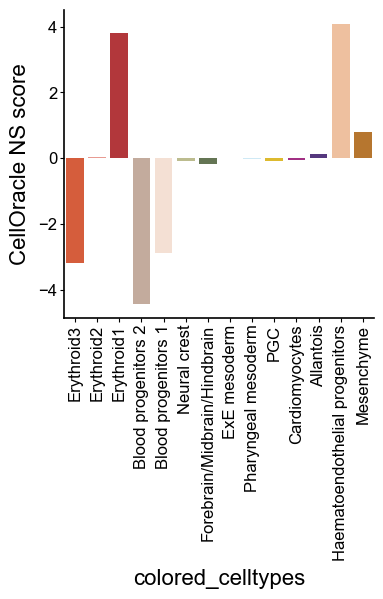

In [173]:
order = coda_res.loc[coda_res['Cell Type'].isin(benchmark_list)].sort_values('log2fc')['Cell Type']
show_df = pd.DataFrame(origin_perturb_res.loc[benchmark_list]['Tal1']).reset_index().sort_values('Tal1').reset_index(drop=True)
show_df['colored_celltypes'] = show_df['colored_celltypes'].astype(str)
sns.barplot(show_df.sort_values('Tal1'), x='colored_celltypes', y='Tal1', palette=colors, order=order)
plt.xticks(rotation=90)
plt.ylabel('CellOracle NS score')
#plt.savefig('/disk/share/xuruihong/pygot_fig/celloracle_rank.pdf', format='pdf')
plt.show()

In [169]:
selected_gene = origin_best_match_genes.loc[origin_best_match_genes.gene == 'Tal1']
ranked = np.where(origin_best_match_genes.gene == 'Tal1')[0][0]
print(ranked)
selected_gene

25


gene         R
74  Tal1  0.331829

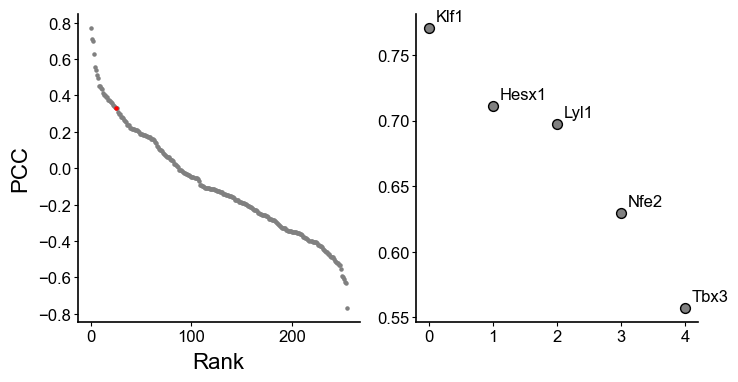

In [175]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
n_top = 5
axes[0].scatter(x=range(len(origin_best_match_genes)), y=origin_best_match_genes['R'].tolist(), s=5, color='grey',)
axes[0].scatter(x=ranked, y=selected_gene['R'].tolist(), s=5, color='red',)
annotated_genes = origin_best_match_genes.head(n_top)
for i, gene in enumerate(annotated_genes.gene):
    axes[1].annotate(gene, 
                xy=(i, annotated_genes['R'].tolist()[i]), 
                xytext=(5, 5),  # 调整文本偏移量以避免覆盖数据点
                textcoords="offset points",
                ha='left',
                fontsize=12)
axes[1].scatter(x=range(len(origin_best_match_genes))[:n_top], y=origin_best_match_genes['R'].tolist()[:n_top], s=50, color='grey', edgecolors='black')
axes[0].set_ylabel('PCC')
axes[0].set_xlabel('Rank')
#plt.savefig('/disk/share/xuruihong/pygot_fig/celloracle_corr.pdf', format='pdf')
plt.show()